<a href="https://colab.research.google.com/github/PandemicPreventionInstitute/NGS-Capacity-map/blob/main/scripts/data_analysis/NGS_EDA_Sequencing_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NGS Exploratory Data Analysis Using OWID & GISAID partner data to assess Genomic Sequencing metrics and "Sufficient Sequencing" Threshold**

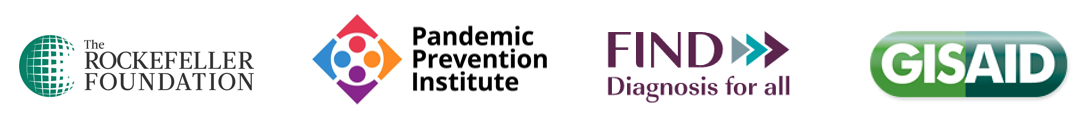

# NGS Project Background

### **Goal**
- Refine NGS Capacity Mapping methods (diagnostic testing, genomic sequencing, archetypes) to improve on NGS map interpretation and data representation.

### Conceptual Framework

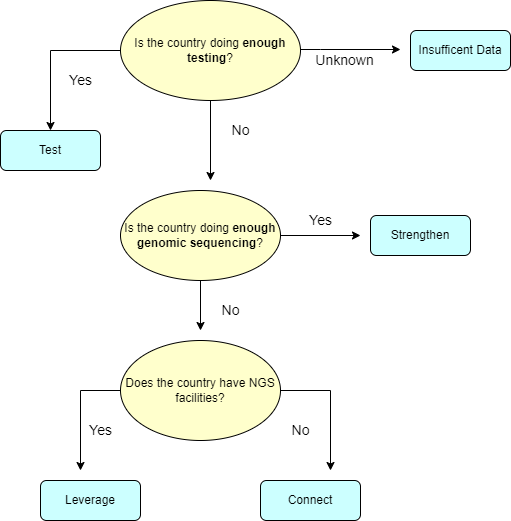

### **Phase 1: Explore metric for Genomic Sequencing**
- Understand distributions of "percent of cases sequenced"
  - Quantiles and histograms
  - IQR
  - Counts and %’s of LMICs in each bucket
  - Scatterplots

### **Phase 2: Creating Thesholds to define "sequencing enough":**
- Using known thresholds a la policy guidance (e.g. 1 test per day per 1000)
- Using QQ-plot elbow to inform cut-off
- Using IQR to inform threshold
- Using scatterplots to inform thresholds

### **Phase 3: Compare Scenarios w/ Existing NGS archetypes**
- Benchmarking to existing test category (how far off would we be from the current archetypes we've defined)
- How many existing archetypes match with new threshold used to define archetype, per scenario


### **Methods:**
Sample & Aggregation
- Time period (Jan 2021 - Jan 2022)
- Aggregate data over time (12 months), by country
- N: 170 countries represented in analysis


Visualizations: 
- Quantiles and histograms *
- QQ plot
- Counts and %’s of LMICs in each bucket
- Scatterplots
    - Genomic Sequencing against Testing or TPR

# **Preliminary Findings**

## Descriptive Stats

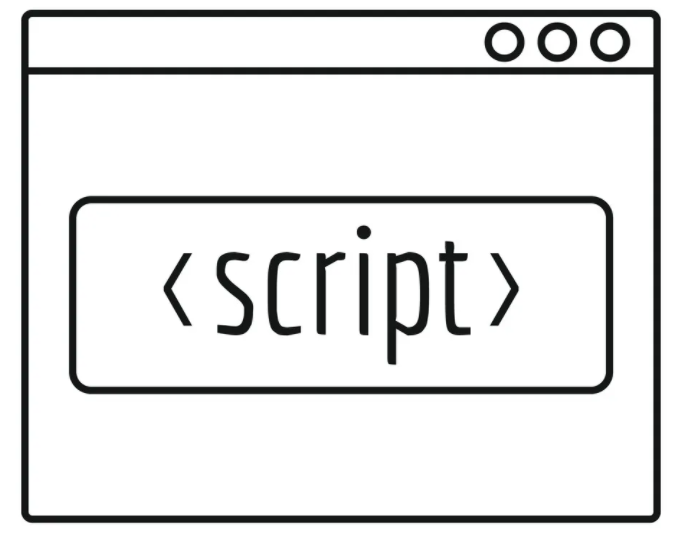

# **Phase 1: Explore Genomic Sequencing Metric**
- Percent of Cases Sequenced

### *Data Processing* of Genomic Sequencing Data

In [ ]:
#import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import FIND diagnostic data (exported from github) 
NGS_data_PPI_github = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/NGS_EDA/gisaid_owid_merged.csv"
GISAID_OWID_data = pd.read_csv (NGS_data_PPI_github)
GISAID_OWID_data.tail(3)

,gisaid_collect_date,country_code,owid_location,owid_continent,owid_new_cases,owid_new_cases_smoothed,owid_population,owid_people_vaccinated,owid_people_fully_vaccinated,n_new_sequences,gisaid_country
171261,2022-01-06,YEM,Yemen,Asia,6,3.714,30490639.0,NaN,NaN,0,NaN
171262,2022-01-06,ZMB,Zambia,Africa,4096,3556.286,18920657.0,NaN,1294582.0,0,Zambia
171263,2022-01-06,ZWE,Zimbabwe,Africa,1121,1207.143,15092171.0,4154155.0,3169778.0,0,Zimbabwe


In [ ]:
#check on discrepancy between Kaitlyn and Bri's code
Bosnia = GISAID_OWID_data.loc[(GISAID_OWID_data['owid_location'] == 'Bosnia and Herzegovina')]
print (Bosnia.owid_location.nunique())
Bosnia.head()

1


,gisaid_collect_date,country_code,owid_location,owid_continent,owid_new_cases,owid_new_cases_smoothed,owid_population,owid_people_vaccinated,owid_people_fully_vaccinated,n_new_sequences,gisaid_country
21210,2020-03-05,BIH,Bosnia and Herzegovina,Europe,2,0.0,3263459.0,NaN,NaN,0,Bosnia & Herzegovina
21433,2020-03-06,BIH,Bosnia and Herzegovina,Europe,0,0.0,3263459.0,NaN,NaN,0,Bosnia & Herzegovina
21656,2020-03-07,BIH,Bosnia and Herzegovina,Europe,1,0.0,3263459.0,NaN,NaN,0,Bosnia & Herzegovina
21879,2020-03-08,BIH,Bosnia and Herzegovina,Europe,0,0.0,3263459.0,NaN,NaN,0,Bosnia & Herzegovina
22102,2020-03-09,BIH,Bosnia and Herzegovina,Europe,0,0.0,3263459.0,NaN,NaN,0,Bosnia & Herzegovina


In [ ]:
#how many & which countries are represented here?
print ("Countries reported:", GISAID_OWID_data.country_code.nunique())
print ("Dates reported:", GISAID_OWID_data.gisaid_collect_date.nunique())

Countries reported: 223
Dates reported: 768


In [ ]:
#assess data-types per variable,shape, etc.
print (GISAID_OWID_data.shape)
GISAID_OWID_data.dtypes
GISAID_OWID_data['gisaid_collect_date'] = pd.to_datetime(GISAID_OWID_data['gisaid_collect_date'])
print (GISAID_OWID_data.dtypes)

#sort values for visualizing 
GISAID_OWID_data.sort_values(by='gisaid_collect_date', ascending=False, inplace=True)
GISAID_OWID_data.head(3)

(171264, 11)
gisaid_collect_date             datetime64[ns]
country_code                            object
owid_location                           object
owid_continent                          object
owid_new_cases                           int64
owid_new_cases_smoothed                float64
owid_population                        float64
owid_people_vaccinated                 float64
owid_people_fully_vaccinated           float64
n_new_sequences                          int64
gisaid_country                          object
dtype: object


,gisaid_collect_date,country_code,owid_location,owid_continent,owid_new_cases,owid_new_cases_smoothed,owid_population,owid_people_vaccinated,owid_people_fully_vaccinated,n_new_sequences,gisaid_country
171263,2022-01-06,ZWE,Zimbabwe,Africa,1121,1207.143,15092171.0,4154155.0,3169778.0,0,Zimbabwe
171152,2022-01-06,LSO,Lesotho,Africa,0,0.000,2159067.0,NaN,NaN,0,Lesotho
171122,2022-01-06,GTM,Guatemala,Americas,0,0.000,18249868.0,NaN,NaN,0,Guatemala


In [ ]:
#Constrict EDA to time period:

start_date = "2021-01-05"
end_date = "2022-01-04"

#sub-analysis of specific dates
after_start_date = GISAID_OWID_data["gisaid_collect_date"] >= start_date
before_end_date = GISAID_OWID_data["gisaid_collect_date"] <= end_date
between_two_dates = after_start_date & before_end_date
df_time_period = GISAID_OWID_data.loc[between_two_dates]

#confirm dates are subsetted
print("Num of daily observations.", df_time_period.gisaid_collect_date.nunique())
print("Num of Total Countries.", df_time_period.country_code.nunique())
print (df_time_period.shape)
df_time_period.head()

Num of daily observations. 365
Num of Total Countries. 223
(81395, 11)


,gisaid_collect_date,country_code,owid_location,owid_continent,owid_new_cases,owid_new_cases_smoothed,owid_population,owid_people_vaccinated,owid_people_fully_vaccinated,n_new_sequences,gisaid_country
170666,2022-01-04,PYF,French Polynesia,Oceania,92,13.143,282534.0,173773.0,159100.0,0,French Polynesia
170677,2022-01-04,GGY,NaN,Europe,0,0.000,NaN,NaN,NaN,0,NaN
170676,2022-01-04,GTM,Guatemala,Americas,1007,565.286,18249868.0,6564847.0,4734710.0,0,Guatemala
170675,2022-01-04,GRD,Grenada,Americas,449,117.000,113015.0,NaN,NaN,0,Grenada
170674,2022-01-04,GRL,Greenland,Americas,204,99.571,56868.0,40469.0,38089.0,0,NaN


In [ ]:
#only keeping necessary variables
df_Sequence = df_time_period[["gisaid_collect_date", 'country_code', "owid_location",'owid_new_cases','n_new_sequences']]
df_Sequence.head()

,gisaid_collect_date,country_code,owid_location,owid_new_cases,n_new_sequences
170666,2022-01-04,PYF,French Polynesia,92,0
170677,2022-01-04,GGY,NaN,0,0
170676,2022-01-04,GTM,Guatemala,1007,0
170675,2022-01-04,GRD,Grenada,449,0
170674,2022-01-04,GRL,Greenland,204,0


In [ ]:
#check on discrepancy between Kaitlyn and Bri's code
Bosnia = df_Sequence.loc[(df_Sequence['country_code'] == 'BIH')]
print (Bosnia.country_code.nunique())
Bosnia.tail()

1


,gisaid_collect_date,country_code,owid_location,owid_new_cases,n_new_sequences
90340,2021-01-09,BIH,Bosnia and Herzegovina,459,0
90117,2021-01-08,BIH,Bosnia and Herzegovina,1528,0
89894,2021-01-07,BIH,Bosnia and Herzegovina,0,1
89671,2021-01-06,BIH,Bosnia and Herzegovina,0,0
89448,2021-01-05,BIH,Bosnia and Herzegovina,747,2


In [ ]:
#Aggregate across 12 months and calculate median
df_aggregated_GS = df_Sequence.groupby(['country_code'])['owid_new_cases', 'n_new_sequences'].sum().reset_index()
df_aggregated_GS.rename (columns = {'owid_new_cases': 'cases_sum', 'n_new_sequences': 'sequ_sum'}, inplace = True)
print (df_aggregated_GS.shape)
print (df_aggregated_GS.country_code.nunique())

df_aggregated_GS.head()

(223, 3)
223


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,country_code,cases_sum,sequ_sum
0,ABW,17442,2995
1,AFG,105296,84
2,AGO,66982,899
3,AIA,1762,30
4,ALB,152398,45


#### Calculating % of Sequences

In [ ]:
#calculate the Percent of Cases Sequenced over the past year
df_aggregated_GS ['cases_sequenced'] = df_aggregated_GS['sequ_sum']/df_aggregated_GS ['cases_sum'] *100
#rename variable
df_aggregated_GS.rename (columns = {'country_code': 'code'}, inplace = True)
#assess df
df_aggregated_GS.head()

,code,cases_sum,sequ_sum,cases_sequenced
0,ABW,17442,2995,17.171196
1,AFG,105296,84,0.079775
2,AGO,66982,899,1.342152
3,AIA,1762,30,1.702611
4,ALB,152398,45,0.029528


#### Calculating Sequencing per 100K metric

In [ ]:
#Calculating sequencing per 100K...

#import FIND diagnostic data (exported from github) 
find_github = "https://raw.githubusercontent.com/dsbbfinddx/FINDCov19TrackerData/master/processed/data_all.csv"
data_all = pd.read_csv (find_github)
data_all.tail(3)

,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
159445,who_region,NaN,Europe,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.796376,NaN,0.004080,2309.859346,12.230209,0.0,1664914.0,0.0,3781.0,2140819219,4319037.0,0.385483
159446,who_region,NaN,South-East Asia,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093825,NaN,0.000619,427.312750,1.179966,0.0,187114.0,0.0,1235.0,852185545,2244017.0,0.083384
159447,who_region,NaN,Western Pacific,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097554,NaN,0.000193,139.847452,1.032039,0.0,187968.0,0.0,371.0,269458351,161640.0,1.162880


In [ ]:
#how many & which countries are represented here?
print ("n units:", data_all.unit.nunique())
print ("set reported:", data_all.set.unique())

#confirm countrys have right # of projects reported
FIND_data = data_all.loc[(data_all['set'] == 'country')]
print ('N countries:', FIND_data.unit.nunique())
FIND_data.head(4)

#assess data-types per variable,shape, etc.
print (FIND_data.shape)
FIND_data.dtypes
FIND_data['time'] = pd.to_datetime(FIND_data['time'])
#print (FIND_data.dtypes)

#sort values for visualizing 
FIND_data.sort_values(by='unit', ascending=False, inplace=True)
FIND_data.head(1)

start_date = "2021-01-05"
end_date = "2022-01-04"

#sub-analysis of specific dates, building off of map data "no_VI"
after_start_date = FIND_data["time"] >= start_date
before_end_date = FIND_data["time"] <= end_date
between_two_dates = after_start_date & before_end_date
df_period = FIND_data.loc[between_two_dates]

print("Num of daily observations.", df_period.time.nunique())
print("Num of Total Countries.", df_period.unit.nunique())
print (df_period.shape)
df_period.head()

#only keeping necessary variables
df_FIND = df_period[['unit', "name",'pop_100k']]
df_FIND.head()

df_FIND.rename (columns = {'unit': 'code'}, inplace = True)
df_FIND.rename (columns = {'name': 'country'}, inplace = True)

#drop dups
print(df_FIND.shape)
df_FIND.drop_duplicates(subset = ['code'], inplace=True)
print(df_FIND.shape)


df_FIND.head()

n units: 212
set reported: ['country' 'income' 'region' 'who_region']
N countries: 198
(147467, 23)
Num of daily observations. 365
Num of Total Countries. 198
(72271, 23)
(72271, 3)
(198, 3)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,code,country,pop_100k
84118,ZWE,Zimbabwe,148.63
94603,ZMB,Zambia,183.84
124563,ZAF,South Africa,593.09
142538,YEM,Yemen,298.26
108510,XKX,NaN,18.00


In [ ]:
df_Sequence.rename (columns = {'country_code': 'code'}, inplace = True)
df_Sequence.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gisaid_collect_date,code,owid_location,owid_new_cases,n_new_sequences
170666,2022-01-04,PYF,French Polynesia,92,0
170677,2022-01-04,GGY,NaN,0,0
170676,2022-01-04,GTM,Guatemala,1007,0
170675,2022-01-04,GRD,Grenada,449,0
170674,2022-01-04,GRL,Greenland,204,0


In [ ]:
#merge and calculate per 100K sequencing...

Seq_pop = df_Sequence.merge(df_FIND, on=['code'])
Seq_pop.head()

#cumulative sequences --> sum over time period then take cum

,gisaid_collect_date,code,owid_location,owid_new_cases,n_new_sequences,country,pop_100k
0,2022-01-04,PYF,French Polynesia,92,0,French Polynesia,2.81
1,2022-01-03,PYF,French Polynesia,0,0,French Polynesia,2.81
2,2022-01-02,PYF,French Polynesia,0,0,French Polynesia,2.81
3,2022-01-01,PYF,French Polynesia,0,0,French Polynesia,2.81
4,2021-12-31,PYF,French Polynesia,0,0,French Polynesia,2.81


In [ ]:
#Aggregate across 12 months and calculate median
Sequences_pop = Seq_pop.groupby(['code'])['n_new_sequences'].sum().reset_index()
Sequences_pop.head()

,code,n_new_sequences
0,AFG,84
1,AGO,899
2,ALB,45
3,AND,48
4,ARE,570


In [ ]:
#merge on code to obtain population
df_aggregated_Sequ = Sequences_pop.merge(df_FIND, on=['code'])

#drop dups
print(df_aggregated_Sequ.shape)
df_aggregated_Sequ.drop_duplicates(subset = ['code'], inplace=True)
print(df_aggregated_Sequ.shape)

df_aggregated_Sequ.head()

(195, 4)
(195, 4)


,code,n_new_sequences,country,pop_100k
0,AFG,84,Afghanistan,389.28
1,AGO,899,Angola,328.66
2,ALB,45,Albania,28.78
3,AND,48,Andorra,0.77
4,ARE,570,United Arab Emirates,98.90


In [ ]:
#calculate sequences by day, per 100K
df_aggregated_Sequ ['cum_sequences_pop_100k'] = df_aggregated_Sequ['n_new_sequences']/df_aggregated_Sequ ['pop_100k']
df_aggregated_Sequ.head()

#shape and number of countries represented
print (df_aggregated_Sequ.shape)
print (df_aggregated_Sequ.code.nunique())

df_aggregated_Sequ.head()

(195, 5)
195


,code,n_new_sequences,country,pop_100k,cum_sequences_pop_100k
0,AFG,84,Afghanistan,389.28,0.215783
1,AGO,899,Angola,328.66,2.735350
2,ALB,45,Albania,28.78,1.563586
3,AND,48,Andorra,0.77,62.337662
4,ARE,570,United Arab Emirates,98.90,5.763397


#### Merge Sequencing per 100K and Percent of Cases Sequenced Data Together

In [ ]:
#merge both sequencing datasets together

df_Sequencing = df_aggregated_GS.merge(df_aggregated_Sequ, on=['code'])

#only keeping necessary variables from this dataset

df_Sequencing = df_Sequencing[["code", 'country', "pop_100k", 'n_new_sequences', 'cum_sequences_pop_100k', 'cases_sequenced']]
df_Sequencing.head()


print (df_Sequencing.shape)

#rename
df_Sequencing.rename (columns = {'n_new_sequences': 'sequ_sum'}, inplace = True)

df_Sequencing.head()

(195, 6)


,code,country,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0,AFG,Afghanistan,389.28,84,0.215783,0.079775
1,AGO,Angola,328.66,899,2.735350,1.342152
2,ALB,Albania,28.78,45,1.563586,0.029528
3,AND,Andorra,0.77,48,62.337662,0.289978
4,ARE,United Arab Emirates,98.90,570,5.763397,0.102250


### Join TPR & Median Daily Testing Metrics to Sequencing df

##### TPR

In [ ]:
#import FIND diagnostic data (exported from github) 
find_github = "https://raw.githubusercontent.com/dsbbfinddx/FINDCov19TrackerData/master/processed/data_all.csv"
data_all = pd.read_csv (find_github)
data_all.tail(3)

,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
159445,who_region,NaN,Europe,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.796376,NaN,0.004080,2309.859346,12.230209,0.0,1664914.0,0.0,3781.0,2140819219,4319037.0,0.385483
159446,who_region,NaN,South-East Asia,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.093825,NaN,0.000619,427.312750,1.179966,0.0,187114.0,0.0,1235.0,852185545,2244017.0,0.083384
159447,who_region,NaN,Western Pacific,2022-02-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097554,NaN,0.000193,139.847452,1.032039,0.0,187968.0,0.0,371.0,269458351,161640.0,1.162880


In [ ]:
#how many & which countries are represented here?
print ("n units:", data_all.unit.nunique())
print ("set reported:", data_all.set.unique())

#confirm countrys have right # of projects reported
FIND_data = data_all.loc[(data_all['set'] == 'country')]
print ('N countries:', FIND_data.unit.nunique())
FIND_data.head(4)

#assess data-types per variable,shape, etc.
print (FIND_data.shape)
FIND_data.dtypes
FIND_data['time'] = pd.to_datetime(FIND_data['time'])
print (FIND_data.dtypes)

#sort values for visualizing 
FIND_data.sort_values(by='unit', ascending=False, inplace=True)
FIND_data.head(3)

n units: 212
set reported: ['country' 'income' 'region' 'who_region']
N countries: 198
(147467, 23)
set                        object
name                       object
unit                       object
time               datetime64[ns]
cum_tests_orig            float64
new_tests_orig            float64
pop_100k                  float64
pop                       float64
new_cases_orig            float64
new_deaths_orig           float64
cap_cum_cases             float64
cap_new_cases             float64
cap_cum_deaths            float64
cap_new_deaths            float64
cap_cum_tests             float64
cap_new_tests             float64
all_cum_cases             float64
all_new_cases             float64
all_cum_deaths            float64
all_new_deaths            float64
all_cum_tests               int64
all_new_tests             float64
pos                       float64
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,set,name,unit,time,cum_tests_orig,new_tests_orig,pop_100k,pop,new_cases_orig,new_deaths_orig,cap_cum_cases,cap_new_cases,cap_cum_deaths,cap_new_deaths,cap_cum_tests,cap_new_tests,all_cum_cases,all_new_cases,all_cum_deaths,all_new_deaths,all_cum_tests,all_new_tests,pos
159431,country,Zimbabwe,ZWE,2022-02-07,2000510.0,0.0,148.63,14863.0,NaN,NaN,NaN,0.008276,NaN,0.000269,134.596649,0.230371,NaN,123.0,NaN,4.0,2000510,3424.0,0.035923
84118,country,Zimbabwe,ZWE,2021-02-20,367364.0,2385.0,148.63,14863.0,58.0,2.0,2.406513,0.006392,0.096347,0.000336,24.716679,0.174931,35768.0,95.0,1432.0,5.0,367364,2600.0,0.036538
61006,country,Zimbabwe,ZWE,2020-11-04,168146.0,31990.0,148.63,14863.0,17.0,2.0,0.566978,0.001009,0.016686,0.000067,11.313059,0.269057,8427.0,15.0,248.0,1.0,168146,3999.0,0.003751


In [ ]:
start_date = "2021-01-05"
end_date = "2022-01-04"

#sub-analysis of specific dates, building off of map data "no_VI"
after_start_date = FIND_data["time"] >= start_date
before_end_date = FIND_data["time"] <= end_date
between_two_dates = after_start_date & before_end_date
df_period = FIND_data.loc[between_two_dates]

print("Num of daily observations.", df_period.time.nunique())
print("Num of Total Countries.", df_period.unit.nunique())
print (df_period.shape)
df_period.head()

#only keeping necessary variables
df_FIND = df_period[["time", 'unit', "name",'all_new_cases','all_new_tests', 'pos']]
df_FIND.head()

Num of daily observations. 365
Num of Total Countries. 198
(72271, 23)


,time,unit,name,all_new_cases,all_new_tests,pos
84118,2021-02-20,ZWE,Zimbabwe,95.0,2600.0,0.036538
84332,2021-02-21,ZWE,Zimbabwe,89.0,2436.0,0.036535
134195,2021-10-12,ZWE,Zimbabwe,116.0,3588.0,0.032330
134409,2021-10-13,ZWE,Zimbabwe,96.0,3906.0,0.024578
134623,2021-10-14,ZWE,Zimbabwe,104.0,4220.0,0.024645


In [ ]:
#adjustments to case data to truncate it to the last date of reporting, per country

df_FIND ['cases_truncated'] = df_FIND['all_new_cases']

df_FIND.loc[df_FIND['all_new_tests'].isnull(), 'cases_truncated'] = np.nan

df_FIND.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,time,unit,name,all_new_cases,all_new_tests,pos,cases_truncated
92909,2021-04-03,AFG,Afghanistan,44.0,1886.0,0.023330,44.0
136566,2021-10-24,AFG,Afghanistan,26.0,512.0,0.050781,26.0
108745,2021-06-16,AFG,Afghanistan,1320.0,3355.0,0.393443,1320.0
89057,2021-03-16,AFG,Afghanistan,17.0,1580.0,0.010759,17.0
101469,2021-05-13,AFG,Afghanistan,269.0,3355.0,0.080179,269.0


In [ ]:
#Aggregate across 12 months and extract cumulative number of cases and tests, to calculate test positivity rate
Testing_Truncated_Data = df_FIND.groupby(['unit'])[ 'cases_truncated', 'all_new_tests' ].sum().reset_index()
Testing_Truncated_Data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,unit,cases_truncated,all_new_tests
193,XKX,0.0,0.0
194,YEM,0.0,0.0
195,ZAF,2391908.0,14565741.0
196,ZMB,234899.0,2349809.0
197,ZWE,199176.0,1605906.0


In [ ]:
# remove countries with 0 testing data
df_cumTPR = Testing_Truncated_Data.loc[(Testing_Truncated_Data['all_new_tests'] != 0.0)]
print (df_cumTPR.unit.nunique())
df_cumTPR.head()

# remove countries with 0 testing data
df_cumTPR = df_cumTPR.loc[(df_cumTPR['cases_truncated'] != 0.0)]
print (df_cumTPR.unit.nunique())
df_cumTPR.head()

174
167


,unit,cases_truncated,all_new_tests
0,AFG,105640.0,617162.0
1,AGO,64391.0,970133.0
2,ALB,151787.0,1216279.0
3,AND,15185.0,241854.0
4,ARE,554910.0,91040238.0


In [ ]:
#calculate the Cumulative TPR
df_cumTPR ['cum_TPR'] = df_cumTPR['cases_truncated']/df_cumTPR ['all_new_tests'] 
print (df_cumTPR.unit.nunique())
df_cumTPR.tail()

167


,unit,cases_truncated,all_new_tests,cum_TPR
188,VEN,119088.0,763693.0,0.155937
189,VNM,1804.0,1120035.0,0.001611
195,ZAF,2391908.0,14565741.0,0.164215
196,ZMB,234899.0,2349809.0,0.099965
197,ZWE,199176.0,1605906.0,0.124027


In [ ]:
#assess impossible data
Impossible_cumTPR = df_cumTPR.loc[(df_cumTPR['cum_TPR'] > 1)]
print (Impossible_cumTPR.shape)
Impossible_cumTPR.head()

#assess impossible data
Clean_cum_TPR_df = df_cumTPR.loc[(df_cumTPR['cum_TPR'] < 1)]
Clean_cum_TPR_df.shape

(0, 4)


(167, 4)

In [ ]:
Clean_cum_TPR_df.rename (columns = {'unit': 'code'}, inplace = True)
Clean_cum_TPR_df.rename (columns = {'name': 'country'}, inplace = True)
Clean_cum_TPR_df.head()

,code,cases_truncated,all_new_tests,cum_TPR
0,AFG,105640.0,617162.0,0.171171
1,AGO,64391.0,970133.0,0.066373
2,ALB,151787.0,1216279.0,0.124796
3,AND,15185.0,241854.0,0.062786
4,ARE,554910.0,91040238.0,0.006095


In [ ]:
#count how many LMICs are in each df
#import November NGS map data (exported from github) 
NGS_git = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/LMIC%20centered%20map/NGS_flourish_file_11.9.2021_TEST3.csv"
NGS_data = pd.read_csv (NGS_git)
#drop first column "Unamed"
NGS_data = NGS_data.iloc[0: , 1:]
NGS_SES = NGS_data[["code", 'country', "archetype"]]
NGS_SES.head(3)

,code,country,archetype
0,AFG,Afghanistan,Connect
1,ALB,Albania,Connect
2,DZA,Algeria,Connect


In [ ]:
df_cumTPR_SES = pd.merge(Clean_cum_TPR_df, NGS_SES, how = 'left', on=["code"])
df_cumTPR_SES.tail()

,code,cases_truncated,all_new_tests,cum_TPR,country,archetype
163,VEN,119088.0,763693.0,0.155937,Venezuela,Leverage
164,VNM,1804.0,1120035.0,0.001611,Vietnam,Strengthen
165,ZAF,2391908.0,14565741.0,0.164215,South Africa,Strengthen
166,ZMB,234899.0,2349809.0,0.099965,Zambia,Strengthen
167,ZWE,199176.0,1605906.0,0.124027,Zimbabwe,Leverage


In [ ]:
#High Income df
def num (x):
    if x != "High Income*":
        return 'LMIC' 
    elif x == "High Income*":
        return 'HIC'

#Delineate HIC and LMIC support...    
df_cumTPR_SES['SES'] = df_cumTPR_SES['archetype'].apply(lambda x : num (x))
df_cumTPR_SES.rename (columns = {'archetype': 'old_archetype'}, inplace = True)
df_cumTPR_SES.head()

,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC


In [ ]:
print(df_cumTPR_SES.shape)
df_cumTPR_SES.drop_duplicates(subset = ['code'], inplace=True)
print(df_cumTPR_SES.shape)

(168, 7)
(167, 7)


##### Median Daily Testing per capita

In [ ]:
#only keeping necessary variables
#only keeping necessary variables
df_Testing = df_period[["time", 'unit', "name",'cap_new_tests', 'cap_cum_tests', 'all_new_tests', 'pop_100k']]

df_Testing ['cap_new_tests_calculated'] = df_Testing['all_new_tests']/df_Testing ['pop_100k'] / 100


#rename variables
#rename variables
df_Testing.rename (columns = {'unit': 'code'}, inplace = True)
df_Testing.rename (columns = {'name': 'country'}, inplace = True)
df_Testing.rename (columns = {'cap_new_tests': 'FIND_cap_new_tests'}, inplace = True)
df_Testing.rename (columns = {'cap_new_tests_calculated': 'cap_new_tests'}, inplace = True)

#review df
df_Testing.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
84118,2021-02-20,ZWE,Zimbabwe,0.174931,24.716679,2600.0,148.63,0.174931
84332,2021-02-21,ZWE,Zimbabwe,0.163897,24.813295,2436.0,148.63,0.163897
134195,2021-10-12,ZWE,Zimbabwe,0.241405,96.872166,3588.0,148.63,0.241405
134409,2021-10-13,ZWE,Zimbabwe,0.262800,97.199085,3906.0,148.63,0.262800
134623,2021-10-14,ZWE,Zimbabwe,0.283927,97.619323,4220.0,148.63,0.283927


In [ ]:
#fill all 0's in testing with Nan
Testing_Nan = df_Testing.replace(0)
Testing_Nan.fillna(np.nan, inplace = True)
Testing_Nan.head()

,time,code,country,FIND_cap_new_tests,cap_cum_tests,all_new_tests,pop_100k,cap_new_tests
84118,2021-02-20,ZWE,Zimbabwe,0.174931,24.716679,2600.0,148.63,0.174931
84332,2021-02-21,ZWE,Zimbabwe,0.163897,24.813295,2436.0,148.63,0.163897
134195,2021-10-12,ZWE,Zimbabwe,0.241405,96.872166,3588.0,148.63,0.241405
134409,2021-10-13,ZWE,Zimbabwe,0.262800,97.199085,3906.0,148.63,0.262800
134623,2021-10-14,ZWE,Zimbabwe,0.283927,97.619323,4220.0,148.63,0.283927


In [ ]:
#Aggregate across 12 months and calculate median
df_avg_testing = Testing_Nan.groupby(['code'])['cap_new_tests'].mean().reset_index()
df_avg_testing.head()

,code,cap_new_tests
0,AFG,0.043435
1,AGO,0.080871
2,ALB,1.157843
3,AND,8.822924
4,ARE,25.219950


In [ ]:
#fill all 0's in testing with Nan
df_avg_testing.replace(0, np.nan, inplace=True)
df_avg_testing.head()

,code,cap_new_tests
0,AFG,0.043435
1,AGO,0.080871
2,ALB,1.157843
3,AND,8.822924
4,ARE,25.219950


#### Merging Dfs into one, by country code

In [ ]:
#merge together dataset
Global_TPR_Testing = df_cumTPR_SES.merge(df_avg_testing, how = 'left', on=['code'])
print (Global_TPR_Testing.shape)
Global_TPR_Testing.head()

(167, 8)


,code,cases_truncated,all_new_tests,cum_TPR,country,old_archetype,SES,cap_new_tests
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950


### Subset to HIC & LMICs

In [ ]:
Global_Sequencing = Global_TPR_Testing.merge(df_Sequencing, how = 'left', on=['code'])
print (Global_Sequencing.shape)
Global_Sequencing.head() 

(167, 13)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924,Andorra,0.77,48,62.337662,0.289978
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950,United Arab Emirates,98.90,570,5.763397,0.102250


In [ ]:
#check on discrepancy between Kaitlyn and Bri's code
Bosnia = Global_Sequencing.loc[(Global_Sequencing['code'] == 'BIH')]
print (Bosnia.code.nunique())
Bosnia.tail()

1


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
19,BIH,179596.0,706853.0,0.254078,Bosnia and Herzegovina,Leverage,LMIC,0.590242,Bosnia & Herzegovina,32.81,1054,32.124352,0.582195


In [ ]:
HIC = Global_Sequencing.loc[(Global_Sequencing['SES'] == 'HIC')]
print (HIC.shape)
HIC.head()

(58, 13)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924,Andorra,0.77,48,62.337662,0.289978
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950,United Arab Emirates,98.90,570,5.763397,0.102250
7,ATG,1106.0,10405.0,0.106295,Antigua and Barbuda,High Income*,HIC,0.676264,Antigua & Barbuda,0.98,99,101.020408,2.288488
8,AUS,440634.0,43757910.0,0.010070,Australia,High Income*,HIC,4.701360,Australia,255.00,33995,133.313725,5.858318
9,AUT,920259.0,120034443.0,0.007667,Austria,High Income*,HIC,36.515821,Austria,90.06,9542,105.951588,1.029436


In [ ]:
LMIC = Global_Sequencing.loc[(Global_Sequencing['SES'] == 'LMIC')]
print (LMIC.shape)
LMIC.head()

(109, 13)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528
5,ARG,4050131.0,23303881.0,0.173796,Argentina,Strengthen,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082
6,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837


## Subset to countries with most recent data

In [ ]:
#define list of teams we don't want
values_list = ['ATG', 'BEN', 'GEO', 'ISR', 'KAZ', 'KGZ', 'LAO', 'LBN', 'LKA', 'MDA',
               'MNE', 'MYS', 'NLD', 'OMN', 'SWE', 'THA', 'TTO', 'VCT', 'VEN', 'VNM']

#filter for rows where team name is NOT in one of several columns
HIC_Sequencing = HIC[~HIC[['code']].isin(values_list).any(axis=1)] 
HIC_Sequencing.code.nunique()

52

In [ ]:
#define list of teams we don't want
values_list = ['ATG', 'BEN', 'GEO', 'ISR', 'KAZ', 'KGZ', 'LAO', 'LBN', 'LKA', 'MDA',
               'MNE', 'MYS', 'NLD', 'OMN', 'SWE', 'THA', 'TTO', 'VCT', 'VEN', 'VNM']

#filter for rows where team name is NOT in one of several columns
LMIC_Sequencing = LMIC[~LMIC[['code']].isin(values_list).any(axis=1)] 
LMIC_Sequencing.code.nunique()

95

In [ ]:
#define list of teams we don't want
values_list = ['Brazil', 'Central African Republic', 'Ecuador', 'Mexico', 'Malawi', 'Papua New Guinea', 'South Africa']

#filter for rows where team name is NOT in one of several columns
LMIC_Focus = LMIC[LMIC[['country_x']].isin(values_list).any(axis=1)] 
LMIC_Focus.code.nunique()

7

In [ ]:
LMIC_Focus.head(7)

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
23,BRA,14610426.0,46493814.0,0.314245,Brazil,Strengthen,LMIC,0.599270,Brazil,2125.59,86410,40.652242,0.598332
28,CAF,7191.0,41534.0,0.173135,Central African Republic,Connect,LMIC,0.023559,Central African Republic,48.30,53,1.097308,0.736111
47,ECU,336131.0,1399632.0,0.240157,Ecuador,Strengthen,LMIC,0.217344,Ecuador,176.43,3419,19.378790,1.011176
102,MEX,2550440.0,8756751.0,0.291254,Mexico,Strengthen,LMIC,0.186074,Mexico,1289.33,40153,31.142531,1.572513
111,MWI,68709.0,398639.0,0.172359,Malawi,Leverage,LMIC,0.057092,Malawi,191.30,783,4.093048,1.120717
125,PNG,34243.0,209977.0,0.163080,Papua New Guinea,Test,LMIC,0.070903,Papua New Guinea,89.47,3190,35.654409,9.012827
164,ZAF,2391908.0,14565741.0,0.164215,South Africa,Strengthen,LMIC,0.672851,South Africa,593.09,19599,33.045575,0.833413


### Viz Formatting

In [ ]:
#set standards for nice visualizations & formatting

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import requests
import io
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
#colorlist = ['#000000','#0C6B0C',  "#082B84", "#3F1D63",'#086984',"#C91414", "#FF6D00",'#D9B81F' ] 

#***************************
# Set dimensions for visualizations
#***************************

figure_size =  (25,18)
barfigsize = (11,6)
barwidth = 0.6
font_size_var = 2.5
label_size= 20
axis_pad = 15



def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)

### LMICs Summary Stats Viz

In [ ]:
print (LMIC_Sequencing.shape)
print (LMIC_Sequencing.code.nunique())
LMIC_Sequencing.describe()

(95, 13)
95


,cases_truncated,all_new_tests,cum_TPR,cap_new_tests,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
count,9.500000e+01,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,9.293023e+05,1.034731e+07,0.111165,0.804885,469.817053,4364.652632,14.167044,0.765864
std,3.028402e+06,5.245051e+07,0.068252,1.249940,1476.431390,15026.234073,27.403347,1.414263
min,1.957000e+03,1.986000e+04,0.001955,0.013066,0.720000,0.000000,0.000000,0.000000
25%,2.640550e+04,3.428475e+05,0.055821,0.102265,39.655000,64.000000,0.662502,0.083263
50%,1.201330e+05,1.190487e+06,0.093509,0.400950,118.910000,316.000000,2.659848,0.376316
75%,4.672265e+05,3.460570e+06,0.159769,1.141709,379.195000,873.000000,11.930593,0.854562
max,2.459825e+07,5.053101e+08,0.314245,9.698291,13800.040000,86410.000000,156.561922,9.230535


Text(0, 0.5, 'Percent of cases sequenced')

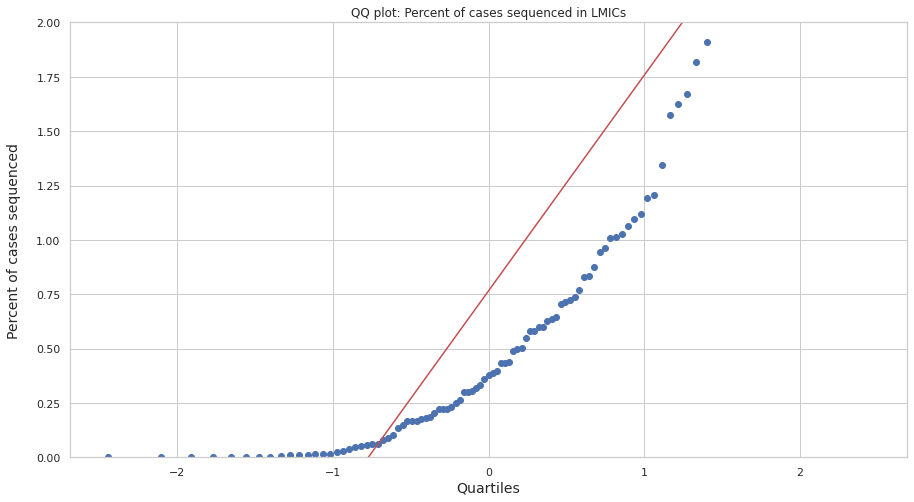

In [ ]:
# *********************************************************
#************************* Figure 1 QQplots ****************
#**********************************************************

from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_Sequencing['cases_sequenced'], dist="norm", plot=plt)
plt.title("QQ plot: Percent of cases sequenced in LMICs")
plt.ylim((0, 2))

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Percent of cases sequenced",
           size = 14,
          labelpad = axis_pad )

Text(0, 0.5, 'Number of cases sequenced per 100K')

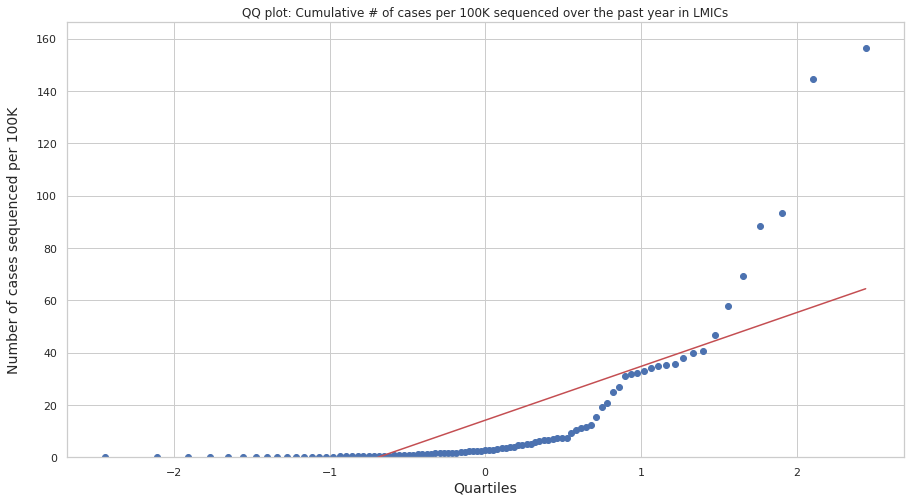

In [ ]:
# *********************************************************
#************************* Figure 1 QQplots ****************
#**********************************************************

from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_Sequencing['cum_sequences_pop_100k'], dist="norm", plot=plt)
plt.title("QQ plot: Cumulative # of cases per 100K sequenced over the past year in LMICs")
plt.ylim((0, None))

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Number of cases sequenced per 100K",
           size = 14,
          labelpad = axis_pad )

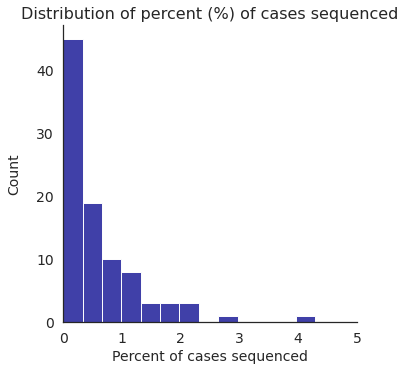

In [ ]:
# *********************************************************
#************************* Figure 2 Historgram ****************
#**********************************************************

title = "Distribution of percent (%) of cases sequenced"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

ax = sns.displot(LMIC_Sequencing, 
                              x="cases_sequenced", color = '#00008B')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Percent of cases sequenced", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 5))
sns.despine()

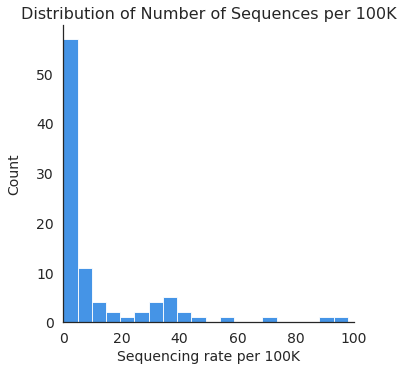

In [ ]:
# *********************************************************
#************************* Figure 2 Historgram ****************
#**********************************************************

title = "Distribution of Number of Sequences per 100K"
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("white")

ax = sns.displot(LMIC_Sequencing, 
                              x="cum_sequences_pop_100k", color = '#0771de')

plt.title(title, size = 16, y=1.1)
plt.xlabel("Sequencing rate per 100K", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
plt.xlim((0, 100))
sns.despine()

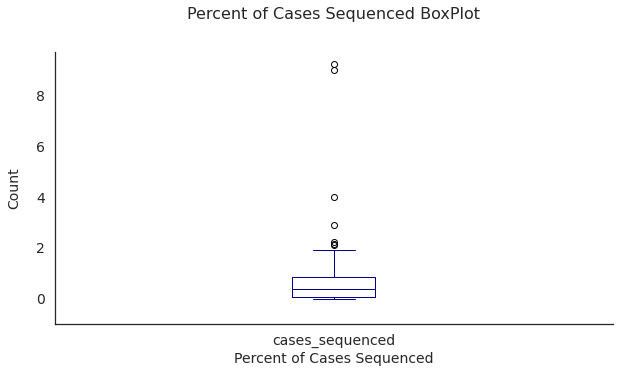

In [ ]:
title = "Percent of Cases Sequenced BoxPlot"
LMIC_Sequencing.boxplot(column =['cases_sequenced'], color = '#00008B', grid = False, figsize=(10,5))
plt.ylim((-1, None))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Percent of Cases Sequenced", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

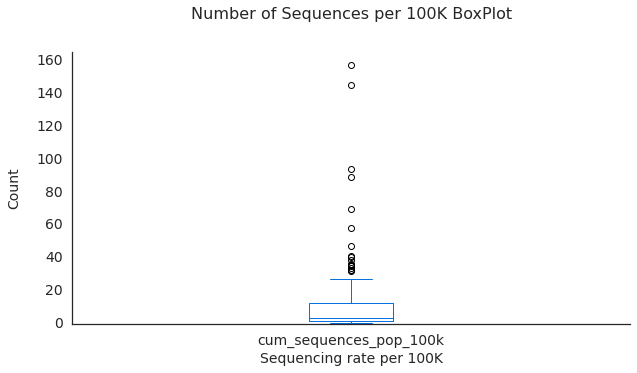

In [ ]:
title = "Number of Sequences per 100K BoxPlot"
LMIC_Sequencing.boxplot(column =['cum_sequences_pop_100k'], color = '#0771de', grid = False, figsize=(10,5))
plt.ylim((-1, None))

plt.title(title, size = 16, y=1.1)

plt.xlabel("Sequencing rate per 100K", 
           size = 14)
plt.ylabel("Count",
           size = 14,
          labelpad = axis_pad )
plt.xticks(size = 14)
plt.yticks(size = 14)
sns.despine()

In [ ]:
#Melt large dataframe

melt_percent_sequenced = pd.melt(LMIC_Sequencing, value_vars=['cases_sequenced'],
                   id_vars=['code'])

print (melt_percent_sequenced.variable.unique())
melt_percent_sequenced.head()

melt_sum_sequenced = pd.melt(LMIC_Sequencing, value_vars=['sequ_sum'],
                   id_vars=['code'])

print (melt_sum_sequenced.variable.unique())
melt_sum_sequenced.head()

melt_100k_sequenced = pd.melt(LMIC_Sequencing, value_vars=['cum_sequences_pop_100k'],
                   id_vars=['code'])

print (melt_100k_sequenced.variable.unique())
melt_100k_sequenced.head()



['cases_sequenced']
['sequ_sum']
['cum_sequences_pop_100k']


,code,variable,value
0,AFG,cum_sequences_pop_100k,0.215783
1,AGO,cum_sequences_pop_100k,2.735350
2,ALB,cum_sequences_pop_100k,1.563586
3,ARG,cum_sequences_pop_100k,15.421719
4,ARM,cum_sequences_pop_100k,3.172460


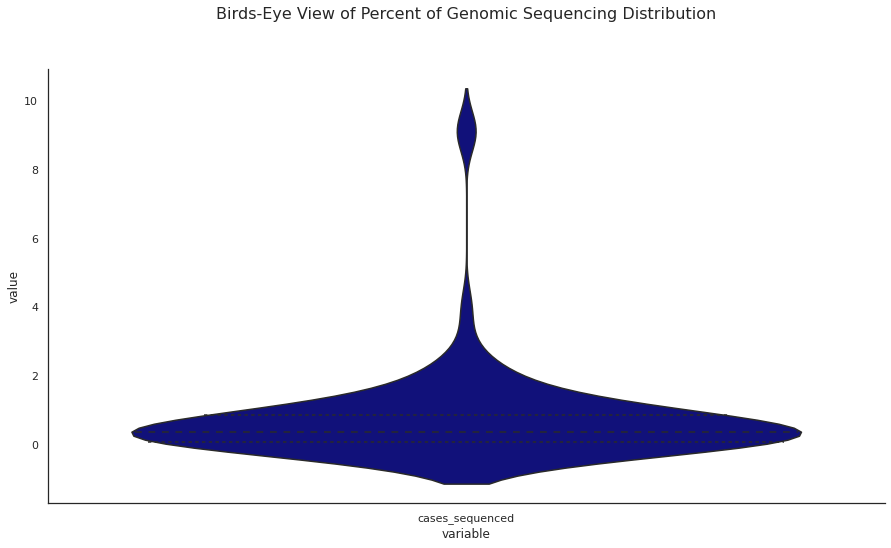

In [ ]:
#Quartile Plot
title = "Birds-Eye View of Percent of Genomic Sequencing Distribution"
sns.violinplot(x = 'variable', y = "value", color = '#00008B',
               data = melt_percent_sequenced, inner="quartile")

# display
plt.title(title, size = 16, y=1.1)
sns.despine()
plt.show()

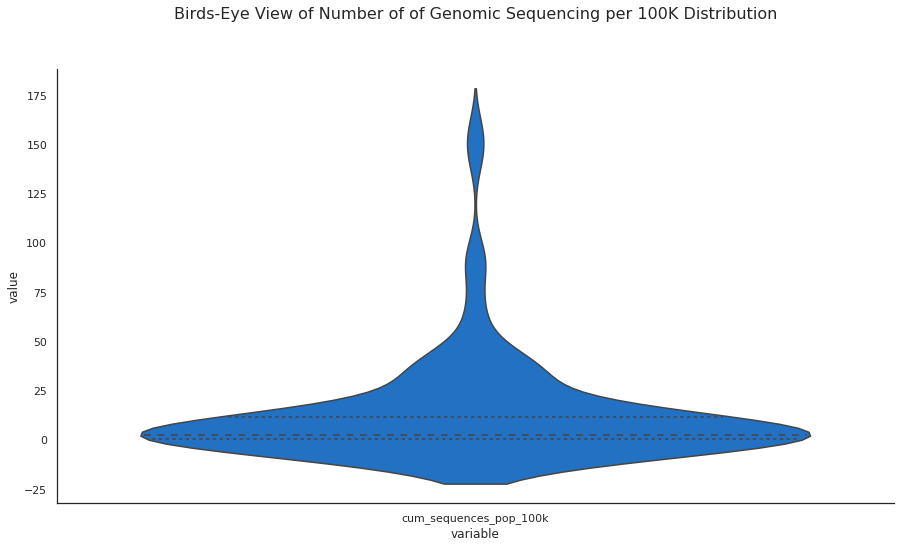

In [ ]:
#Quartile Plot
title = "Birds-Eye View of Number of of Genomic Sequencing per 100K Distribution"
sns.violinplot(x = 'variable', y = "value", color = '#0771de',
               data = melt_100k_sequenced, inner="quartile")

# display
plt.title(title, size = 16, y=1.1)
sns.despine()
plt.show()

#### Viz of Scatterplots

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text major ticklabel objects>)

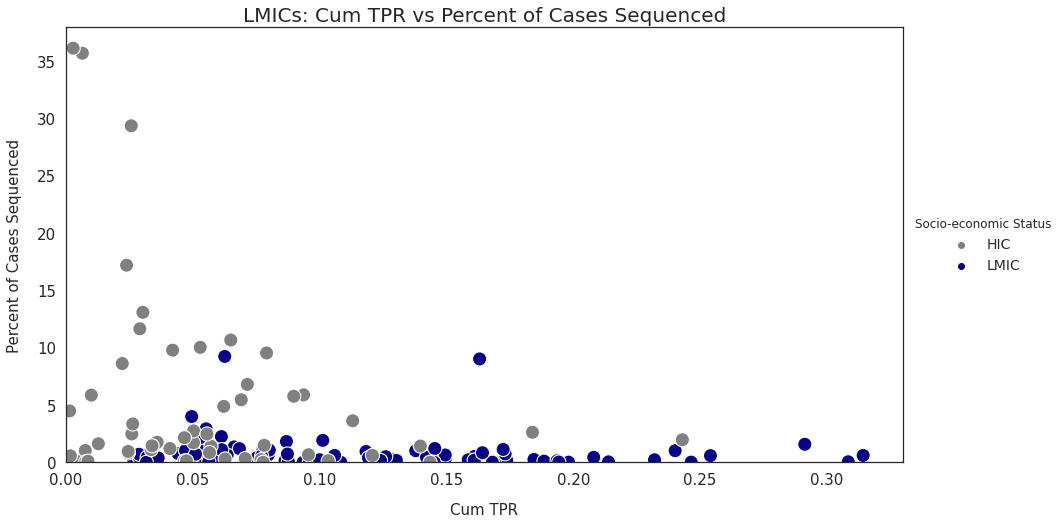

In [ ]:
#Scatterplot
#*********************************************************************
# Figure: Genomic Sequencing vs. Cum TPR in LMICS
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import matplotlib.lines as mlines
import matplotlib.ticker as ticker

#title and formatting
title = "LMICs: Cum TPR vs Percent of Cases Sequenced"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cases_sequenced", ci = None, hue = 'SES',
                     palette=["#090088"],
                     data=LMIC_Sequencing, s=200) 

ax = sns.scatterplot(x="cum_TPR", y="cases_sequenced", ci = None, hue = 'SES', 
                     palette =["#808080"], 
                     data=HIC_Sequencing, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="Socio-economic Status", prop={"size":14})

plt.title(title, size = 20)
plt.xlabel("Cum TPR",
           size = 15, labelpad = axis_pad)
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, None))
plt.xlim((0, None))


plt.xticks(size = 15)
plt.yticks(size = 15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

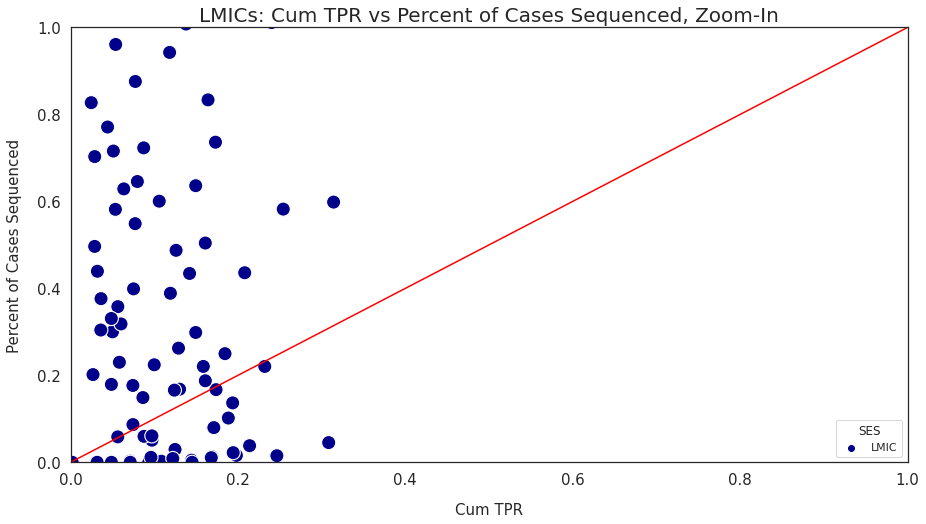

In [ ]:
#title and formatting
title = "LMICs: Cum TPR vs Percent of Cases Sequenced, Zoom-In"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cases_sequenced", ci = None, hue = 'SES',
             palette=["#00008B"],
            data=LMIC_Sequencing, s=200) 

line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title(title, size = 20)
plt.xlabel("Cum TPR", 
           size = 15, labelpad = axis_pad)
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, 1))
plt.xlim((0, 1))


plt.xticks(size = 15)
plt.yticks(size = 15)

(array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40.]),
 <a list of 9 Text major ticklabel objects>)

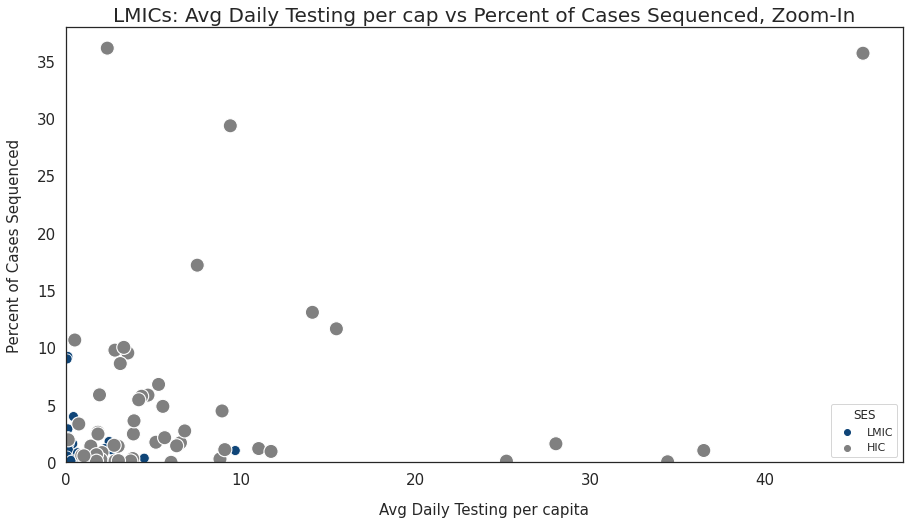

In [ ]:
#title and formatting
title = "LMICs: Avg Daily Testing per cap vs Percent of Cases Sequenced, Zoom-In"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cap_new_tests", y="cases_sequenced", ci = None, hue = 'SES',
             palette=["#0F4578"],
            data=LMIC_Sequencing, s=100) 

ax = sns.scatterplot(x="cap_new_tests", y="cases_sequenced", ci = None, hue = 'SES', 
                     palette =["#808080"], 
                     data=HIC_Sequencing, s=200) 


plt.title(title, size = 20)
plt.xlabel("Avg Daily Testing per capita", 
           size = 15, labelpad = axis_pad)
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, None))
plt.xlim((0, None))


plt.xticks(size = 15)
plt.yticks(size = 15)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <a list of 6 Text major ticklabel objects>)

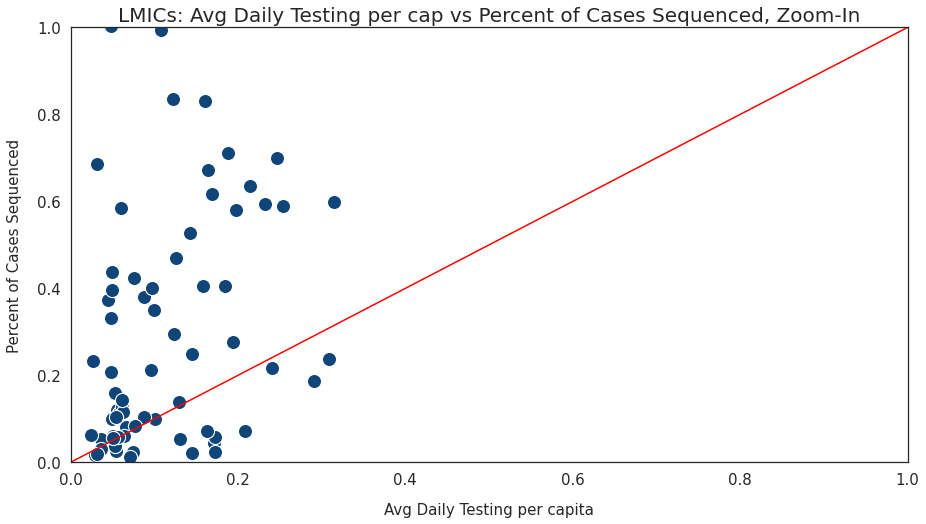

In [ ]:
#title and formatting
title = "LMICs: Avg Daily Testing per cap vs Percent of Cases Sequenced, Zoom-In"
sns.set_style("white")
#fig, ax = plt.subplots(figsize=(figure_size))
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_TPR", y="cap_new_tests", ci = None,
             color=["#0F4578"],
            data=LMIC_Sequencing, s=200) 

line = mlines.Line2D([0, 1], [0, 1], color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)

plt.title(title, size = 20)
plt.xlabel("Avg Daily Testing per capita", 
           size = 15, labelpad = axis_pad)
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, 1))
plt.xlim((0, 1))


plt.xticks(size = 15)
plt.yticks(size = 15)

In [ ]:
LMIC_Sequencing.describe()

,cases_truncated,all_new_tests,cum_TPR,cap_new_tests,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
count,9.500000e+01,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,9.293023e+05,1.034731e+07,0.111165,0.804885,469.817053,4364.652632,14.167044,0.765864
std,3.028402e+06,5.245051e+07,0.068252,1.249940,1476.431390,15026.234073,27.403347,1.414263
min,1.957000e+03,1.986000e+04,0.001955,0.013066,0.720000,0.000000,0.000000,0.000000
25%,2.640550e+04,3.428475e+05,0.055821,0.102265,39.655000,64.000000,0.662502,0.083263
50%,1.201330e+05,1.190487e+06,0.093509,0.400950,118.910000,316.000000,2.659848,0.376316
75%,4.672265e+05,3.460570e+06,0.159769,1.141709,379.195000,873.000000,11.930593,0.854562
max,2.459825e+07,5.053101e+08,0.314245,9.698291,13800.040000,86410.000000,156.561922,9.230535


In [ ]:
#check on discrepancy between Kaitlyn and Bri's code
Bosnia = LMIC_Sequencing.loc[(LMIC_Sequencing['country_x'] == 'Bosnia and Herzegovina')]
print (Bosnia.code.nunique())
(Bosnia.head())

1


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
19,BIH,179596.0,706853.0,0.254078,Bosnia and Herzegovina,Leverage,LMIC,0.590242,Bosnia & Herzegovina,32.81,1054,32.124352,0.582195


# **Phase 2: Creating Thresholds**

### QQplots

Text(0, 0.5, 'Percent of cases sequenced')

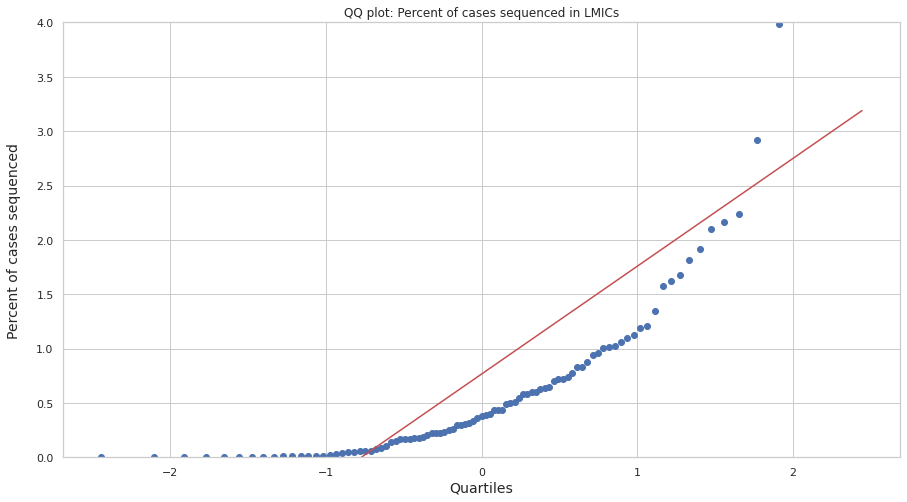

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_Sequencing['cases_sequenced'], dist="norm", plot=plt)
plt.title("QQ plot: Percent of cases sequenced in LMICs")
plt.ylim((0, 4))

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Percent of cases sequenced",
           size = 14,
          labelpad = axis_pad )

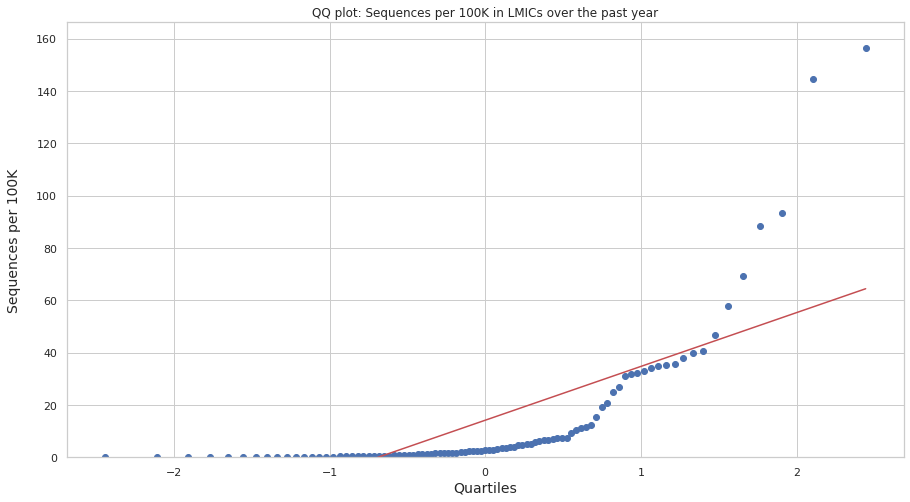

In [ ]:
from scipy import stats
sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")

stats.probplot(LMIC_Sequencing['cum_sequences_pop_100k'], dist="norm", plot=plt)
plt.title("QQ plot: Sequences per 100K in LMICs over the past year")
plt.ylim((0, None))

plt.xlabel("Quartiles", 
           size = 14)
plt.ylabel("Sequences per 100K",
           size = 14,
          labelpad = axis_pad )

ax.set_yscale('log')

### Summary Stats

In [ ]:
LMIC_Sequencing.describe()

,cases_truncated,all_new_tests,cum_TPR,cap_new_tests,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
count,9.500000e+01,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,9.293023e+05,1.034731e+07,0.111165,0.804885,469.817053,4364.652632,14.167044,0.765864
std,3.028402e+06,5.245051e+07,0.068252,1.249940,1476.431390,15026.234073,27.403347,1.414263
min,1.957000e+03,1.986000e+04,0.001955,0.013066,0.720000,0.000000,0.000000,0.000000
25%,2.640550e+04,3.428475e+05,0.055821,0.102265,39.655000,64.000000,0.662502,0.083263
50%,1.201330e+05,1.190487e+06,0.093509,0.400950,118.910000,316.000000,2.659848,0.376316
75%,4.672265e+05,3.460570e+06,0.159769,1.141709,379.195000,873.000000,11.930593,0.854562
max,2.459825e+07,5.053101e+08,0.314245,9.698291,13800.040000,86410.000000,156.561922,9.230535


### Outlining Thresholds

In [ ]:
LMIC_Sequencing.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528
5,ARG,4050131.0,23303881.0,0.173796,Argentina,Strengthen,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082
6,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837


In [ ]:
LMIC_Sequencing.dtypes

code                       object
cases_truncated           float64
all_new_tests             float64
cum_TPR                   float64
country_x                  object
old_archetype              object
SES                        object
cap_new_tests             float64
country_y                  object
pop_100k                  float64
sequ_sum                    int64
cum_sequences_pop_100k    float64
cases_sequenced           float64
dtype: object

In [ ]:
#assess quartiles, mean, std of Cum TPR
LMIC_Sequencing.quantile([.05, .1, .25, .33, .5, .66, .75, .90, .95], axis = 0)

,cases_truncated,all_new_tests,cum_TPR,cap_new_tests,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0.05,4102.80,86689.50,0.030867,0.023662,4.9810,0.00,0.000000,0.000000
0.10,6828.60,147936.00,0.045388,0.047335,9.3280,19.60,0.120115,0.009510
0.25,26405.50,342847.50,0.055821,0.102265,39.6550,64.00,0.662502,0.083263
0.33,34524.74,560765.22,0.063644,0.144417,68.7254,106.04,1.098517,0.176748
0.50,120133.00,1190487.00,0.093509,0.400950,118.9100,316.00,2.659848,0.376316
0.66,288899.76,2352622.08,0.130572,0.687215,263.8472,565.72,6.647581,0.636432
0.75,467226.50,3460569.50,0.159769,1.141709,379.1950,873.00,11.930593,0.854562
0.90,2384580.40,15786177.00,0.196601,1.830398,972.2480,8822.80,37.093622,1.653029
0.95,3677160.50,26763969.80,0.242049,2.528914,1771.2430,14008.80,61.272770,2.188092


In [ ]:
#Threshold 2 --> Bad Sequencing Rate OR Bad Median new testng per capita for "Test Classification"
#5th percentile range for Daily Testing Rate and 90th percentile range for Cum TPR

def num (x):
    if x >= 1 :
        return 'Strengthen' 
    elif x < 1:
        return 'Other'
  
LMIC_Sequencing['CutOff_1'] = LMIC_Sequencing['cases_sequenced'].apply(lambda x : num (x))
LMIC_Sequencing.head()

LMIC_Test1 = LMIC_Sequencing.loc[(LMIC_Sequencing['CutOff_1'] == 'Strengthen')]
print (LMIC_Test1.code.nunique())
LMIC_Test1.head(2)

21


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen
14,BFA,10944.0,202874.0,0.053945,Burkina Faso,Leverage,LMIC,0.026590,Burkina Faso,209.03,242,1.157729,2.102337,Strengthen


In [ ]:
LMIC_Sequencing.dtypes

code                       object
cases_truncated           float64
all_new_tests             float64
cum_TPR                   float64
country_x                  object
old_archetype              object
SES                        object
cap_new_tests             float64
country_y                  object
pop_100k                  float64
sequ_sum                    int64
cum_sequences_pop_100k    float64
cases_sequenced           float64
CutOff_1                   object
dtype: object

In [ ]:
#Threshold 2 --> 1% cases sequenced and 50 sequencing per 100K

LMIC_Test2 = LMIC_Sequencing[(LMIC_Sequencing.cases_sequenced >= 1) | (LMIC_Sequencing.cum_sequences_pop_100k >= 30 )]
LMIC_Test2.head()

def num (x):
    if x >= -20 :
        return 'Strengthen' 
    elif x < -20:
        return 'Other'

#assigning "Cut-off 5" column and classifications to larger df so then we can create visuals later
LMIC_Sequencing['CutOff_2'] = LMIC_Test2['cases_sequenced'].apply(lambda x : num (x))
LMIC_Sequencing.head()
#filling in Nans
LMIC_Sequencing['CutOff_2'].fillna('Other', inplace=True)


LMIC_Test2['CutOff_2'] = LMIC_Test2['cases_sequenced'].apply(lambda x : num (x))
LMIC_Test2.head()

LMIC_Test2 = LMIC_Test2.loc[(LMIC_Test2['CutOff_2'] == 'Strengthen')]

print (LMIC_Test2.code.nunique())
LMIC_Test2.head(2)


31


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen,Strengthen
14,BFA,10944.0,202874.0,0.053945,Burkina Faso,Leverage,LMIC,0.026590,Burkina Faso,209.03,242,1.157729,2.102337,Strengthen,Strengthen


In [ ]:
#Threshold 2 --> 1% cases sequenced and 50 sequencing per 100K

LMIC_Test3 = LMIC_Sequencing[(LMIC_Sequencing.cases_sequenced >= 0.5) | (LMIC_Sequencing.cum_sequences_pop_100k >= 30 )]
LMIC_Test3.head()

def num (x):
    if x >= -20 :
        return 'Strengthen' 
    elif x < -20:
        return 'Other'

#assigning "Cut-off 5" column and classifications to larger df so then we can create visuals later
LMIC_Sequencing['CutOff_3'] = LMIC_Test2['cases_sequenced'].apply(lambda x : num (x))
LMIC_Sequencing.head()
#filling in Nans
LMIC_Sequencing['CutOff_3'].fillna('Other', inplace=True)


LMIC_Test3['CutOff_3'] = LMIC_Test3['cases_sequenced'].apply(lambda x : num (x))
LMIC_Test3.head()

LMIC_Test3 = LMIC_Test3.loc[(LMIC_Test3['CutOff_3'] == 'Strengthen')]

print (LMIC_Test3.code.nunique())
LMIC_Test3.head(2)


41


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen,Strengthen,Strengthen
14,BFA,10944.0,202874.0,0.053945,Burkina Faso,Leverage,LMIC,0.026590,Burkina Faso,209.03,242,1.157729,2.102337,Strengthen,Strengthen,Strengthen


In [ ]:
Global_Sequencing.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924,Andorra,0.77,48,62.337662,0.289978
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950,United Arab Emirates,98.90,570,5.763397,0.102250


In [ ]:
#Threshold 2 --> 1% cases sequenced and 50 sequencing per 100K

HIC_LMIC_Scenario = Global_Sequencing[(Global_Sequencing.cases_sequenced >= 0.5) | (Global_Sequencing.cum_sequences_pop_100k >= 30 )]
LMIC_Test3.head()

def num (x):
    if x >= -20 :
        return 'Strengthen' 
    elif x < -20:
        return 'Other'

#assigning "Cut-off 5" column and classifications to larger df so then we can create visuals later
Global_Sequencing['CutOff_3'] = LMIC_Test2['cases_sequenced'].apply(lambda x : num (x))
Global_Sequencing.head()
#filling in Nans
Global_Sequencing['CutOff_3'].fillna('Other', inplace=True)


LMIC_Test3['CutOff_3'] = LMIC_Test3['cases_sequenced'].apply(lambda x : num (x))
LMIC_Test3.head()

LMIC_Test3 = LMIC_Test3.loc[(LMIC_Test3['CutOff_3'] == 'Strengthen')]

print (LMIC_Test3.code.nunique())
LMIC_Test3.head(2)

41


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen,Strengthen,Strengthen
14,BFA,10944.0,202874.0,0.053945,Burkina Faso,Leverage,LMIC,0.026590,Burkina Faso,209.03,242,1.157729,2.102337,Strengthen,Strengthen,Strengthen


In [ ]:
print (LMIC_Sequencing.CutOff_3.unique())

['Other' 'Strengthen']


In [ ]:
LMIC_Sequencing.dtypes

code                       object
cases_truncated           float64
all_new_tests             float64
cum_TPR                   float64
country_x                  object
old_archetype              object
SES                        object
cap_new_tests             float64
country_y                  object
pop_100k                  float64
sequ_sum                    int64
cum_sequences_pop_100k    float64
cases_sequenced           float64
CutOff_1                   object
CutOff_2                   object
CutOff_3                   object
dtype: object

#**Phase 3: Benchmark against existing archetype**

## Import Existing NGS archetype & process data

In [ ]:
#bring in existing archetype df
#read in NGS last updated (Nov) data
NGS_git = ("https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/LMIC%20centered%20map/NGS_flourish_file_11.9.2021_TEST3.csv")
df_NGS = pd.read_csv (NGS_git)
df_NGS.drop('geometry', inplace=True, axis=1)
print (df_NGS.columns.nunique())
print (df_NGS.columns.unique())
df_NGS.head(3)

28
Index(['Unnamed: 0', 'country', 'code', 'region', 'who_testing_capacity',
       'owid_testing_capacity', 'pop_100k', 'max_new_tests_cap_avg',
       'cap_cum_tests', 'cum_tpr', 'dx_testing_capacity', 'ngs_capacity',
       'sequencing_capacity', 'total_sequences', 'submission_count',
       'total_viable_sequences', 'all_cases', 'percent_cases_sequenced',
       'sequences_per_capita_per_100k', 'sars_cov_2_sequencing',
       'cases_newly_reported_in_last_7_days_per_100000_population',
       'world_bank_economies', 'archetype_full', 'archetype', 'label',
       'dx_testing_capacity_clean', 'sequencing_capacity_clean',
       'sars_cov_2_sequencing_clean'],
      dtype='object')


,Unnamed: 0,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,1,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
2,2,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences


In [ ]:
df_NGS_subset = df_NGS[['code', 'archetype', 'who_testing_capacity', 'max_new_tests_cap_avg', 'sequencing_capacity_clean']]
df_NGS_subset.head()

,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
0,AFG,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent
1,ALB,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent
2,DZA,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent
3,ASM,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent
4,AND,High Income*,1 - Reliable,11029.48,High Income*


In [ ]:
#subset to "Test" category
NGS_Strength = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Strengthen')]
print (NGS_Strength.shape)
print (NGS_Strength.code.nunique())
NGS_Strength.head()

(36, 5)
36


,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
8,ARG,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent
15,BGD,Strengthen,1 - Reliable,25.41,4+ NGS facilities or equivalent
25,BWA,Strengthen,1 - Reliable,260.37,1-3 NGS facilities or equivalent
26,BRA,Strengthen,1 - Reliable,160.10,4+ NGS facilities or equivalent
30,BGR,Strengthen,1 - Reliable,302.99,4+ NGS facilities or equivalent


In [ ]:
No_data2 = NGS_Strength[NGS_Strength['max_new_tests_cap_avg'].notna()]
print (No_data2.code.nunique())
print (No_data2.code.shape)
No_data2.head(12)

#For now, I am going to delete those missing values...
# dropping the rows having NaN values
df_NGS_Strength = No_data2[No_data2['who_testing_capacity'].notna()]
#dropping data with 0 as cum testing
print (df_NGS_Strength.shape)
df_NGS_Strength.describe()

36
(36,)
(36, 5)


,max_new_tests_cap_avg
count,36.000000
mean,217.489722
std,555.443693
min,2.500000
25%,25.942500
50%,71.880000
75%,260.515000
max,3381.690000


In [ ]:
print(df_NGS_Strength.shape)
df_NGS_Strength.drop_duplicates(subset = ['code'], inplace=True)
print(df_NGS_Strength.shape)

(36, 5)
(36, 5)


## Merge clean old archetype dataset with thresholds and compare countries archetypes

In [ ]:
LMIC_Test1.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen
14,BFA,10944.0,202874.0,0.053945,Burkina Faso,Leverage,LMIC,0.026590,Burkina Faso,209.03,242,1.157729,2.102337,Strengthen
16,BGR,546208.0,6282074.0,0.086947,Bulgaria,Strengthen,LMIC,2.477139,Bulgaria,69.48,10058,144.761082,1.816737,Strengthen
21,BLZ,22143.0,323621.0,0.068423,Belize,Connect,LMIC,2.227721,Belize,3.98,276,69.346734,1.192276,Strengthen
27,BWA,204451.0,1482415.0,0.137918,Botswana,Strengthen,LMIC,1.726790,Botswana,23.52,2083,88.562925,1.007814,Strengthen


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_1 = df_NGS_Strength.merge(LMIC_Test1, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code', 'CutOff_1'])
print (Mismatch_LMIC_1.shape)
print (Mismatch_LMIC_1.shape)
Mismatch_LMIC_1.head()

#No Match between archetypes
Option_1_Compare = Mismatch_LMIC_1[Mismatch_LMIC_1['CutOff_1'].notna()]

#how many countries have mis-match on "test"
print (Option_1_Compare.code.nunique())
Option_1_Compare.head(8)

#sort values for visualizing 
Option_1_Compare.sort_values(by='cases_sequenced', ascending=True, inplace=True)
Option_1_Compare.head(4)

(36, 18)
(36, 18)
11


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1
2,BWA,Strengthen,1 - Reliable,260.37,1-3 NGS facilities or equivalent,204451.0,1482415.0,0.137918,Botswana,Strengthen,LMIC,1.726790,Botswana,23.52,2083.0,88.562925,1.007814,Strengthen
9,ECU,Strengthen,1 - Reliable,29.29,1-3 NGS facilities or equivalent,336131.0,1399632.0,0.240157,Ecuador,Strengthen,LMIC,0.217344,Ecuador,176.43,3419.0,19.378790,1.011176,Strengthen
32,TUR,Strengthen,1 - Reliable,375.87,4+ NGS facilities or equivalent,4767490.0,59444359.0,0.080201,Turkey,Strengthen,LMIC,2.649724,Turkey,843.39,78653.0,93.258161,1.063057,Strengthen
19,MDG,Strengthen,1 - Reliable,4.55,1-3 NGS facilities or equivalent,32854.0,225940.0,0.145410,Madagascar,Strengthen,LMIC,0.022354,Madagascar,276.91,418.0,1.509516,1.205758,Strengthen


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC_2 = df_NGS_Strength.merge(LMIC_Test2, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code', 'CutOff_2'])
print (Mismatch_LMIC_2.shape)
print (Mismatch_LMIC_2.shape)
Mismatch_LMIC_2.head()

#No Match between archetypes
Option_2_Compare = Mismatch_LMIC_2[Mismatch_LMIC_2['CutOff_2'].notna()]

#how many countries have mis-match on "test"
print (Option_2_Compare.code.nunique())
Option_2_Compare.head(8)

#sort values for visualizing 
Option_2_Compare.sort_values(by='cases_sequenced', ascending=True, inplace=True)
Option_2_Compare.head(4)

(36, 19)
(36, 19)
15


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2
7,CRI,Strengthen,1 - Reliable,194.20,1-3 NGS facilities or equivalent,402088.0,2498055.0,0.160960,Costa Rica,Strengthen,LMIC,1.343539,Costa Rica,50.94,2034.0,39.929329,0.504170,Other,Strengthen
3,BRA,Strengthen,1 - Reliable,160.10,4+ NGS facilities or equivalent,14610426.0,46493814.0,0.314245,Brazil,Strengthen,LMIC,0.599270,Brazil,2125.59,86410.0,40.652242,0.598332,Other,Strengthen
28,ZAF,Strengthen,1 - Reliable,101.95,4+ NGS facilities or equivalent,2391908.0,14565741.0,0.164215,South Africa,Strengthen,LMIC,0.672851,South Africa,593.09,19599.0,33.045575,0.833413,Other,Strengthen
25,PER,Strengthen,1 - Reliable,187.53,4+ NGS facilities or equivalent,1284663.0,16599801.0,0.077390,Peru,Strengthen,LMIC,1.379319,Peru,329.72,11300.0,34.271503,0.875710,Other,Strengthen


In [ ]:
Mismatch_LMIC_3 = df_NGS_Strength.merge(LMIC_Test3, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code', 'CutOff_3'])
print (Mismatch_LMIC_3.shape)
print (Mismatch_LMIC_3.shape)
Mismatch_LMIC_3.head()

#No Match between archetypes
Option_3_Compare = Mismatch_LMIC_3[Mismatch_LMIC_3['CutOff_3'].notna()]

#how many countries have mis-match on "test"
print (Option_3_Compare.code.nunique())
Option_3_Compare.head(8)

#sort values for visualizing 
Option_3_Compare.sort_values(by='cases_sequenced', ascending=True, inplace=True)
Option_3_Compare.head(4)

(36, 20)
(36, 20)
17


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3
7,CRI,Strengthen,1 - Reliable,194.20,1-3 NGS facilities or equivalent,402088.0,2498055.0,0.160960,Costa Rica,Strengthen,LMIC,1.343539,Costa Rica,50.94,2034.0,39.929329,0.504170,Other,Strengthen,Strengthen
33,UGA,Strengthen,1 - Reliable,15.87,1-3 NGS facilities or equivalent,107115.0,1388193.0,0.077161,Uganda,Strengthen,LMIC,0.083148,Uganda,457.41,608.0,1.329223,0.548771,Other,Other,Strengthen
3,BRA,Strengthen,1 - Reliable,160.10,4+ NGS facilities or equivalent,14610426.0,46493814.0,0.314245,Brazil,Strengthen,LMIC,0.599270,Brazil,2125.59,86410.0,40.652242,0.598332,Other,Strengthen,Strengthen
27,SEN,Strengthen,1 - Reliable,19.31,1-3 NGS facilities or equivalent,56074.0,641974.0,0.087346,Senegal,Strengthen,LMIC,0.105043,Senegal,167.44,408.0,2.436694,0.723020,Other,Other,Strengthen


## Visualize Countries that match w/Existing Thresholds

In [ ]:
Option_1_Compare.head()

,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1
2,BWA,Strengthen,1 - Reliable,260.37,1-3 NGS facilities or equivalent,204451.0,1482415.0,0.137918,Botswana,Strengthen,LMIC,1.726790,Botswana,23.52,2083.0,88.562925,1.007814,Strengthen
9,ECU,Strengthen,1 - Reliable,29.29,1-3 NGS facilities or equivalent,336131.0,1399632.0,0.240157,Ecuador,Strengthen,LMIC,0.217344,Ecuador,176.43,3419.0,19.378790,1.011176,Strengthen
32,TUR,Strengthen,1 - Reliable,375.87,4+ NGS facilities or equivalent,4767490.0,59444359.0,0.080201,Turkey,Strengthen,LMIC,2.649724,Turkey,843.39,78653.0,93.258161,1.063057,Strengthen
19,MDG,Strengthen,1 - Reliable,4.55,1-3 NGS facilities or equivalent,32854.0,225940.0,0.145410,Madagascar,Strengthen,LMIC,0.022354,Madagascar,276.91,418.0,1.509516,1.205758,Strengthen
21,MEX,Strengthen,1 - Reliable,33.81,4+ NGS facilities or equivalent,2550440.0,8756751.0,0.291254,Mexico,Strengthen,LMIC,0.186074,Mexico,1289.33,40153.0,31.142531,1.572513,Strengthen


21
11
['BWA' 'ECU' 'TUR' 'MDG' 'MEX' 'KHM' 'BGR' 'KEN' 'NGA' 'GHA' 'GMB']


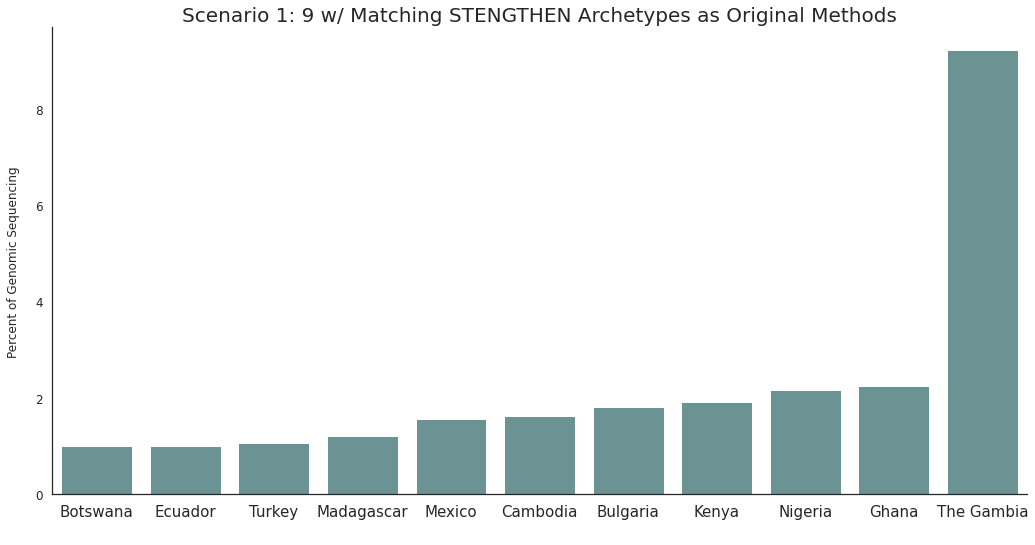

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country_x", 
            y="cases_sequenced",
            data=Option_1_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 1: 9 w/ Matching STENGTHEN Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Percent of Genomic Sequencing",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

#how many countries are in new archetype
print (LMIC_Test1.code.nunique())
#how many countries have mis-match on "test"
print (Option_1_Compare.code.nunique())
print (Option_1_Compare.code.unique())

31
15


AttributeError: ignored

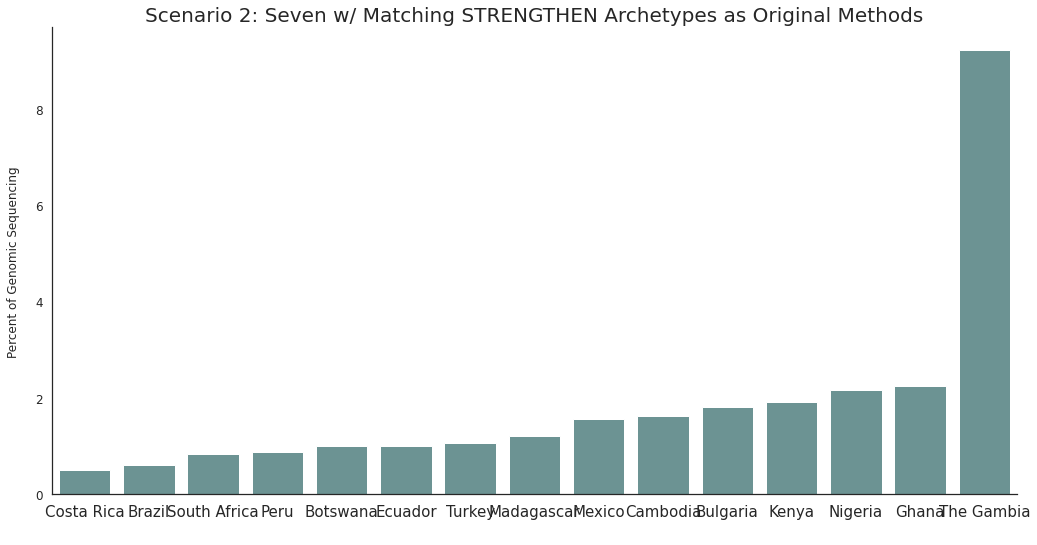

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country_x", 
            y="cases_sequenced",
            data=Option_2_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 2: Seven w/ Matching STRENGTHEN Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Percent of Genomic Sequencing",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

#how many countries are in new archetype
print (LMIC_Test2.code.nunique())
#how many countries have mis-match on "test"
print (Option_2_Compare.code.nunique())
print (Option_2_Compare.country.unique())

41


AttributeError: ignored

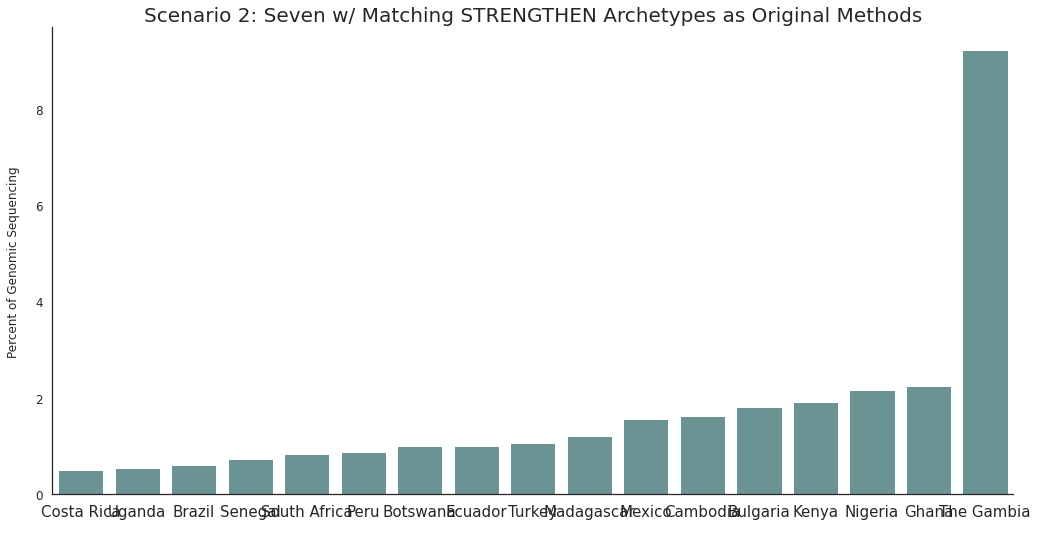

In [ ]:
#formatting of the barchart
fig, ax = plt.subplots(1,figsize=(15, 8))
sns.set(font_scale=1.6)
sns.set_style("white")
sns.despine()

sns.barplot(x="country_x", 
            y="cases_sequenced",
            data=Option_3_Compare, color = '#669999')

    
#extra formatting
plt.title("Scenario 2: Seven w/ Matching STRENGTHEN Archetypes as Original Methods", size = 20)
plt.xlabel(" ", size = 15)
plt.ylabel("Percent of Genomic Sequencing",
           size = 12,
          labelpad = axis_pad )
plt.tight_layout()

plt.xticks(size = 15) #size of the words
plt.yticks(size = 12)
plt.ylim((0, None))

#how many countries are in new archetype
print (LMIC_Test3.code.nunique())
print (LMIC_Test3.country.unique())
#how many countries have mis-match on "test"
print (Option_3_Compare.code.nunique())
print (Option_3_Compare.country.unique())

## Scatterplot of Existing & new STRENGTHEN archetypes

### Scatterplot of Existing Archetypes

In [ ]:
NGS_Arch_scatterplot_df = LMIC_Sequencing.merge(df_NGS_Strength, how='left', 
                    left_on=['code'],
                    right_on=['code'])
print (NGS_Arch_scatterplot_df.shape)
print (NGS_Arch_scatterplot_df.shape)
NGS_Arch_scatterplot_df.head()

(95, 20)
(95, 20)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,NaN,NaN,NaN,NaN
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen,Strengthen,Strengthen,NaN,NaN,NaN,NaN
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528,Other,Other,Other,NaN,NaN,NaN,NaN
3,ARG,4050131.0,23303881.0,0.173796,Argentina,Strengthen,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent
4,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837,Other,Other,Other,NaN,NaN,NaN,NaN


In [ ]:
def num (x):
    if x == 'Strengthen' :
        return 'EXISTING Strengthen Archetype' 
    else:
        return 'Other Archetypes'
    
NGS_Arch_scatterplot_df['NGS Archetype'] = NGS_Arch_scatterplot_df['archetype'].apply(lambda x : num (x))
NGS_Arch_scatterplot_df.shape
NGS_Arch_scatterplot_df.head(2)

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS Archetype
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,NaN,NaN,NaN,NaN,Other Archetypes
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Strengthen,Strengthen,Strengthen,NaN,NaN,NaN,NaN,Other Archetypes


In [ ]:
#Check to merge and new variables are correct
Data_available = NGS_Arch_scatterplot_df.loc[(NGS_Arch_scatterplot_df['NGS Archetype'] == 'EXISTING Strengthen Archetype')]
print (Data_available.code.nunique())
print (Data_available.code.unique())

31
['ARG' 'BGD' 'BGR' 'BRA' 'BWA' 'COD' 'COL' 'CRI' 'ECU' 'EGY' 'GHA' 'GMB'
 'GTM' 'IDN' 'IND' 'IRN' 'JOR' 'KEN' 'KHM' 'MDG' 'MEX' 'MKD' 'NGA' 'PAK'
 'PER' 'PHL' 'SEN' 'TUR' 'UGA' 'ZAF' 'ZMB']


(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 6 Text major ticklabel objects>)

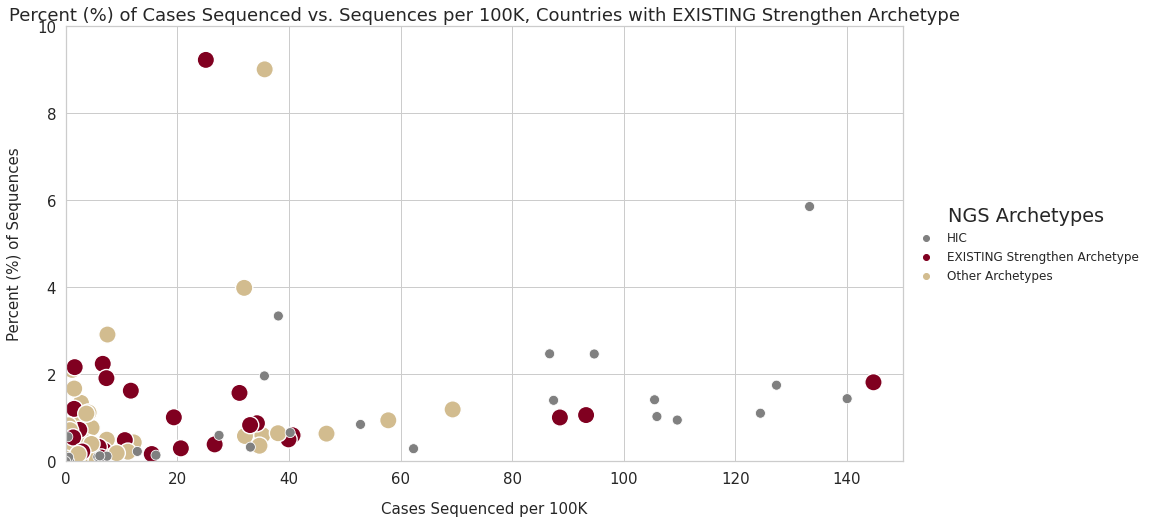

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced vs. Sequences per 100K, Countries with EXISTING Strengthen Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_sequences_pop_100k", y="cases_sequenced", ci = None, hue = 'NGS Archetype',
             palette=["#D2BC8F", "#800020"],
              data=NGS_Arch_scatterplot_df, s=300)

ax = sns.scatterplot(x="cum_sequences_pop_100k", y="cases_sequenced", ci = None, hue = 'SES',
             palette=["#808080"],
              data=HIC_Sequencing, s=100)

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Archetypes", prop={"size":12})


 
plt.title(title, size = 18)
plt.xlabel("Cases Sequenced per 100K", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent (%) of Sequences", 
           size = 15, labelpad = axis_pad )

#ax.set_xscale('log')

plt.ylim((0, 10))
plt.xlim((0, 150))


plt.xticks(size = 15)
plt.yticks(size = 15)

In [ ]:
LMIC_Sequencing.head()

# this will replace "Boston Celtics" with "Omega Warrior"
LMIC_Sequencing.replace(to_replace ="Strengthen",
                 value ="Sustain", inplace = True)
LMIC_Sequencing.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528,Other,Other,Other
5,ARG,4050131.0,23303881.0,0.173796,Argentina,Sustain,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other
6,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837,Other,Other,Other


### Scatterplot of Scenario Archetypes

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 6 Text major ticklabel objects>)

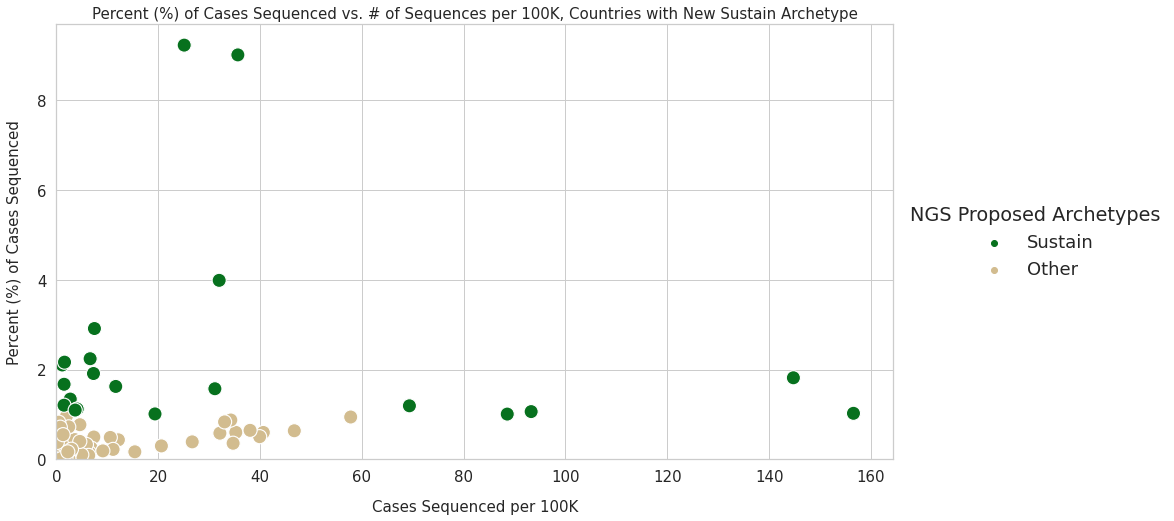

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced vs. # of Sequences per 100K, Countries with New Sustain Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_sequences_pop_100k", y="cases_sequenced", ci = None, hue = 'CutOff_1',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_Sequencing, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":18})


 
plt.title(title, size = 15)
plt.xlabel("Cases Sequenced per 100K", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent (%) of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

(array([-2.,  0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 7 Text major ticklabel objects>)

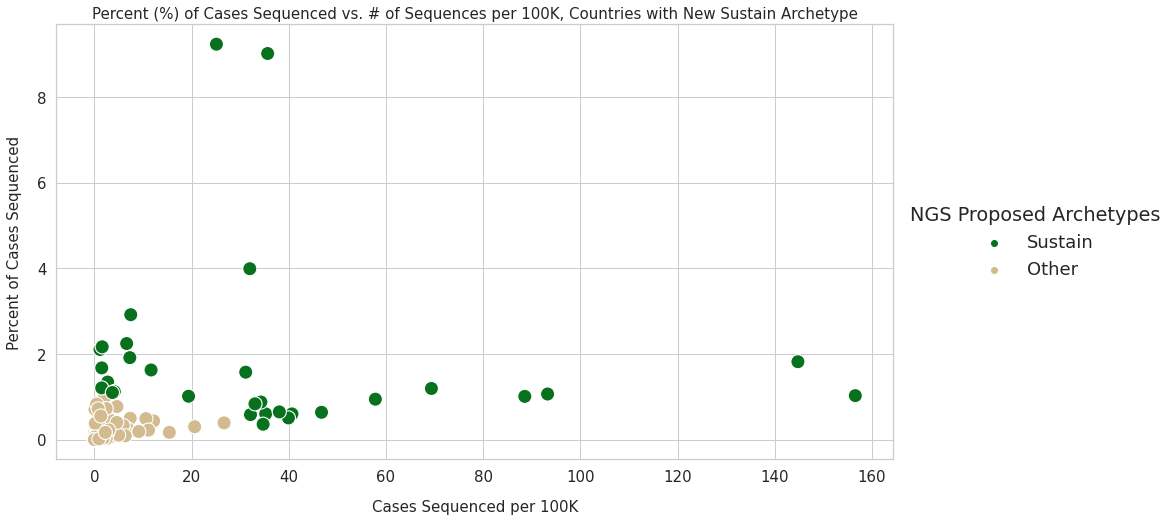

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced vs. # of Sequences per 100K, Countries with New Sustain Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_sequences_pop_100k", y="cases_sequenced", ci = None, hue = 'CutOff_2',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_Sequencing, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":18})


 
plt.title(title, size = 15)
plt.xlabel("Cases Sequenced per 100K", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')


plt.xticks(size = 15)
plt.yticks(size = 15)

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 <a list of 6 Text major ticklabel objects>)

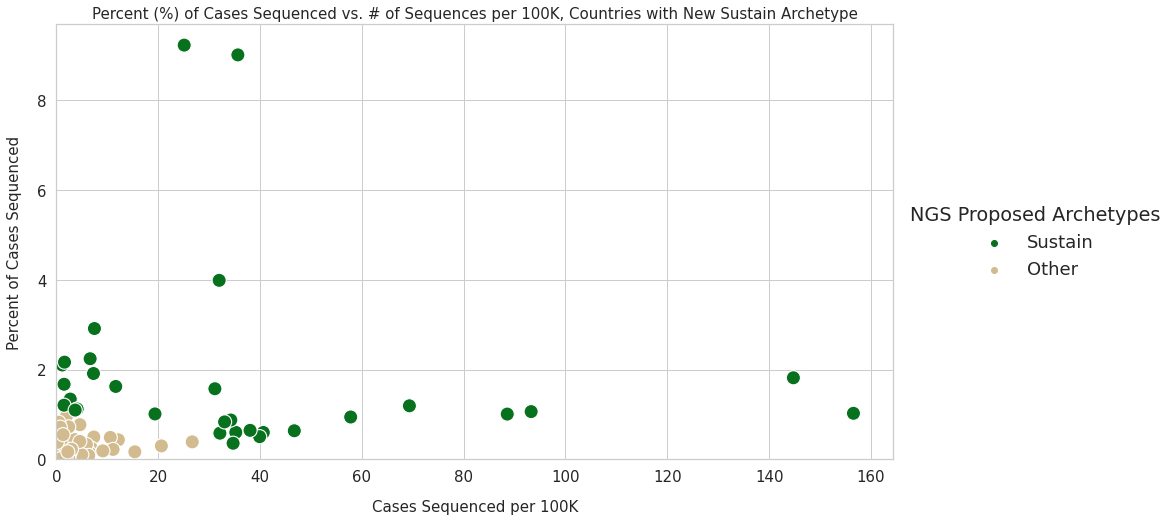

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced vs. # of Sequences per 100K, Countries with New Sustain Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
ax = sns.scatterplot(x="cum_sequences_pop_100k", y="cases_sequenced", ci = None, hue = 'CutOff_3',
             palette=["#D2BC8F", "#07711E"],
              data=LMIC_Sequencing, s=200) 

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":18})


 
plt.title(title, size = 15)
plt.xlabel("Cases Sequenced per 100K", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

plt.ylim((0, None))
plt.xlim((0, None))

#ax.set_yscale('log')
#ax.set_xscale('log')

plt.xticks(size = 15)
plt.yticks(size = 15)

# **Phase 4: Hierchical Archetyping**

In [ ]:
df_NGS_subset.head()

,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
0,AFG,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent
1,ALB,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent
2,DZA,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent
3,ASM,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent
4,AND,High Income*,1 - Reliable,11029.48,High Income*


In [ ]:
print (df_NGS_subset.shape)

(238, 5)


In [ ]:
print(df_NGS_subset.shape)
df_NGS_subset.drop_duplicates(subset = ['code'], inplace=True)
print(df_NGS_subset.shape)

(238, 5)
(237, 5)


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
Test_OG = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Test')]
Test_OG.code.nunique()

42

In [ ]:
Stregnthen_OG = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Strengthen')]
Stregnthen_OG.code.nunique()

36

In [ ]:
Leverage_OG = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Leverage')]
Leverage_OG.code.nunique()

28

In [ ]:
Connect_OG = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Connect')]
Connect_OG.code.nunique()

47

In [ ]:
LMIC_N_OG = df_NGS_subset.loc[(df_NGS_subset['archetype'] != 'High Income*')]
LMIC_N_OG.code.nunique()

153

In [ ]:
df_NGS.head()

,Unnamed: 0,country,code,region,who_testing_capacity,owid_testing_capacity,pop_100k,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean
0,0,Afghanistan,AFG,Eastern Mediterranean,1 - Reliable,0.0,389.28,10.65,1970.843609,0.203075,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,94,99,94.0,155764.0,0.06,0.24,1-499 sequences,0.63,Low income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
1,1,Albania,ALB,Europe,1 - Reliable,1.0,28.78,190.16,43816.504517,0.141791,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,42,42,42.0,177971.0,0.02,1.46,1-499 sequences,103.62,Upper middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
2,2,Algeria,DZA,Africa,1 - Reliable,1.0,438.51,4.46,525.764521,0.891131,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,72,72,60.0,205286.0,0.04,0.16,1-499 sequences,1.66,Lower middle income,2 - Connect,Connect,– Set-up sample referral networks or build NGS...,Reliable testing capacity,0 NGS facilities or equivalent,1-499 sequences
3,3,American Samoa,ASM,Western Pacific,0 - Unreliable,NaN,NaN,NaN,NaN,NaN,Unreliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,0,0,NaN,NaN,NaN,NaN,0 sequences,0.00,Upper middle income,1 - Test,Test,– Increase diagnostic testing capacity,Unreliable testing capacity,0 NGS facilities or equivalent,0 sequences
4,4,Andorra,AND,Europe,1 - Reliable,1.0,0.77,11029.48,441271.428571,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*


In [ ]:
#assess missing data
Missing_data2 = LMIC_N_OG.loc[(LMIC_N_OG['max_new_tests_cap_avg'].isnull())]
print (Missing_data2.code.nunique())
Missing_data2.shape

39


(39, 5)

### Merge OG NGS Archetypes with Sequencing Data

In [ ]:
LMIC_Sequencing.shape

(95, 16)

In [ ]:
#merge countries with new df
LMIC_Archetypes = LMIC_Sequencing.merge(df_NGS_subset, how = 'left', on = 'code')
print (LMIC_Archetypes.shape)
LMIC_Archetypes.head()

(95, 20)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent
3,ARG,4050131.0,23303881.0,0.173796,Argentina,Sustain,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent
4,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837,Other,Other,Other,Connect,1 - Reliable,230.70,0 NGS facilities or equivalent


In [ ]:
#merge countries with new df
Total_NGS_Data = LMIC_Sequencing.merge(df_NGS_subset, how = 'right', on = 'code')
print (Total_NGS_Data.shape)
Total_NGS_Data.tail()

(237, 20)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
232,WLF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,NaN,0 NGS facilities or equivalent
233,ESH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,9.15,0 NGS facilities or equivalent
234,YEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connect,1 - Reliable,NaN,0 NGS facilities or equivalent
235,ZMB,234899.0,2349809.0,0.099965,Zambia,Sustain,LMIC,0.350187,Zambia,183.84,546.0,2.969974,0.224243,Other,Other,Other,Strengthen,1 - Reliable,55.74,1-3 NGS facilities or equivalent
236,ZWE,199176.0,1605906.0,0.124027,Zimbabwe,Leverage,LMIC,0.296020,Zimbabwe,148.63,335.0,2.253919,0.165966,Other,Other,Other,Leverage,1 - Reliable,77.95,0 NGS facilities or equivalent


In [ ]:
print(LMIC_Archetypes.shape)
LMIC_Archetypes.drop_duplicates(subset = ['code'], inplace=True)
print(LMIC_Archetypes.shape)

(95, 20)
(95, 20)


In [ ]:
print(Total_NGS_Data.shape)
Total_NGS_Data.drop_duplicates(subset = ['code'], inplace=True)
print(Total_NGS_Data.shape)

(237, 20)
(237, 20)


## Hierarchical Classification (Test, Strengthen, Connect, Leverage)

In [ ]:
def num (x):
    if x == 'High Income*' :
        return 'HIC' 
  
Total_NGS_Data['NGS_Proposed'] = Total_NGS_Data['sequencing_capacity_clean'].apply(lambda x : num (x))
Total_NGS_Data.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84.0,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,None
1,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45.0,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,None
2,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent,None
3,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent,None
4,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High Income*,1 - Reliable,11029.48,High Income*,HIC


In [ ]:
NGS_Proposed_HIC = Total_NGS_Data.loc[(Total_NGS_Data['NGS_Proposed'] == 'HIC')]
print (NGS_Proposed_HIC.code.nunique())

NGS_Proposed_LMIC_NaN_Data = Total_NGS_Data.loc[(Total_NGS_Data['NGS_Proposed'] != 'HIC')]
NGS_Proposed_LMIC_NaN_Data.code.nunique()

84


153

In [ ]:
NGS_Proposed_LMIC_NaN_Data.loc[NGS_Proposed_LMIC_NaN_Data['all_new_tests'].isnull(), 'Missing_Data'] = 0
NGS_Proposed_LMIC_NaN_Data.head()

def num (x):
    if x == 0 :
        return 'Insufficient Data' 
  
NGS_Proposed_LMIC_NaN_Data['NGS_Proposed'] = NGS_Proposed_LMIC_NaN_Data['Missing_Data'].apply(lambda x : num (x))
NGS_Proposed_LMIC_NaN_Data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed,Missing_Data
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84.0,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,None,NaN
1,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45.0,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,None,NaN
2,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent,Insufficient Data,0.0
3,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent,Insufficient Data,0.0
5,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899.0,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent,None,NaN


In [ ]:
NGS_Proposed_NaN = NGS_Proposed_LMIC_NaN_Data.loc[(NGS_Proposed_LMIC_NaN_Data['NGS_Proposed'] == 'Insufficient Data')]
NGS_Proposed_NaN.code.nunique()
print (NGS_Proposed_NaN.code.unique())
NGS_Proposed_NaN.head()

['DZA' 'ASM' 'AIA' 'BEN' 'IOT' 'COM' 'COK' 'TLS' 'ERI' 'FLK' 'ATF' 'GEO'
 'GGY' 'HTI' 'HMD' 'JEY' 'KAZ' 'KIR' 'XKX' 'KGZ' 'LAO' 'LBN' 'MYS' 'MHL'
 'FSM' 'MDA' 'MNG' 'MNE' 'MSR' 'NIC' 'NIU' 'NFK' 'PRK' 'PCN' 'BLM' 'SHN'
 'SPM' 'VCT' 'WSM' 'SLB' 'SGS' 'LKA' 'SUR' 'SYR' 'TJK' 'THA' 'TON' 'TKM'
 'TUV' 'UMI' 'UZB' 'VUT' 'VAT' 'VEN' 'VNM' 'WLF' 'ESH' 'YEM']


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed,Missing_Data
2,DZA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent,Insufficient Data,0.0
3,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent,Insufficient Data,0.0
6,AIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,NaN,0 NGS facilities or equivalent,Insufficient Data,0.0
20,BEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,0 - Unreliable,28.81,0 NGS facilities or equivalent,Insufficient Data,0.0
27,IOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Test,NaN,NaN,0 NGS facilities or equivalent,Insufficient Data,0.0


In [ ]:
#only keep code & country list
Insufficient_Data = NGS_Proposed_NaN[["code"]]
Insufficient_Data.head()

,code
2,DZA
3,ASM
6,AIA
20,BEN
27,IOT


In [ ]:
#import country iso3 codes dataset (pulled from github) 
iso3_data_PPI_github = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/country_iso3_codes_master.csv"
iso3_data = pd.read_csv (iso3_data_PPI_github)
iso3_data.tail(3)

,country,code
246,Zambia,ZMB
247,Zimbabwe,ZWE
248,Åland Islands,ALA


In [ ]:
#merge w/country iso3 codes dataset
Insuff_Data_Country_List = Insufficient_Data.merge(iso3_data, how = 'left', on = 'code')
print (Insuff_Data_Country_List.country.unique())
Insuff_Data_Country_List.head()

['Algeria' 'American Samoa' 'Anguilla' 'Benin'
 'British Indian Ocean Territory (the)' 'Comoros (the)'
 'Cook Islands (the)' 'Timor-Leste' 'Eritrea'
 'Falkland Islands (the) [Malvinas]' 'French Southern Territories (the)'
 'Georgia' 'Guernsey' 'Haiti' 'Heard Island and McDonald Islands' 'Jersey'
 'Kazakhstan' 'Kiribati' nan 'Kyrgyzstan'
 "Lao People's Democratic Republic (the)" 'Lebanon' 'Malaysia'
 'Marshall Islands (the)' 'Micronesia (Federated States of)'
 'Moldova (the Republic of)' 'Mongolia' 'Montenegro' 'Montserrat'
 'Nicaragua' 'Niue' 'Norfolk Island'
 "Korea (the Democratic People's Republic of)" 'Pitcairn'
 'Saint Barthélemy' 'Saint Helena, Ascension and Tristan da Cunha'
 'Saint Pierre and Miquelon' 'Saint Vincent and the Grenadines' 'Samoa'
 'Solomon Islands' 'South Georgia and the South Sandwich Islands'
 'Sri Lanka' 'Suriname' 'Syrian Arab Republic' 'Tajikistan' 'Thailand'
 'Tonga' 'Turkmenistan' 'Tuvalu'
 'United States Minor Outlying Islands (the)' 'Uzbekistan' 'Vanuatu

,code,country
0,DZA,Algeria
1,ASM,American Samoa
2,AIA,Anguilla
3,BEN,Benin
4,IOT,British Indian Ocean Territory (the)


In [ ]:
#how many are High Income? None

In [ ]:
LMIC_NaN = NGS_Proposed_NaN.loc[(NGS_Proposed_NaN['archetype'] != 'High Income*')]
LMIC_NaN.code.nunique()

58

In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (LMIC_Archetypes['cap_new_tests'] <= 1) & (LMIC_Archetypes['cum_TPR'] > 0.15),
    (LMIC_Archetypes['cases_sequenced'] > 0.5) | (LMIC_Archetypes['cum_sequences_pop_100k'] > 30),
    (LMIC_Archetypes['sequencing_capacity_clean'] == '0 NGS facilities or equivalent'),
    (LMIC_Archetypes['sequencing_capacity_clean'] == '1-3 NGS facilities or equivalent'),
    (LMIC_Archetypes['sequencing_capacity_clean'] == '4+ NGS facilities or equivalent')
]
                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['Test', 'Strengthen', 'Connect', 'Leverage', 'Leverage']

#create a new column and use np.select to assign values to it using our lists as arguments
LMIC_Archetypes['NGS_Proposed_1'] = np.select(Threshold_Classification, values)

print (LMIC_Archetypes.code.nunique())
print (LMIC_Archetypes.NGS_Proposed_1.unique())
LMIC_Archetypes.head(2)

95
['Test' 'Strengthen' 'Connect' 'Leverage']


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,Test
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent,Strengthen


In [ ]:
HIC_Sequencing.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced
3,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924,Andorra,0.77,48,62.337662,0.289978
4,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950,United Arab Emirates,98.90,570,5.763397,0.102250
8,AUS,440634.0,43757910.0,0.010070,Australia,High Income*,HIC,4.701360,Australia,255.00,33995,133.313725,5.858318
9,AUT,920259.0,120034443.0,0.007667,Austria,High Income*,HIC,36.515821,Austria,90.06,9542,105.951588,1.029436
12,BEL,1462311.0,23497790.0,0.062232,Belgium,High Income*,HIC,5.554573,Belgium,115.90,73186,631.458154,4.875728


In [ ]:
df_NGS.head()
print (df_NGS.sequencing_capacity.unique())

['0 - 0 NGS facilities or equivalent'
 '2 - 4+ NGS facilities or equivalent'
 '1 - 1-3 NGS facilities or equivalent']


In [ ]:
HIC_Assess = pd.merge (HIC_Sequencing,df_NGS, how = 'left', on = ['code'])
HIC_Assess.head()
HIC_Assess.shape

(52, 40)

In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (HIC_Assess['cap_new_tests'] <= 1) & (HIC_Assess['cum_TPR'] > 0.15),
    (HIC_Assess['cases_sequenced'] > 0.5) | (HIC_Assess['cum_sequences_pop_100k'] > 30),
    (HIC_Assess['sequencing_capacity'] == '0 - 0 NGS facilities or equivalent'),
    (HIC_Assess['sequencing_capacity'] == '1 - 1-3 NGS facilities or equivalent'),
    (HIC_Assess['sequencing_capacity'] == '2 - 4+ NGS facilities or equivalent')
]
                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['Test', 'Strengthen', 'Connect', 'Leverage', 'Leverage']

#create a new column and use np.select to assign values to it using our lists as arguments
HIC_Assess['NGS_Proposed'] = np.select(Threshold_Classification, values)
HIC_Assess.loc[HIC_Assess['all_new_tests'].isnull(), 'NGS_Proposed'] == "Insufficient Data"

print (HIC_Assess.code.nunique())
print (HIC_Assess.NGS_Proposed.unique())
HIC_Assess.head(2)

52
['Strengthen' 'Leverage' 'Test' 'Connect']


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k_x,sequ_sum,cum_sequences_pop_100k,cases_sequenced,Unnamed: 0,country,region,who_testing_capacity,owid_testing_capacity,pop_100k_y,max_new_tests_cap_avg,cap_cum_tests,cum_tpr,dx_testing_capacity,ngs_capacity,sequencing_capacity,total_sequences,submission_count,total_viable_sequences,all_cases,percent_cases_sequenced,sequences_per_capita_per_100k,sars_cov_2_sequencing,cases_newly_reported_in_last_7_days_per_100000_population,world_bank_economies,archetype_full,archetype,label,dx_testing_capacity_clean,sequencing_capacity_clean,sars_cov_2_sequencing_clean,NGS_Proposed
0,AND,15185.0,241854.0,0.062786,Andorra,High Income*,HIC,8.822924,Andorra,0.77,48,62.337662,0.289978,4,Andorra,Europe,1 - Reliable,1.0,0.77,11029.48,441271.428571,0.045232,Reliable testing capacity,NaN,0 - 0 NGS facilities or equivalent,29,29,29.0,15338.0,0.19,37.49,1-499 sequences,38.83,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*,Strengthen
1,ARE,554910.0,91040238.0,0.006095,United Arab Emirates,High Income*,HIC,25.219950,United Arab Emirates,98.90,570,5.763397,0.102250,222,United Arab Emirates,Eastern Mediterranean,1 - Reliable,1.0,98.90,3134.75,908378.574317,0.008224,Reliable testing capacity,2.0,2 - 4+ NGS facilities or equivalent,2621,2629,2621.0,738586.0,0.35,26.23,500+ sequences,9.33,High income,0 - High Income*,High Income*,NaN,High Income*,High Income*,High Income*,Leverage


In [ ]:
print (HIC_Assess['NGS_Proposed'].value_counts())

print (HIC_Assess['NGS_Proposed'].value_counts(normalize=True) * 100)


Strengthen    42
Leverage       8
Test           1
Connect        1
Name: NGS_Proposed, dtype: int64
Strengthen    80.769231
Leverage      15.384615
Test           1.923077
Connect        1.923077
Name: NGS_Proposed, dtype: float64


In [ ]:
NGS_Proposed_Test = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_1'] == 'Test')]
print (NGS_Proposed_Test.code.nunique())
print (NGS_Proposed_Test.country_x.unique())

21
['Afghanistan' 'Bosnia and Herzegovina' 'Bolivia' 'Brazil'
 'Central African Republic' 'Dominican Republic' 'Ecuador' 'Guatemala'
 'Honduras' 'Libya' 'Mexico' 'Mozambique' 'Malawi' 'Namibia' 'Nepal'
 'Papua New Guinea' 'Paraguay' 'Eswatini' 'Tunisia' 'Ukraine'
 'South Africa']


In [ ]:
NGS_Proposed_Strengthen= LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_1'] == 'Strengthen')]
print (NGS_Proposed_Strengthen.code.nunique())
print (NGS_Proposed_Strengthen.country_x.unique())

33
['Angola' 'Burkina Faso' 'Bulgaria' 'Belize' 'Botswana' 'Cameroon'
 'Republic of the Congo' 'Cape Verde' 'Costa Rica' 'Djibouti' 'Dominica'
 'Fiji' 'Ghana' 'Guinea' 'The Gambia' 'Guinea-Bissau' 'Equatorial Guinea'
 'Grenada' 'Kenya' 'Cambodia' 'Liberia' 'Saint Lucia' 'Madagascar'
 'Maldives' 'Niger' 'Nigeria' 'Peru' 'Senegal' 'Sierra Leone'
 'South Sudan' 'Togo' 'Turkey' 'Uganda']


In [ ]:
NGS_Proposed_Connect = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_1'] == 'Connect')]
print (NGS_Proposed_Connect.code.nunique())
print (NGS_Proposed_Connect.country_x.unique())

19
['Albania' 'Armenia' 'Burundi' 'Bhutan' 'Ivory Coast' 'Cuba' 'Ethiopia'
 'Guyana' 'Jamaica' 'Lesotho' 'Mauritania' 'Palestine' 'Rwanda' 'Sudan'
 'Somalia' 'São Tomé and Príncipe' 'Chad' 'Tanzania' 'Zimbabwe']


In [ ]:
NGS_Proposed_Leverage = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_1'] == 'Leverage')]
print (NGS_Proposed_Leverage.code.nunique())
print (NGS_Proposed_Leverage.country_x.unique())

22
['Argentina' 'Azerbaijan' 'Bangladesh' 'Belarus'
 'Democratic Republic of the Congo' 'Colombia' 'Egypt' 'Gabon' 'Indonesia'
 'India' 'Iran' 'Iraq' 'Jordan' 'Morocco' 'North Macedonia' 'Mali'
 'Myanmar' 'Pakistan' 'Philippines' 'El Salvador' 'Serbia' 'Zambia']


In [ ]:
NGS_Proposed_Leverage.head(23)

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1
3,ARG,4050131.0,23303881.0,0.173796,Argentina,Sustain,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent,Leverage
5,AZE,398303.0,3674963.0,0.108383,Azerbaijan,Leverage,LMIC,0.993036,Azerbaijan,101.39,10,0.098629,0.002514,Other,Other,Other,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,Leverage
8,BGD,1071804.0,8310707.0,0.128967,Bangladesh,Sustain,LMIC,0.138255,Bangladesh,1646.89,2811,1.706854,0.262468,Other,Other,Other,Strengthen,1 - Reliable,25.41,4+ NGS facilities or equivalent,Leverage
11,BLR,503636.0,7079160.0,0.071143,Belarus,Leverage,LMIC,2.052594,Belarus,94.49,13,0.137581,0.002597,Other,Other,Other,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,Leverage
20,COD,57678.0,774950.0,0.074428,Democratic Republic of the Congo,Sustain,LMIC,0.023706,Democratic Republic of the Congo,895.61,108,0.120588,0.176699,Other,Other,Other,Strengthen,1 - Reliable,2.50,1-3 NGS facilities or equivalent,Leverage
22,COL,3517316.0,23526440.0,0.149505,Colombia,Sustain,LMIC,1.266749,Colombia,508.83,10500,20.635576,0.298529,Other,Other,Other,Strengthen,1 - Reliable,279.34,4+ NGS facilities or equivalent,Leverage
30,EGY,246895.0,4233637.0,0.058317,Egypt,Sustain,LMIC,0.113345,Egypt,1023.34,564,0.551136,0.230029,Other,Other,Other,Strengthen,1 - Reliable,13.94,1-3 NGS facilities or equivalent,Leverage
33,GAB,32100.0,1115373.0,0.028780,Gabon,Leverage,LMIC,1.372784,Gabon,22.26,164,7.367475,0.496443,Other,Other,Other,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,Leverage
43,IDN,3512613.0,58315883.0,0.060234,Indonesia,Sustain,LMIC,0.584115,Indonesia,2735.24,11109,4.061435,0.318161,Other,Other,Other,Strengthen,1 - Reliable,98.20,4+ NGS facilities or equivalent,Leverage
44,IND,24598253.0,505310100.0,0.048680,India,Sustain,LMIC,1.003194,India,13800.04,81559,5.910055,0.330714,Other,Other,Other,Strengthen,1 - Reliable,161.31,4+ NGS facilities or equivalent,Leverage


In [ ]:
LMIC_Archetypes.head()

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,Test
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent,Strengthen
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,Connect
3,ARG,4050131.0,23303881.0,0.173796,Argentina,Sustain,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent,Leverage
4,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837,Other,Other,Other,Connect,1 - Reliable,230.70,0 NGS facilities or equivalent,Connect


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_NGS_Old_Test = df_NGS_subset.merge(NGS_Proposed_Leverage, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code','NGS_Proposed_1'])
print (Mismatch_NGS_Old_Test.shape)
print (Mismatch_NGS_Old_Test.shape)
Mismatch_NGS_Old_Test.head()

#No Match between archetypes
Option_Test_Old = Mismatch_NGS_Old_Test[Mismatch_NGS_Old_Test['NGS_Proposed_1'].notna()]

#how many countries have mis-match on "test"
print (Option_Test_Old.code.nunique())
print (Option_Test_Old.country_x.unique())
Option_Test_Old.head(8)

(237, 25)
(237, 25)
9
['Azerbaijan' 'Belarus' 'El Salvador' 'Gabon' 'Iraq' 'Mali' 'Morocco'
 'Myanmar' 'Serbia']


,code,archetype_x,who_testing_capacity_x,max_new_tests_cap_avg_x,sequencing_capacity_clean_x,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype_y,who_testing_capacity_y,max_new_tests_cap_avg_y,sequencing_capacity_clean_y,NGS_Proposed_1
13,AZE,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,398303.0,3674963.0,0.108383,Azerbaijan,Leverage,LMIC,0.993036,Azerbaijan,101.39,10.0,0.098629,0.002514,Other,Other,Other,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,Leverage
17,BLR,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,503636.0,7079160.0,0.071143,Belarus,Leverage,LMIC,2.052594,Belarus,94.49,13.0,0.137581,0.002597,Other,Other,Other,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,Leverage
59,SLV,Leverage,0 - Unreliable,337.26,1-3 NGS facilities or equivalent,75527.0,1003939.0,0.075231,El Salvador,Leverage,LMIC,0.424070,El Salvador,64.86,299.0,4.609929,0.398794,Other,Other,Other,Leverage,0 - Unreliable,337.26,1-3 NGS facilities or equivalent,Leverage
72,GAB,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,32100.0,1115373.0,0.028780,Gabon,Leverage,LMIC,1.372784,Gabon,22.26,164.0,7.367475,0.496443,Other,Other,Other,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,Leverage
95,IRQ,Leverage,1 - Reliable,808.92,1-3 NGS facilities or equivalent,1497802.0,12263373.0,0.122136,Iraq,Leverage,LMIC,0.835300,Iraq,402.23,131.0,0.325684,0.008755,Other,Other,Other,Leverage,1 - Reliable,808.92,1-3 NGS facilities or equivalent,Leverage
125,MLI,Leverage,1 - Reliable,7.03,1-3 NGS facilities or equivalent,14196.0,393122.0,0.036111,Mali,Leverage,LMIC,0.053185,Mali,202.51,46.0,0.227149,0.304172,Other,Other,Other,Leverage,1 - Reliable,7.03,1-3 NGS facilities or equivalent,Leverage
137,MAR,Leverage,1 - Reliable,101.76,4+ NGS facilities or equivalent,524754.0,5401803.0,0.097144,Morocco,Leverage,LMIC,0.400950,Morocco,369.11,321.0,0.869659,0.060777,Other,Other,Other,Leverage,1 - Reliable,101.76,4+ NGS facilities or equivalent,Leverage
139,MMR,Leverage,1 - Reliable,45.82,1-3 NGS facilities or equivalent,405814.0,4225661.0,0.096036,Myanmar,Leverage,LMIC,0.212776,Myanmar (Burma),544.10,46.0,0.084543,0.011376,Other,Other,Other,Leverage,1 - Reliable,45.82,1-3 NGS facilities or equivalent,Leverage


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_NGS_Old_Test = df_NGS_subset.merge(NGS_Proposed_Strengthen, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code','NGS_Proposed_1'])
print (Mismatch_NGS_Old_Test.shape)
print (Mismatch_NGS_Old_Test.shape)
Mismatch_NGS_Old_Test.head()

#No Match between archetypes
Option_Test_Old = Mismatch_NGS_Old_Test[Mismatch_NGS_Old_Test['NGS_Proposed_1'].notna()]

#how many countries have mis-match on "test"
print (Option_Test_Old.code.nunique())
print (Option_Test_Old.country_x.unique())
Option_Test_Old.head(8)

(237, 25)
(237, 25)
13
['Botswana' 'Bulgaria' 'Cambodia' 'Costa Rica' 'Ghana' 'Kenya'
 'Madagascar' 'Nigeria' 'Peru' 'Senegal' 'The Gambia' 'Turkey' 'Uganda']


,code,archetype_x,who_testing_capacity_x,max_new_tests_cap_avg_x,sequencing_capacity_clean_x,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype_y,who_testing_capacity_y,max_new_tests_cap_avg_y,sequencing_capacity_clean_y,NGS_Proposed_1
25,BWA,Strengthen,1 - Reliable,260.37,1-3 NGS facilities or equivalent,204451.0,1482415.0,0.137918,Botswana,Sustain,LMIC,1.726790,Botswana,23.52,2083.0,88.562925,1.007814,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,260.37,1-3 NGS facilities or equivalent,Strengthen
30,BGR,Strengthen,1 - Reliable,302.99,4+ NGS facilities or equivalent,546208.0,6282074.0,0.086947,Bulgaria,Sustain,LMIC,2.477139,Bulgaria,69.48,10058.0,144.761082,1.816737,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,302.99,4+ NGS facilities or equivalent,Strengthen
33,KHM,Strengthen,1 - Reliable,3381.69,1-3 NGS facilities or equivalent,120133.0,2420136.0,0.049639,Cambodia,Sustain,LMIC,0.396585,Cambodia,167.19,1951.0,11.669358,1.623885,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,3381.69,1-3 NGS facilities or equivalent,Strengthen
45,CRI,Strengthen,1 - Reliable,194.20,1-3 NGS facilities or equivalent,402088.0,2498055.0,0.160960,Costa Rica,Sustain,LMIC,1.343539,Costa Rica,50.94,2034.0,39.929329,0.504170,Other,Sustain,Sustain,Strengthen,1 - Reliable,194.20,1-3 NGS facilities or equivalent,Strengthen
75,GHA,Strengthen,1 - Reliable,18.98,1-3 NGS facilities or equivalent,89056.0,1452401.0,0.061316,Ghana,Sustain,LMIC,0.128059,Ghana,310.73,2063.0,6.639204,2.241539,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,18.98,1-3 NGS facilities or equivalent,Strengthen
106,KEN,Strengthen,1 - Reliable,14.77,1-3 NGS facilities or equivalent,199697.0,1971923.0,0.101270,Kenya,Sustain,LMIC,0.100473,Kenya,537.71,3924.0,7.297614,1.912038,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,14.77,1-3 NGS facilities or equivalent,Strengthen
121,MDG,Strengthen,1 - Reliable,4.55,1-3 NGS facilities or equivalent,32854.0,225940.0,0.145410,Madagascar,Sustain,LMIC,0.022354,Madagascar,276.91,418.0,1.509516,1.205758,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,4.55,1-3 NGS facilities or equivalent,Strengthen
148,NGA,Strengthen,1 - Reliable,52.77,4+ NGS facilities or equivalent,154119.0,2901861.0,0.053110,Nigeria,Sustain,LMIC,0.038567,Nigeria,2061.40,3317.0,1.609101,2.165186,Sustain,Sustain,Sustain,Strengthen,1 - Reliable,52.77,4+ NGS facilities or equivalent,Strengthen


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (LMIC_Archetypes['cap_new_tests'] <= 1) & (LMIC_Archetypes['cum_TPR'] > 0.15),
    (LMIC_Archetypes['cases_sequenced'] > 0.5) | (LMIC_Archetypes['cum_sequences_pop_100k'] > 30),
    (LMIC_Archetypes['cases_sequenced'] <= 0.5) |(LMIC_Archetypes['cap_new_tests'] > 0.1)
]
                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['Test', 'Sustain', 'Improve']

#create a new column and use np.select to assign values to it using our lists as arguments
LMIC_Archetypes['NGS_Proposed_2'] = np.select(Threshold_Classification, values)

print (LMIC_Archetypes.code.nunique())
print (LMIC_Archetypes.NGS_Proposed_2.unique())
LMIC_Archetypes.head(2)

95
['Test' 'Sustain' 'Improve']


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,Test,Test
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent,Strengthen,Sustain


In [ ]:
NGS_Proposed_Test_2 = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_2'] == 'Test')]
print (NGS_Proposed_Test_2.code.nunique())
print (NGS_Proposed_Test_2.country_x.unique())

21
['Afghanistan' 'Bosnia and Herzegovina' 'Bolivia' 'Brazil'
 'Central African Republic' 'Dominican Republic' 'Ecuador' 'Guatemala'
 'Honduras' 'Libya' 'Mexico' 'Mozambique' 'Malawi' 'Namibia' 'Nepal'
 'Papua New Guinea' 'Paraguay' 'Eswatini' 'Tunisia' 'Ukraine'
 'South Africa']


In [ ]:
#check on discrepancy between Kaitlyn and Bri's code
Bosnia = NGS_Proposed_Test_2.loc[(NGS_Proposed_Test_2['country_x'] == 'Bosnia and Herzegovina')]
print (Bosnia.code.nunique())
(Bosnia.head())

1


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2
10,BIH,179596.0,706853.0,0.254078,Bosnia and Herzegovina,Leverage,LMIC,0.590242,Bosnia & Herzegovina,32.81,1054,32.124352,0.582195,Other,Sustain,Sustain,Leverage,1 - Reliable,102.26,1-3 NGS facilities or equivalent,Test,Test


In [ ]:
NGS_Proposed_Sustain= LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_2'] == 'Sustain')]
print (NGS_Proposed_Sustain.code.nunique())
print (NGS_Proposed_Sustain.country_x.unique())

33
['Angola' 'Burkina Faso' 'Bulgaria' 'Belize' 'Botswana' 'Cameroon'
 'Republic of the Congo' 'Cape Verde' 'Costa Rica' 'Djibouti' 'Dominica'
 'Fiji' 'Ghana' 'Guinea' 'The Gambia' 'Guinea-Bissau' 'Equatorial Guinea'
 'Grenada' 'Kenya' 'Cambodia' 'Liberia' 'Saint Lucia' 'Madagascar'
 'Maldives' 'Niger' 'Nigeria' 'Peru' 'Senegal' 'Sierra Leone'
 'South Sudan' 'Togo' 'Turkey' 'Uganda']


In [ ]:
NGS_Proposed_Improve = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_2'] == 'Improve')]
print (NGS_Proposed_Improve.code.nunique())
print (NGS_Proposed_Improve.country_x.unique())

41
['Albania' 'Argentina' 'Armenia' 'Azerbaijan' 'Burundi' 'Bangladesh'
 'Belarus' 'Bhutan' 'Ivory Coast' 'Democratic Republic of the Congo'
 'Colombia' 'Cuba' 'Egypt' 'Ethiopia' 'Gabon' 'Guyana' 'Indonesia' 'India'
 'Iran' 'Iraq' 'Jamaica' 'Jordan' 'Lesotho' 'Morocco' 'North Macedonia'
 'Mali' 'Myanmar' 'Mauritania' 'Pakistan' 'Philippines' 'Palestine'
 'Rwanda' 'Sudan' 'El Salvador' 'Somalia' 'Serbia' 'São Tomé and Príncipe'
 'Chad' 'Tanzania' 'Zambia' 'Zimbabwe']


In [ ]:
NGS_Proposed_Improve.head(43)

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2
2,ALB,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,Connect,Improve
3,ARG,4050131.0,23303881.0,0.173796,Argentina,Sustain,LMIC,1.412653,Argentina,451.96,6970,15.421719,0.167082,Other,Other,Other,Strengthen,1 - Reliable,260.95,4+ NGS facilities or equivalent,Leverage,Improve
4,ARM,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94,3.172460,0.050837,Other,Other,Other,Connect,1 - Reliable,230.70,0 NGS facilities or equivalent,Connect,Improve
5,AZE,398303.0,3674963.0,0.108383,Azerbaijan,Leverage,LMIC,0.993036,Azerbaijan,101.39,10,0.098629,0.002514,Other,Other,Other,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,Leverage,Improve
6,BDI,27210.0,1015908.0,0.026784,Burundi,Connect,LMIC,0.234069,Burundi,118.91,63,0.529812,0.201703,Other,Other,Other,Connect,1 - Reliable,58.57,0 NGS facilities or equivalent,Connect,Improve
8,BGD,1071804.0,8310707.0,0.128967,Bangladesh,Sustain,LMIC,0.138255,Bangladesh,1646.89,2811,1.706854,0.262468,Other,Other,Other,Strengthen,1 - Reliable,25.41,4+ NGS facilities or equivalent,Leverage,Improve
11,BLR,503636.0,7079160.0,0.071143,Belarus,Leverage,LMIC,2.052594,Belarus,94.49,13,0.137581,0.002597,Other,Other,Other,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,Leverage,Improve
15,BTN,1957.0,1001245.0,0.001955,Bhutan,Connect,LMIC,3.553286,Bhutan,7.72,0,0.000000,0.000000,Other,Other,Other,Connect,0 - Unreliable,750.57,0 NGS facilities or equivalent,Connect,Improve
18,CIV,48330.0,965272.0,0.050069,Ivory Coast,Connect,LMIC,0.100257,Ivory Coast,263.78,153,0.580029,0.300082,Other,Other,Other,Connect,1 - Reliable,15.16,0 NGS facilities or equivalent,Connect,Improve
20,COD,57678.0,774950.0,0.074428,Democratic Republic of the Congo,Sustain,LMIC,0.023706,Democratic Republic of the Congo,895.61,108,0.120588,0.176699,Other,Other,Other,Strengthen,1 - Reliable,2.50,1-3 NGS facilities or equivalent,Leverage,Improve


In [ ]:
NGS_Proposed_residual = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_2'] == '0')]
NGS_Proposed_residual.code.nunique()
NGS_Proposed_residual.head(5)

,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2


In [ ]:
df_NGS_subset.head()

,code,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean
0,AFG,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent
1,ALB,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent
2,DZA,Connect,1 - Reliable,4.46,0 NGS facilities or equivalent
3,ASM,Test,0 - Unreliable,NaN,0 NGS facilities or equivalent
4,AND,High Income*,1 - Reliable,11029.48,High Income*


In [ ]:
NGS_OG_Test = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Test')]
NGS_OG_Test.code.nunique()

42

In [ ]:
NGS_OG_Strengthen = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Strengthen')]
NGS_OG_Strengthen.code.nunique()

36

In [ ]:
NGS_OG_Connect = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Connect')]
NGS_OG_Connect.code.nunique()

47

In [ ]:
print (NGS_OG_Connect['sequencing_capacity_clean'].value_counts())

print (NGS_OG_Connect['sequencing_capacity_clean'].value_counts(normalize=True) * 100)


0 NGS facilities or equivalent    47
Name: sequencing_capacity_clean, dtype: int64
0 NGS facilities or equivalent    100.0
Name: sequencing_capacity_clean, dtype: float64


In [ ]:
NGS_OG_Leverage = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'Leverage')]
NGS_OG_Leverage.code.nunique()

28

In [ ]:
print (NGS_OG_Leverage['sequencing_capacity_clean'].value_counts())

print (NGS_OG_Leverage['sequencing_capacity_clean'].value_counts(normalize=True) * 100)


1-3 NGS facilities or equivalent    18
0 NGS facilities or equivalent       9
4+ NGS facilities or equivalent      1
Name: sequencing_capacity_clean, dtype: int64
1-3 NGS facilities or equivalent    64.285714
0 NGS facilities or equivalent      32.142857
4+ NGS facilities or equivalent      3.571429
Name: sequencing_capacity_clean, dtype: float64


In [ ]:
NGS_OG_High_Income = df_NGS_subset.loc[(df_NGS_subset['archetype'] == 'High Income*')]
NGS_OG_High_Income.code.nunique()

84

# **Phase 5: Leverage & Connect**

In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (LMIC_Archetypes['sequencing_capacity_clean'] == '0 NGS facilities or equivalent'),
    (LMIC_Archetypes['sequencing_capacity_clean'] == '1-3 NGS facilities or equivalent'),
    (LMIC_Archetypes['sequencing_capacity_clean'] == '4+ NGS facilities or equivalent')
]
                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['Connect', 'Leverage', 'Leverage']

#create a new column and use np.select to assign values to it using our lists as arguments
LMIC_Archetypes['NGS_Proposed_Non_Hierarchy'] = np.select(Threshold_Classification, values)

print (LMIC_Archetypes.code.nunique())
print (LMIC_Archetypes.NGS_Proposed_Non_Hierarchy.unique())
LMIC_Archetypes.head(2)

95
['Connect' 'Leverage']


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2,NGS_Proposed_Non_Hierarchy
0,AFG,105640.0,617162.0,0.171171,Afghanistan,Connect,LMIC,0.043435,Afghanistan,389.28,84,0.215783,0.079775,Other,Other,Other,Connect,1 - Reliable,10.65,0 NGS facilities or equivalent,Test,Test,Connect
1,AGO,64391.0,970133.0,0.066373,Angola,Leverage,LMIC,0.080871,Angola,328.66,899,2.735350,1.342152,Sustain,Sustain,Sustain,Leverage,1 - Reliable,16.29,0 NGS facilities or equivalent,Strengthen,Sustain,Connect


In [ ]:
#where are countries in Connect or Leverage

NGS_No_Order_Leverage = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_Non_Hierarchy'] == 'Leverage')]
print (NGS_No_Order_Leverage.code.nunique())

NGS_No_Order_Connect = LMIC_Archetypes.loc[(LMIC_Archetypes['NGS_Proposed_Non_Hierarchy'] == 'Connect')]
print (NGS_No_Order_Connect.code.nunique())


48
47


In [ ]:
NGS_No_Order_Leverage_Test = NGS_No_Order_Leverage.loc[(NGS_No_Order_Leverage['NGS_Proposed_1'] == 'Test')]
print (NGS_No_Order_Leverage_Test.code.nunique())
print (NGS_No_Order_Leverage_Test.country_x.unique())

NGS_No_Order_Leverage_Strengthen = NGS_No_Order_Leverage.loc[(NGS_No_Order_Leverage['NGS_Proposed_1'] == 'Strengthen')]
print (NGS_No_Order_Leverage_Strengthen.code.nunique())
print (NGS_No_Order_Leverage_Strengthen.country_x.unique())

NGS_No_Order_Connect_Test = NGS_No_Order_Connect.loc[(NGS_No_Order_Connect['NGS_Proposed_1'] == 'Test')]
print (NGS_No_Order_Connect_Test.code.nunique())
print (NGS_No_Order_Connect_Test.country_x.unique())

NGS_No_Order_Connect_Strengthen = NGS_No_Order_Connect.loc[(NGS_No_Order_Connect['NGS_Proposed_1'] == 'Strengthen')]
print (NGS_No_Order_Connect_Strengthen.code.nunique())
print (NGS_No_Order_Connect_Strengthen.country_x.unique())

10
['Bosnia and Herzegovina' 'Brazil' 'Dominican Republic' 'Ecuador'
 'Guatemala' 'Mexico' 'Nepal' 'Tunisia' 'Ukraine' 'South Africa']
16
['Burkina Faso' 'Bulgaria' 'Botswana' 'Cameroon' 'Costa Rica' 'Ghana'
 'The Gambia' 'Kenya' 'Cambodia' 'Madagascar' 'Nigeria' 'Peru' 'Senegal'
 'Sierra Leone' 'Turkey' 'Uganda']
11
['Afghanistan' 'Bolivia' 'Central African Republic' 'Honduras' 'Libya'
 'Mozambique' 'Malawi' 'Namibia' 'Papua New Guinea' 'Paraguay' 'Eswatini']
17
['Angola' 'Belize' 'Republic of the Congo' 'Cape Verde' 'Djibouti'
 'Dominica' 'Fiji' 'Guinea' 'Guinea-Bissau' 'Equatorial Guinea' 'Grenada'
 'Liberia' 'Saint Lucia' 'Maldives' 'Niger' 'South Sudan' 'Togo']


In [ ]:
# Combining df's to see where there is a mismatch on archetypes
#merge
Mismatch_LMIC__Lev = Leverage_OG.merge(NGS_Proposed_Leverage, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code','NGS_Proposed_1'])
print (Mismatch_LMIC__Lev.shape)
print (Mismatch_LMIC__Lev.shape)
Mismatch_LMIC__Lev.head()

#No Match between archetypes
Option_Lev_Compare = Mismatch_LMIC__Lev[Mismatch_LMIC__Lev['NGS_Proposed_1'].notna()]

#how many countries have mis-match on "test"
print (Option_Lev_Compare.code.nunique())
Option_Lev_Compare.head(8)


(28, 25)
(28, 25)
9


,code,archetype_x,who_testing_capacity_x,max_new_tests_cap_avg_x,sequencing_capacity_clean_x,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype_y,who_testing_capacity_y,max_new_tests_cap_avg_y,sequencing_capacity_clean_y,NGS_Proposed_1
1,AZE,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,398303.0,3674963.0,0.108383,Azerbaijan,Leverage,LMIC,0.993036,Azerbaijan,101.39,10.0,0.098629,0.002514,Other,Other,Other,Leverage,0 - Unreliable,161.18,1-3 NGS facilities or equivalent,Leverage
2,BLR,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,503636.0,7079160.0,0.071143,Belarus,Leverage,LMIC,2.052594,Belarus,94.49,13.0,0.137581,0.002597,Other,Other,Other,Leverage,1 - Reliable,336.13,1-3 NGS facilities or equivalent,Leverage
8,SLV,Leverage,0 - Unreliable,337.26,1-3 NGS facilities or equivalent,75527.0,1003939.0,0.075231,El Salvador,Leverage,LMIC,0.424070,El Salvador,64.86,299.0,4.609929,0.398794,Other,Other,Other,Leverage,0 - Unreliable,337.26,1-3 NGS facilities or equivalent,Leverage
10,GAB,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,32100.0,1115373.0,0.028780,Gabon,Leverage,LMIC,1.372784,Gabon,22.26,164.0,7.367475,0.496443,Other,Other,Other,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,Leverage
12,IRQ,Leverage,1 - Reliable,808.92,1-3 NGS facilities or equivalent,1497802.0,12263373.0,0.122136,Iraq,Leverage,LMIC,0.835300,Iraq,402.23,131.0,0.325684,0.008755,Other,Other,Other,Leverage,1 - Reliable,808.92,1-3 NGS facilities or equivalent,Leverage
16,MLI,Leverage,1 - Reliable,7.03,1-3 NGS facilities or equivalent,14196.0,393122.0,0.036111,Mali,Leverage,LMIC,0.053185,Mali,202.51,46.0,0.227149,0.304172,Other,Other,Other,Leverage,1 - Reliable,7.03,1-3 NGS facilities or equivalent,Leverage
17,MAR,Leverage,1 - Reliable,101.76,4+ NGS facilities or equivalent,524754.0,5401803.0,0.097144,Morocco,Leverage,LMIC,0.400950,Morocco,369.11,321.0,0.869659,0.060777,Other,Other,Other,Leverage,1 - Reliable,101.76,4+ NGS facilities or equivalent,Leverage
19,MMR,Leverage,1 - Reliable,45.82,1-3 NGS facilities or equivalent,405814.0,4225661.0,0.096036,Myanmar,Leverage,LMIC,0.212776,Myanmar (Burma),544.10,46.0,0.084543,0.011376,Other,Other,Other,Leverage,1 - Reliable,45.82,1-3 NGS facilities or equivalent,Leverage


In [ ]:
Mismatch_LMIC__Connect = Connect_OG.merge(NGS_Proposed_Connect, how='left', 
                    left_on=['code', 'archetype'],
                    right_on=['code','NGS_Proposed_1'])
print (Mismatch_LMIC__Connect.shape)
print (Mismatch_LMIC__Connect.shape)
Mismatch_LMIC__Connect.head()

#No Match between archetypes
Option_Con_Compare = Mismatch_LMIC__Connect[Mismatch_LMIC__Connect['NGS_Proposed_1'].notna()]

#how many countries have mis-match on "test"
print (Option_Con_Compare.code.nunique())
Option_Con_Compare.head(8)

(47, 25)
(47, 25)
13


,code,archetype_x,who_testing_capacity_x,max_new_tests_cap_avg_x,sequencing_capacity_clean_x,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype_y,who_testing_capacity_y,max_new_tests_cap_avg_y,sequencing_capacity_clean_y,NGS_Proposed_1
1,ALB,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,151787.0,1216279.0,0.124796,Albania,Connect,LMIC,1.157843,Albania,28.78,45.0,1.563586,0.029528,Other,Other,Other,Connect,1 - Reliable,190.16,0 NGS facilities or equivalent,Connect
3,ARM,Connect,1 - Reliable,230.70,0 NGS facilities or equivalent,185461.0,1908012.0,0.097201,Armenia,Connect,LMIC,1.764236,Armenia,29.63,94.0,3.172460,0.050837,Other,Other,Other,Connect,1 - Reliable,230.70,0 NGS facilities or equivalent,Connect
5,BTN,Connect,0 - Unreliable,750.57,0 NGS facilities or equivalent,1957.0,1001245.0,0.001955,Bhutan,Connect,LMIC,3.553286,Bhutan,7.72,0.0,0.000000,0.000000,Other,Other,Other,Connect,0 - Unreliable,750.57,0 NGS facilities or equivalent,Connect
7,BDI,Connect,1 - Reliable,58.57,0 NGS facilities or equivalent,27210.0,1015908.0,0.026784,Burundi,Connect,LMIC,0.234069,Burundi,118.91,63.0,0.529812,0.201703,Other,Other,Other,Connect,1 - Reliable,58.57,0 NGS facilities or equivalent,Connect
10,TCD,Connect,1 - Reliable,3.40,0 NGS facilities or equivalent,3828.0,120627.0,0.031734,Chad,Connect,LMIC,0.020120,Chad,164.26,0.0,0.000000,0.000000,Other,Other,Other,Connect,1 - Reliable,3.40,0 NGS facilities or equivalent,Connect
16,ETH,Connect,1 - Reliable,16.85,0 NGS facilities or equivalent,298014.0,2287744.0,0.130265,Ethiopia,Connect,LMIC,0.054520,Ethiopia,1149.64,516.0,0.448836,0.168140,Other,Other,Other,Connect,1 - Reliable,16.85,0 NGS facilities or equivalent,Connect
18,GUY,Connect,1 - Reliable,145.73,0 NGS facilities or equivalent,32907.0,380757.0,0.086425,Guyana,Connect,LMIC,1.340189,Guyana,7.87,51.0,6.480305,0.148862,Other,Other,Other,Connect,1 - Reliable,145.73,0 NGS facilities or equivalent,Connect
19,CIV,Connect,1 - Reliable,15.16,0 NGS facilities or equivalent,48330.0,965272.0,0.050069,Ivory Coast,Connect,LMIC,0.100257,Ivory Coast,263.78,153.0,0.580029,0.300082,Other,Other,Other,Connect,1 - Reliable,15.16,0 NGS facilities or equivalent,Connect


(array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225]), <a list of 10 Text major ticklabel objects>)

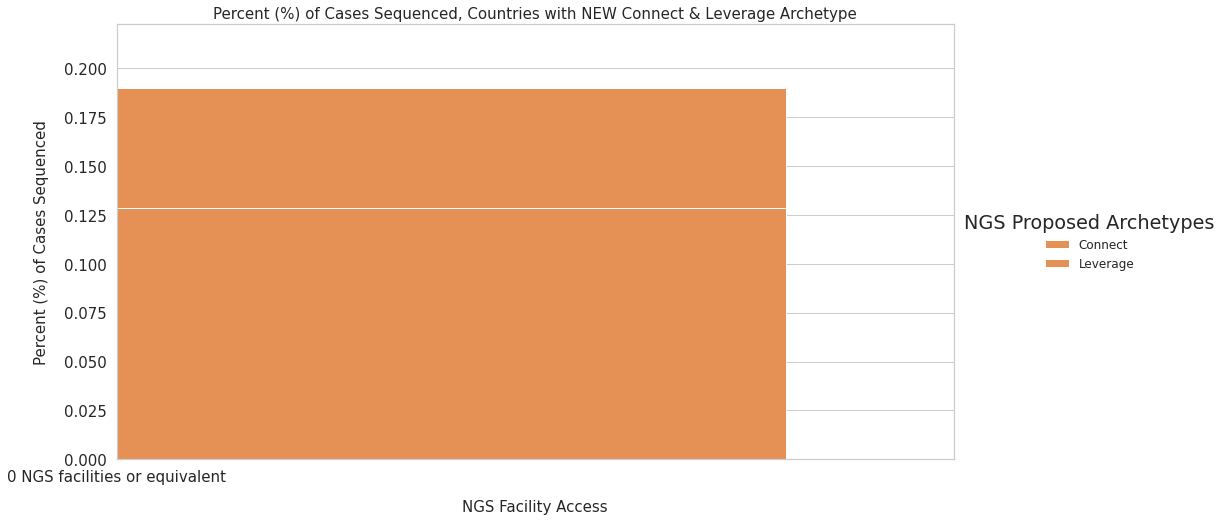

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced, Countries with NEW Connect & Leverage Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(15, 8))

#plotting inaccesible hospitals
sns.barplot(x="sequencing_capacity_clean", 
            y="cases_sequenced", hue = 'NGS_Proposed_1', ci = None,
            data=NGS_Proposed_Leverage, palette = 'Oranges')

sns.barplot(x="sequencing_capacity_clean", 
            y="cases_sequenced", hue = 'NGS_Proposed_1', ci = None,
            data=NGS_Proposed_Connect, palette = 'Oranges')

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel("NGS Facility Access", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent (%) of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

In [ ]:

#sort values for visualizing 
NGS_Proposed_Improve.sort_values(by='cases_sequenced', ascending=False, inplace=True)
NGS_Proposed_Improve.head(11)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,code,cases_truncated,all_new_tests,cum_TPR,country_x,old_archetype,SES,cap_new_tests,country_y,pop_100k,sequ_sum,cum_sequences_pop_100k,cases_sequenced,CutOff_1,CutOff_2,CutOff_3,archetype,who_testing_capacity,max_new_tests_cap_avg,sequencing_capacity_clean,NGS_Proposed_1,NGS_Proposed_2
33,GAB,32100.0,1115373.0,0.028780,Gabon,Leverage,LMIC,1.372784,Gabon,22.26,164,7.367475,0.496443,Other,Other,Other,Leverage,1 - Reliable,196.15,1-3 NGS facilities or equivalent,Leverage,Improve
71,PHL,2373589.0,18829597.0,0.126056,Philippines,Sustain,LMIC,0.470774,Philippines,1095.81,11613,10.597640,0.487458,Other,Other,Other,Strengthen,1 - Reliable,72.12,1-3 NGS facilities or equivalent,Leverage,Improve
75,RWA,104139.0,3246176.0,0.032081,Rwanda,Leverage,LMIC,0.686661,Rwanda,129.52,471,3.636504,0.439329,Other,Other,Other,Leverage,1 - Reliable,118.94,0 NGS facilities or equivalent,Connect,Improve
47,JAM,79710.0,560723.0,0.142156,Jamaica,Connect,LMIC,0.527492,Jamaica,29.61,361,12.191827,0.434270,Other,Other,Other,Connect,1 - Reliable,82.90,0 NGS facilities or equivalent,Connect,Improve
79,SLV,75527.0,1003939.0,0.075231,El Salvador,Leverage,LMIC,0.424070,El Salvador,64.86,299,4.609929,0.398794,Other,Other,Other,Leverage,0 - Unreliable,337.26,1-3 NGS facilities or equivalent,Leverage,Improve
59,MKD,141985.0,1190487.0,0.119266,North Macedonia,Sustain,LMIC,1.565822,North Macedonia,20.83,556,26.692271,0.388705,Other,Other,Other,Strengthen,1 - Reliable,280.80,1-3 NGS facilities or equivalent,Leverage,Improve
76,SDN,14777.0,406156.0,0.036383,Sudan,Test,LMIC,0.030979,Sudan,438.49,79,0.180164,0.376316,Other,Other,Other,Test,0 - Unreliable,5.39,0 NGS facilities or equivalent,Connect,Improve
44,IND,24598253.0,505310100.0,0.048680,India,Sustain,LMIC,1.003194,India,13800.04,81559,5.910055,0.330714,Other,Other,Other,Strengthen,1 - Reliable,161.31,4+ NGS facilities or equivalent,Leverage,Improve
43,IDN,3512613.0,58315883.0,0.060234,Indonesia,Sustain,LMIC,0.584115,Indonesia,2735.24,11109,4.061435,0.318161,Other,Other,Other,Strengthen,1 - Reliable,98.20,4+ NGS facilities or equivalent,Leverage,Improve
60,MLI,14196.0,393122.0,0.036111,Mali,Leverage,LMIC,0.053185,Mali,202.51,46,0.227149,0.304172,Other,Other,Other,Leverage,1 - Reliable,7.03,1-3 NGS facilities or equivalent,Leverage,Improve


In [ ]:
Top_Ten_Proposed_Improve = NGS_Proposed_Improve.loc[(NGS_Proposed_Improve['cases_sequenced'] >= 0.31)]
Top_Ten_Proposed_Improve.code.nunique()

9

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]),
 <a list of 7 Text major ticklabel objects>)

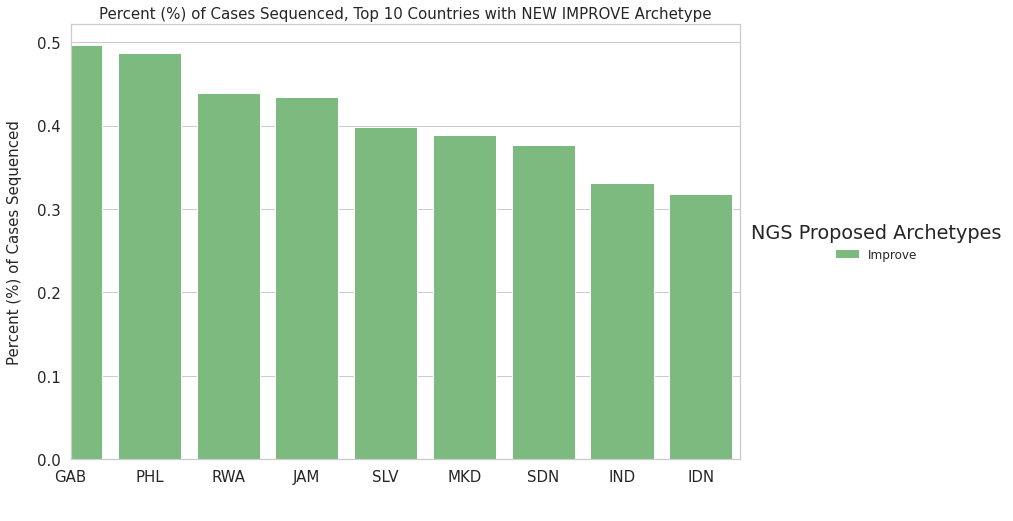

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Percent (%) of Cases Sequenced, Top 10 Countries with NEW IMPROVE Archetype"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(12, 8))

#plotting inaccesible hospitals

sns.barplot(x="code", 
            y="cases_sequenced", hue = 'NGS_Proposed_2', ci = None,
            data=Top_Ten_Proposed_Improve, palette = 'Greens')

#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="NGS Proposed Archetypes", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel(" ", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Percent (%) of Cases Sequenced", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

# **Phase 6: Descriptive Stats (Global Health Security Index metrics)**

## Import & Clean Data

In [ ]:
#import FIND diagnostic data (exported from github) 
GHI_data_PPI_github = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/NGS_EDA/Copy%20of%202021%20GHS%20Index%20Data_FINAL.csv"
GHI_data = pd.read_csv (GHI_data_PPI_github)
GHI_data.tail(3)

HTTPError: ignored

In [ ]:
#how many & which countries are represented here?
print ("Columns:", GHI_data.columns.nunique())
print ("Columns:", GHI_data.columns.unique())
print (GHI_data.dtypes)

NameError: ignored

In [ ]:
#only keeping necessary variables
GHI_df = GHI_data[[
                   "Country", 'Year', 'ISO3', 'WB Income',
                   'JHU Total confirmed cases of COVID-19 per million people',
                   'JHU Total confirmed deaths due to COVID-19 per million people',
                   "2) EARLY DETECTION & REPORTING EPIDEMICS OF POTENTIAL INTERNATIONAL CONCERN",
                   '2.1) Laboratory systems strength and quality', 
                   '2.1.1) Lab capacity for detecting priority diseases', 
                   '2.2) Laboratory supply chains', 
                   '2.3) Real time surveillance and reporting',
                   '3.1) Emergency preparedness and response planning',
                   '3.1.1c) Vulnerable populations in national public health emergency response plan',
                   '3.6.1a) Percentage of households with Internet',
                   '3.6.2a) Mobile-cellular telephone subscriptions per 100 inhabitants',
                   '4.1.1a) Doctors per 100,000 people',
                   '4.1.2a) Hospital beds per 100,000 people',
                   '5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years',
                   '6.4.1a) Urban population (% of total population)',
                   '6.5.1) Access to quality healthcare',
                   '6.5.1a) Total life expectancy (years)',
                   '6.5.2) Access to potable water and sanitation',
                   'BG2) GDP per capita (US$)',
                   'BG3) Population (m)',
                   'BG7) Global Peace Index'

                   ]]
GHI_df.rename (columns = {'ISO3': 'code'}, inplace = True)
print (GHI_df.columns.nunique())
GHI_df.columns.unique()

In [ ]:
GHI_df = GHI_df.loc[(GHI_df['Year'] == 2021.0)]
print (GHI_df.shape)
GHI_df.head()

## Import and Clean NGS Archetypes Data

In [ ]:
LMIC_Archetypes.columns.unique()

In [ ]:
LMIC_Descriptive_Stats = LMIC_Archetypes [[
                                           'code', 'country', 'SES', 'pop_100k',
                                           'old_archetype', 'NGS_Proposed_2',
                                           'cum_sequences_pop_100k', 'cases_sequenced', 
]]
print (LMIC_Descriptive_Stats.columns.unique())

In [ ]:
LMIC_Descriptive_Stats.head()

In [ ]:
LMIC_Descriptive_Stats.shape

In [ ]:
GHI_df.shape

##Merge NGS proposed archetyps & GHIS data

In [ ]:
#merge both sequencing datasets together
LMIC_Stats = LMIC_Descriptive_Stats.merge(GHI_df, how = 'left', on=['code'])
print (LMIC_Stats.columns.unique())
LMIC_Stats.head()

## Merge NGS old archetypes & GHIS data

In [ ]:
LMIC_Archetypes.head(1)

In [ ]:
#merge both sequencing datasets together
NGS_OG_GHI = LMIC_Archetypes.merge(GHI_df, how = 'left', on=['code'])
print (NGS_OG_GHI.columns.unique())
NGS_OG_GHI.head()

## Subset new archetypes by archetype

In [ ]:
LMIC_Stats_Test = LMIC_Stats.loc[(LMIC_Stats['NGS_Proposed_2'] == 'Test')]
print (LMIC_Stats_Test.shape)
LMIC_Stats_Test.head()

In [ ]:
LMIC_Stats_Sustain = LMIC_Stats.loc[(LMIC_Stats['NGS_Proposed_2'] == 'Sustain')]
print (LMIC_Stats_Sustain.shape)
LMIC_Stats_Sustain.head()

In [ ]:
LMIC_Stats_Improve = LMIC_Stats.loc[(LMIC_Stats['NGS_Proposed_2'] == 'Improve')]
print (LMIC_Stats_Improve.shape)
LMIC_Stats_Improve.head()

## Subset old archetypes be archetype

In [ ]:
Test_OG_GHI = NGS_OG_GHI.loc[(NGS_OG_GHI['NGS_Proposed_1'] == 'Test')]
Test_OG_GHI.code.nunique()

In [ ]:
Stregnthen_OG_GHI = NGS_OG_GHI.loc[(NGS_OG_GHI['NGS_Proposed_1'] == 'Strengthen')]
Stregnthen_OG_GHI.code.nunique()

In [ ]:
Connect_OG_GHI = NGS_OG_GHI.loc[(NGS_OG_GHI['NGS_Proposed_1'] == 'Connect')]
Connect_OG_GHI.code.nunique()

In [ ]:
Leverage_OG_GHI = NGS_OG_GHI.loc[(NGS_OG_GHI['NGS_Proposed_1'] == 'Leverage')]
Leverage_OG_GHI.code.nunique()

## Assess Categorical Stats for Proposed Archetype



In [ ]:
print (LMIC_Stats_Test['WB Income'].value_counts())

print (LMIC_Stats_Test['WB Income'].value_counts(normalize=True) * 100)


In [ ]:
print (LMIC_Stats_Sustain['WB Income'].value_counts())

print (LMIC_Stats_Sustain['WB Income'].value_counts(normalize=True) * 100)


In [ ]:
print (LMIC_Stats_Improve['WB Income'].value_counts())

print (LMIC_Stats_Improve['WB Income'].value_counts(normalize=True) * 100)


In [ ]:
print (LMIC_Stats_Test['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (LMIC_Stats_Test['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


In [ ]:
print (LMIC_Stats_Sustain['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (LMIC_Stats_Sustain['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)

In [ ]:
print (LMIC_Stats_Improve['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (LMIC_Stats_Improve['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


## Assess Categorical Stats for OLD Archetype

In [ ]:
print (Test_OG_GHI['WB Income'].value_counts())

print (Test_OG_GHI['WB Income'].value_counts(normalize=True) * 100)

In [ ]:
print (Connect_OG_GHI['WB Income'].value_counts())

print (Connect_OG_GHI['WB Income'].value_counts(normalize=True) * 100)

In [ ]:
print (Leverage_OG_GHI['WB Income'].value_counts())

print (Leverage_OG_GHI['WB Income'].value_counts(normalize=True) * 100)

In [ ]:
print (Stregnthen_OG_GHI['WB Income'].value_counts())

print (Stregnthen_OG_GHI['WB Income'].value_counts(normalize=True) * 100)

In [ ]:
print (Test_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (Test_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


In [ ]:
print (Connect_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (Connect_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


In [ ]:
print (Leverage_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (Leverage_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


In [ ]:
print (Stregnthen_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts())

print (Stregnthen_OG_GHI['5.5.4c) Evidence that the country has fulfilled its full WHO contribution within the past two years'].value_counts(normalize=True) * 100)


## Assess Numerical Stats for NEW Archetype

In [ ]:
#Aggregate across 12 months and calculate median
LMIC_New_Grouped_Archetypes = LMIC_Stats.groupby(['NGS_Proposed_2'])[
                                                                      'BG2) GDP per capita (US$)', 'pop_100k', '6.5.1a) Total life expectancy (years)',
                                                                      '6.4.1a) Urban population (% of total population)',
                                                                      '6.5.1) Access to quality healthcare', '2.3) Real time surveillance and reporting',
                                                                      '2.1.1) Lab capacity for detecting priority diseases', '2.1) Laboratory systems strength and quality',
                                                                      'cum_sequences_pop_100k'
                                                                      ].mean().reset_index()
LMIC_New_Grouped_Archetypes.head()

## Assess Numerical Stats for OLD Archetype

In [ ]:
#Aggregate across 12 months and calculate median
NGS_OLD_Grouped_Archetypes = NGS_OG_GHI.groupby(['NGS_Proposed_1'])[
                                                                      'BG2) GDP per capita (US$)', 'pop_100k', '6.5.1a) Total life expectancy (years)',
                                                                      '6.4.1a) Urban population (% of total population)',
                                                                      '6.5.1) Access to quality healthcare', '2.3) Real time surveillance and reporting',
                                                                      '2.1.1) Lab capacity for detecting priority diseases', '2.1) Laboratory systems strength and quality',
                                                                      'cum_sequences_pop_100k'
                                                                      ].mean().reset_index()
NGS_OLD_Grouped_Archetypes.head()

# **Phase 7: Adding new categories for NGS Webpage Visuals**

In [ ]:
#import FIND diagnostic data (exported from github) 
NGS_final_data_PPI_github = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/find_map.csv"
NGS_Final_data = pd.read_csv (NGS_final_data_PPI_github)
NGS_Final_data.head(3)

,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,4+ NGS facilities or equivalent,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,1-3 NGS facilities or equivalent,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons
2,"{""type"":""MultiPolygon"",""coordinates"":[[[[-69.5...",CHL,Chile,19212362.0,4+ NGS facilities or equivalent,0.057206,2.995401,Reliable testing capacity,2022-01-04,0.0,1.40,87.001,sufficient sequencing,54.9,High Income*,High Income*,Strengthen,High Income*,High Income*,High Income*,Strengthen - Build additional NGS capacity for...,5.7 %,3 per 1000 persons,1.4 %,87 per 100k persons,54.9 per 100k persons


In [ ]:
#delete NaN's for codes
NGS_Final_data.shape

(274, 26)

In [ ]:
#delete NaN's for codes
NGS_sub = NGS_Final_data.dropna(subset=['code'])
NGS_sub.shape

(253, 26)

In [ ]:
print (NGS_Final_data['archetype_orig_w_HICs'].value_counts())

print (NGS_Final_data['archetype_orig_w_HICs'].value_counts(normalize=True) * 100)

Insufficient Data    86
Strengthen           83
Leverage             29
Test                 27
Connect              19
Name: archetype_orig_w_HICs, dtype: int64
Insufficient Data    35.245902
Strengthen           34.016393
Leverage             11.885246
Test                 11.065574
Connect               7.786885
Name: archetype_orig_w_HICs, dtype: float64


In [ ]:
print (NGS_Final_data['archetype_orig'].value_counts())

print (NGS_Final_data['archetype_orig'].value_counts(normalize=True) * 100)

High Income*         88
Insufficient Data    56
Strengthen           35
Test                 26
Leverage             21
Connect              18
Name: archetype_orig, dtype: int64
High Income*         36.065574
Insufficient Data    22.950820
Strengthen           14.344262
Test                 10.655738
Leverage              8.606557
Connect               7.377049
Name: archetype_orig, dtype: float64


In [ ]:
#Visualize those that are Testing Enough

def num (x):
    if x == "High Income*":
      return 'High Income*'

    elif x == "Insufficient Data":
      return 'Missing key diagnostic or case metrics'

    elif x == "Test":
        return 'Unreliable COVID-19 Testing Capacity'

    elif x != "Test":
      return 'Reliable COVID-19 Testing Capacity'
  
NGS_Final_data['testing_capacity'] = NGS_Final_data['archetype_orig'].apply(lambda x : num (x))

NGS_Final_data.loc[NGS_Final_data['Archetype'].isnull(), 'testing_capacity'] = np.nan

print (NGS_Final_data.code.nunique())
print (NGS_Final_data.testing_capacity.unique())
NGS_Final_data.head(2)

235
['Reliable COVID-19 Testing Capacity'
 'Missing key diagnostic or case metrics' 'High Income*'
 'Unreliable COVID-19 Testing Capacity' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,4+ NGS facilities or equivalent,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,1-3 NGS facilities or equivalent,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics


In [ ]:
#Visualize those that are Testing Enough

def num (x):
    if x == "High Income*":
      return 'High Income*'

    elif x == "Insufficient Data":
      return 'Insufficient Data'

    elif x == "Test":
        return 'Unreliable COVID-19 Testing Capacity'

    elif x != "Test":
      return 'Reliable COVID-19 Testing Capacity'
  
NGS_Final_data['testing_legend'] = NGS_Final_data['archetype_orig'].apply(lambda x : num (x))

NGS_Final_data.loc[NGS_Final_data['Archetype'].isnull(), 'testing_legend'] = np.nan

print (NGS_Final_data.code.nunique())
print (NGS_Final_data.testing_capacity.unique())
NGS_Final_data.head(2)

235
['Reliable COVID-19 Testing Capacity'
 'Missing key diagnostic or case metrics' 'High Income*'
 'Unreliable COVID-19 Testing Capacity' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,4+ NGS facilities or equivalent,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,1-3 NGS facilities or equivalent,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_Final_data['archetype_orig'] == "High Income*"),
    (NGS_Final_data['archetype_orig'] == "Insufficient Data"),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] == 0),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] < 1),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] >= 1)
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Missing key diagnostic or case metrics', '0% Cases Sequenced', 'Less than 1% Cases Sequenced', '1% or More Cases Sequenced']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_Final_data['sequencing_capacity'] = np.select(Threshold_Classification, values)
NGS_Final_data.loc[NGS_Final_data['Archetype'].isnull(), 'sequencing_capacity'] = np.nan

print (NGS_Final_data.code.nunique())
print (NGS_Final_data.sequencing_capacity.unique())
NGS_Final_data.head(2)

235
['Less than 1% Cases Sequenced' 'Missing key diagnostic or case metrics'
 'High Income*' '1% or More Cases Sequenced' '0% Cases Sequenced' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_Final_data['archetype_orig'] == "High Income*"),
    (NGS_Final_data['archetype_orig'] == "Insufficient Data"),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] == 0),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] < 1),
    (NGS_Final_data['pct_cases_sequenced_in_last_year'] >= 1)
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Insufficient Data', '0% Cases Sequenced', 'Less than 1% Cases Sequenced', '1% or More Cases Sequenced']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_Final_data['sequencing_legend'] = np.select(Threshold_Classification, values)
NGS_Final_data.loc[NGS_Final_data['Archetype'].isnull(), 'sequencing_legend'] = np.nan

print (NGS_Final_data.code.nunique())
print (NGS_Final_data.sequencing_capacity.unique())
NGS_Final_data.head(2)

235
['Less than 1% Cases Sequenced' 'Missing key diagnostic or case metrics'
 'High Income*' '1% or More Cases Sequenced' '0% Cases Sequenced' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data


In [ ]:
NGS_Final_data.tail()

,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend
269,"{""type"":""MultiPolygon"",""coordinates"":[[[[96.18...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
270,"{""type"":""MultiPolygon"",""coordinates"":[[[[78.78...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
271,"{""type"":""MultiPolygon"",""coordinates"":[[[[76.55...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
272,"{""type"":""MultiPolygon"",""coordinates"":[[[[78.98...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
273,"{""type"":""Polygon"",""coordinates"":[[[126.644956,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#only keeping necessary variables
Facility_df = LMIC_Archetypes[["code", 'sequencing_capacity_clean']]
Facility_df.head()

,code,sequencing_capacity_clean
0,AFG,0 NGS facilities or equivalent
1,AGO,0 NGS facilities or equivalent
2,ALB,0 NGS facilities or equivalent
3,ARG,4+ NGS facilities or equivalent
4,ARM,0 NGS facilities or equivalent


In [ ]:
NGS_df = pd.merge(NGS_Final_data, Facility_df, how = 'left', on=["code"])
NGS_df.rename (columns = {'sequencing_capacity_clean': 'facility_cat'}, inplace = True)
NGS_df.head()

,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend,facility_cat
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,NaN
2,"{""type"":""MultiPolygon"",""coordinates"":[[[[-69.5...",CHL,Chile,19212362.0,High Income*,0.057206,2.995401,Reliable testing capacity,2022-01-04,0.0,1.40,87.001,sufficient sequencing,54.9,High Income*,High Income*,Strengthen,High Income*,High Income*,High Income*,Strengthen - Build additional NGS capacity for...,5.7 %,3 per 1000 persons,1.4 %,87 per 100k persons,54.9 per 100k persons,High Income*,High Income*,High Income*,NaN
3,"{""type"":""Polygon"",""coordinates"":[[[-67.193904,...",BOL,Bolivia,11832936.0,Less than 1% Cases Sequenced,0.168841,0.617169,Unreliable testing capacity,2022-01-02,2.0,0.01,0.507,insufficient sequencing,351.7,Connect,Test,Test,Test,Test - Increase diagnostic testing capacity,Test - Increase diagnostic testing capacity,Test - Increase diagnostic testing capacity,16.9 %,0.62 per 1000 persons,0.01 %,0.5 per 100k persons,351.7 per 100k persons,Unreliable COVID-19 Testing Capacity,Unreliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,0 NGS facilities or equivalent
4,"{""type"":""MultiPolygon"",""coordinates"":[[[[-69.5...",PER,Peru,33359415.0,Less than 1% Cases Sequenced,0.077390,1.379319,Reliable testing capacity,2021-12-17,18.0,0.88,33.876,sufficient sequencing,79.1,Strengthen,Strengthen,Strengthen,Sustain,Strengthen - Build additional NGS capacity for...,Sustain - Sustain diagnostic & sequencing levels,Strengthen - Build additional NGS capacity for...,7.7 %,1.38 per 1000 persons,0.88 %,33.9 per 100k persons,79.1 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_df['archetype_orig'] == 'High Income*'),
    (NGS_df['archetype_orig'] == 'Insufficient Data'),                        
    (NGS_df['facility_cat'] == '0 NGS facilities or equivalent'),
    (NGS_df['facility_cat'] == '1-3 NGS facilities or equivalent'),
    (NGS_df['facility_cat'] == '4+ NGS facilities or equivalent')
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Missing key diagnostic or case metrics', '0 NGS facilities or equivalent', '1-3 NGS facilities or equivalent', '4+ NGS facilities or equivalent']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_df['facility_capacity'] = np.select(Threshold_Classification, values)
NGS_df.loc[NGS_df['Archetype'].isnull(), 'facility_capacity'] = np.nan

print (NGS_df.code.nunique())
print (NGS_df.facility_capacity.unique())
NGS_df.head(2)

235
['4+ NGS facilities or equivalent'
 'Missing key diagnostic or case metrics' 'High Income*'
 '0 NGS facilities or equivalent' '1-3 NGS facilities or equivalent' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend,facility_cat,facility_capacity
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,NaN,Missing key diagnostic or case metrics


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_df['archetype_orig'] == 'High Income*'),
    (NGS_df['archetype_orig'] == 'Insufficient Data'),                        
    (NGS_df['facility_cat'] == '0 NGS facilities or equivalent'),
    (NGS_df['facility_cat'] == '1-3 NGS facilities or equivalent'),
    (NGS_df['facility_cat'] == '4+ NGS facilities or equivalent')
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Insufficient Data', '0 NGS facilities or equivalent', '1-3 NGS facilities or equivalent', '4+ NGS facilities or equivalent']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_df['facility_legend'] = np.select(Threshold_Classification, values)
NGS_df.loc[NGS_df['Archetype'].isnull(), 'facility_legend'] = np.nan

print (NGS_df.code.nunique())
print (NGS_df.facility_capacity.unique())
NGS_df.head(2)

235
['4+ NGS facilities or equivalent'
 'Missing key diagnostic or case metrics' 'High Income*'
 '0 NGS facilities or equivalent' '1-3 NGS facilities or equivalent' nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend,facility_cat,facility_capacity,facility_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,NaN,Missing key diagnostic or case metrics,Insufficient Data


In [ ]:
NGS_df.describe()

,population_size,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,cases_per_100k_last_7_days
count,2.300000e+02,182.000000,182.000000,190.000000,220.000,217.000000,230.000000
mean,-inf,0.095926,3.185179,53.210526,inf,196.182470,390.910870
std,NaN,0.088368,6.438686,111.861251,NaN,667.711435,732.317668
min,-inf,0.000000,0.013066,0.000000,0.000,0.000000,0.000000
25%,6.407082e+05,0.044837,0.239442,0.000000,0.100,0.764000,4.925000
50%,5.735160e+06,0.074481,1.091422,2.500000,0.590,9.042000,67.450000
75%,2.133675e+07,0.136611,3.023185,21.000000,2.155,93.123000,391.300000
max,1.444216e+09,0.851619,45.628459,645.000000,inf,7022.647000,4382.700000


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_df['archetype_orig'] == 'High Income*'), 
    (NGS_df['archetype_orig'] == 'Insufficient Data'),                          
    (NGS_df['Days since tests were reported'] == 0),
    (NGS_df['Days since tests were reported'] <= 3 ),
    (NGS_df['Days since tests were reported'] > 3)
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Missing key diagnostic or case metrics', '0 days delayed reporting', '1-3 days delayed reporting', '4+ days delayed reporting']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_df['reporting_capacity'] = np.select(Threshold_Classification, values)
NGS_df.loc[NGS_df['Archetype'].isnull(), 'reporting_capacity'] = np.nan

print (NGS_df.code.nunique())
print (NGS_df.reporting_capacity.unique())
NGS_df.head(2)

235
['0 days delayed reporting' 'Missing key diagnostic or case metrics'
 'High Income*' '1-3 days delayed reporting' '4+ days delayed reporting'
 nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend,facility_cat,facility_capacity,facility_legend,reporting_capacity
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent,0 days delayed reporting
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,NaN,Missing key diagnostic or case metrics,Insufficient Data,Missing key diagnostic or case metrics


In [ ]:
# create a list of our conditions
Threshold_Classification = [
    (NGS_df['archetype_orig'] == 'High Income*'), 
    (NGS_df['archetype_orig'] == 'Insufficient Data'),                          
    (NGS_df['Days since tests were reported'] == 0),
    (NGS_df['Days since tests were reported'] <= 3 ),
    (NGS_df['Days since tests were reported'] > 3)
]

                                                                                                                                                                  

# create a list of the values we want to assign for each condition
values = ['High Income*', 'Insufficient Data', '0 days delayed reporting', '1-3 days delayed reporting', '4+ days delayed reporting']

#create a new column and use np.select to assign values to it using our lists as arguments
NGS_df['reporting_legend'] = np.select(Threshold_Classification, values)
NGS_df.loc[NGS_df['Archetype'].isnull(), 'reporting_legend'] = np.nan

print (NGS_df.code.nunique())
print (NGS_df.reporting_capacity.unique())
NGS_df.head(2)

235
['0 days delayed reporting' 'Missing key diagnostic or case metrics'
 'High Income*' '1-3 days delayed reporting' '4+ days delayed reporting'
 nan]


,geometry,code,name,population_size,sequencing_capacity,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,testing_capacity,testing_legend,sequencing_legend,facility_cat,facility_capacity,facility_legend,reporting_capacity,reporting_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,Less than 1% Cases Sequenced,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Reliable COVID-19 Testing Capacity,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent,4+ NGS facilities or equivalent,0 days delayed reporting,0 days delayed reporting
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,Missing key diagnostic or case metrics,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,NaN,Missing key diagnostic or case metrics,Insufficient Data,Missing key diagnostic or case metrics,Insufficient Data


In [ ]:
NGS_updated_df = NGS_df[["geometry", 'code', 'name', 'population_size', 
                 'tpr_year_smoothed_truncated', 'avg_daily_tests_per_1000_last_year_smoothed', 'dx_testing_capacity',
                 'Date tests last reported', 'Days since tests were reported', 
                 'pct_cases_sequenced_in_last_year', 'sequences_per_100k_last_year', 'sars_cov_2_sequencing', 'cases_per_100k_last_7_days',
                 'old_archetype', 'archetype_orig', 'archetype_orig_w_HICs', 'archetype_new', 'Archetype', 'archetype_full_new', 'Archetype*',
                 'Test positivity rate (%) in past year', 'Average daily tests in past year',
                 '% of cases sequenced in past year', 'Number of sequences in past year', 'Cases in the last 7 days',
                 'reporting_capacity', 'testing_capacity', 'sequencing_capacity', 'facility_capacity',
                 'reporting_legend', 'testing_legend', 'sequencing_legend', 'facility_legend']]
NGS_updated_df.head()

,geometry,code,name,population_size,tpr_year_smoothed_truncated,avg_daily_tests_per_1000_last_year_smoothed,dx_testing_capacity,Date tests last reported,Days since tests were reported,pct_cases_sequenced_in_last_year,sequences_per_100k_last_year,sars_cov_2_sequencing,cases_per_100k_last_7_days,old_archetype,archetype_orig,archetype_orig_w_HICs,archetype_new,Archetype,archetype_full_new,Archetype*,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,reporting_capacity,testing_capacity,sequencing_capacity,facility_capacity,reporting_legend,testing_legend,sequencing_legend,facility_legend
0,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.7...",IDN,Indonesia,276361788.0,0.060234,0.584115,Reliable testing capacity,2022-01-04,0.0,0.32,4.067,insufficient sequencing,0.6,Strengthen,Leverage,Leverage,Sequence,Leverage - Leverage existing NGS capacity,Sequence - Improve sequencing levels,Leverage - Leverage existing NGS capacity,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,0 days delayed reporting,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,0 days delayed reporting,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent
1,"{""type"":""MultiPolygon"",""coordinates"":[[[[117.9...",MYS,Malaysia,32776195.0,0.060074,1.731249,Insufficient data,2021-06-16,202.0,0.26,21.418,insufficient sequencing,70.3,Strengthen,Insufficient Data,Insufficient Data,Insufficient Data,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Missing key diagnostic or case metrics,Insufficient Data,Insufficient Data,Insufficient Data,Insufficient Data
2,"{""type"":""MultiPolygon"",""coordinates"":[[[[-69.5...",CHL,Chile,19212362.0,0.057206,2.995401,Reliable testing capacity,2022-01-04,0.0,1.40,87.001,sufficient sequencing,54.9,High Income*,High Income*,Strengthen,High Income*,High Income*,High Income*,Strengthen - Build additional NGS capacity for...,5.7 %,3 per 1000 persons,1.4 %,87 per 100k persons,54.9 per 100k persons,High Income*,High Income*,High Income*,High Income*,High Income*,High Income*,High Income*,High Income*
3,"{""type"":""Polygon"",""coordinates"":[[[-67.193904,...",BOL,Bolivia,11832936.0,0.168841,0.617169,Unreliable testing capacity,2022-01-02,2.0,0.01,0.507,insufficient sequencing,351.7,Connect,Test,Test,Test,Test - Increase diagnostic testing capacity,Test - Increase diagnostic testing capacity,Test - Increase diagnostic testing capacity,16.9 %,0.62 per 1000 persons,0.01 %,0.5 per 100k persons,351.7 per 100k persons,1-3 days delayed reporting,Unreliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,0 NGS facilities or equivalent,1-3 days delayed reporting,Unreliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,0 NGS facilities or equivalent
4,"{""type"":""MultiPolygon"",""coordinates"":[[[[-69.5...",PER,Peru,33359415.0,0.077390,1.379319,Reliable testing capacity,2021-12-17,18.0,0.88,33.876,sufficient sequencing,79.1,Strengthen,Strengthen,Strengthen,Sustain,Strengthen - Build additional NGS capacity for...,Sustain - Sustain diagnostic & sequencing levels,Strengthen - Build additional NGS capacity for...,7.7 %,1.38 per 1000 persons,0.88 %,33.9 per 100k persons,79.1 per 100k persons,4+ days delayed reporting,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent,4+ days delayed reporting,Reliable COVID-19 Testing Capacity,Less than 1% Cases Sequenced,4+ NGS facilities or equivalent


In [ ]:
#export df

from google.colab import files
NGS_updated_df.to_csv(r'C:\Users\bthrift\Downloads\NGS_updated_df.csv') 
files.download(r'C:\Users\bthrift\Downloads\NGS_updated_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Pulling out columns of focus for table
NGS_updated_df_tables = NGS_df[['name', 'Days since tests were reported',
                                'Test positivity rate (%) in past year', 'Average daily tests in past year',
                                '% of cases sequenced in past year', 'Number of sequences in past year', 
                                'Cases in the last 7 days','Archetype'
                 ]]
#renaming columns
NGS_updated_df_tables.rename (columns = {'name': 'Country'}, inplace = True)
NGS_updated_df_tables.rename (columns = {'Days since tests were reported': 'Number of Days since tests were last reported'}, inplace = True)
#df head
NGS_updated_df_tables.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country,Number of Days since tests were last reported,Test positivity rate (%) in past year,Average daily tests in past year,% of cases sequenced in past year,Number of sequences in past year,Cases in the last 7 days,Archetype
0,Indonesia,0.0,6 %,0.58 per 1000 persons,0.32 %,4.1 per 100k persons,0.6 per 100k persons,Leverage - Leverage existing NGS capacity
1,Malaysia,202.0,6 %,1.73 per 1000 persons,0.26 %,21.4 per 100k persons,70.3 per 100k persons,Missing key diagnostic or case metrics
2,Chile,0.0,5.7 %,3 per 1000 persons,1.4 %,87 per 100k persons,54.9 per 100k persons,High Income*
3,Bolivia,2.0,16.9 %,0.62 per 1000 persons,0.01 %,0.5 per 100k persons,351.7 per 100k persons,Test - Increase diagnostic testing capacity
4,Peru,18.0,7.7 %,1.38 per 1000 persons,0.88 %,33.9 per 100k persons,79.1 per 100k persons,Strengthen - Build additional NGS capacity for...


In [ ]:
#export df

from google.colab import files
NGS_updated_df_tables.to_csv(r'C:\Users\bthrift\Downloads\NGS_updated_df_tables.csv') 
files.download(r'C:\Users\bthrift\Downloads\NGS_updated_df_tables.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Phase 7: WHO Facility data validation**

In [ ]:
#import FIND diagnostic data (exported from github) 
WHO_GISAID_data_PPI_github = "https://raw.githubusercontent.com/PandemicPreventionInstitute/NGS-Capacity-map/main/data/subm_lab_counts.csv"
WHO_GISAID_data = pd.read_csv (WHO_GISAID_data_PPI_github)
WHO_GISAID_data.head(3)

,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity
0,Algeria,1.0,Algeria,DZA,Africa,0 - No NGS facilities
1,NaN,0.0,Equatorial Guinea,GNQ,Africa,0 - No NGS facilities
2,NaN,0.0,Eritrea,ERI,Africa,0 - No NGS facilities


In [ ]:
WHO_GISAID_data.dtypes

GISAID_country       object
subm_lab_count      float64
WHO_country          object
WHO_country_code     object
WHO_region           object
NGS_capacity         object
dtype: object

In [ ]:
WHO_GISAID_data.describe()

,subm_lab_count
count,220.000000
mean,4.486364
std,15.366298
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,199.000000


In [ ]:
print (WHO_GISAID_data.shape)
print (WHO_GISAID_data.GISAID_country.nunique())

(220, 6)
118


In [ ]:
sum_country_missing = WHO_GISAID_data["GISAID_country"].isna().sum()
print (sum_country_missing)

102


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x < 1.0 :
        return '0 - No NGS facilities' 
    elif 1.0 <= x <= 3.0:
        return '1-3 NGS facilities'
    elif 3.0 < x :
        return '>3 NGS facilities'
  
WHO_GISAID_data['GISAID_Lab_cat'] = WHO_GISAID_data['subm_lab_count'].apply(lambda x : num (x))
WHO_GISAID_data.head()

print (WHO_GISAID_data.GISAID_country.nunique())
WHO_GISAID_data.tail(12)

118


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat
208,Lebanon,3.0,Lebanon,LBN,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,1-3 NGS facilities
209,Luxembourg,1.0,Luxembourg,LUX,Europe,2 - >3 NGS facilities or equivalent,1-3 NGS facilities
210,Mexico,17.0,Mexico,MEX,Americas,2 - >3 NGS facilities or equivalent,>3 NGS facilities
211,Morocco,4.0,Morocco,MAR,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,>3 NGS facilities
212,Netherlands,8.0,Netherlands,NLD,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities
213,New Zealand,1.0,New Zealand,NZL,Western Pacific,2 - >3 NGS facilities or equivalent,1-3 NGS facilities
214,Nigeria,2.0,Nigeria,NGA,Africa,2 - >3 NGS facilities or equivalent,1-3 NGS facilities
215,Greece,9.0,Greece,GRC,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities
216,United Arab Emirates,5.0,United Arab Emirates,ARE,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,>3 NGS facilities
217,French Guiana,1.0,NaN,NaN,NaN,NaN,1-3 NGS facilities


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x < 1.0 :
        return '0 - No NGS facilities' 
    elif 1.0 <= x <= 3.0:
        return '1-3 NGS facilities'
    elif 4.0 <= x <= 6.0 :
        return '4-6 NGS facilities'
    elif 7.0 <= x <= 9.0:
        return '7-9 NGS facilities'
    elif 10.0 <= x <= 12.0:
        return ' 9-11 NGS facilities'
    elif x > 12.0:
        return '12+ NGS facilities'
  
WHO_GISAID_data['GISAID_Lab_Groups'] = WHO_GISAID_data['subm_lab_count'].apply(lambda x : num (x))
WHO_GISAID_data.head()

print (WHO_GISAID_data.GISAID_country.nunique())
WHO_GISAID_data.tail(12)

118


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups
208,Lebanon,3.0,Lebanon,LBN,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities
209,Luxembourg,1.0,Luxembourg,LUX,Europe,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities
210,Mexico,17.0,Mexico,MEX,Americas,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities
211,Morocco,4.0,Morocco,MAR,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,>3 NGS facilities,4-6 NGS facilities
212,Netherlands,8.0,Netherlands,NLD,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,7-9 NGS facilities
213,New Zealand,1.0,New Zealand,NZL,Western Pacific,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities
214,Nigeria,2.0,Nigeria,NGA,Africa,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities
215,Greece,9.0,Greece,GRC,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,7-9 NGS facilities
216,United Arab Emirates,5.0,United Arab Emirates,ARE,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,>3 NGS facilities,4-6 NGS facilities
217,French Guiana,1.0,NaN,NaN,NaN,NaN,1-3 NGS facilities,1-3 NGS facilities


In [ ]:
print (WHO_GISAID_data.NGS_capacity.nunique())
print (WHO_GISAID_data.GISAID_Lab_cat.nunique())

3
3


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == '0 - No NGS facilities' :
        return '0 - No NGS facilities' 
    elif x == '1 - 1-3 NGS facilities or equivalent':
        return '1-3 NGS facilities'
    elif x == '2 - >3 NGS facilities or equivalent':
        return '>3 NGS facilities'
  
WHO_GISAID_data['WHO_Lab_cat'] = WHO_GISAID_data['NGS_capacity'].apply(lambda x : num (x))
WHO_GISAID_data.head()

print (WHO_GISAID_data.GISAID_country.nunique())
WHO_GISAID_data.head(12)

118


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat
0,Algeria,1.0,Algeria,DZA,Africa,0 - No NGS facilities,1-3 NGS facilities,1-3 NGS facilities,0 - No NGS facilities
1,NaN,0.0,Equatorial Guinea,GNQ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
2,NaN,0.0,Eritrea,ERI,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
3,NaN,0.0,Eswatini,SWZ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
4,NaN,0.0,Ethiopia,ETH,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
5,NaN,0.0,Fiji,FJI,Western Pacific,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
6,NaN,0.0,French Polynesia,PYF,Western Pacific,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
7,NaN,0.0,Gibraltar,GIB,Europe,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
8,NaN,0.0,Greenland,GRL,Europe,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
9,NaN,0.0,Grenada,GRD,Americas,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities


In [ ]:
print (WHO_GISAID_data.WHO_country.nunique())

217


In [ ]:
#groupby country into separate df's and concatenate/stack lab-level data
df_GISAID = WHO_GISAID_data.groupby(['GISAID_Lab_cat'])['WHO_country'].count().reset_index()
df_GISAID.rename (columns = {'GISAID_Lab_cat': 'Lab_level_Data'}, inplace = True)
df_GISAID.rename (columns = {'WHO_country': 'n_WHO_countries'}, inplace = True)
print (df_GISAID.shape)
df_GISAID ['data'] = 'GISAID'
df_GISAID.head(6)

(3, 2)


,Lab_level_Data,n_WHO_countries,data
0,0 - No NGS facilities,102,GISAID
1,1-3 NGS facilities,63,GISAID
2,>3 NGS facilities,52,GISAID


In [ ]:
#groupby country into separate df's and concatenate/stack lab-level data
df_WHO = WHO_GISAID_data.groupby(['WHO_Lab_cat'])['WHO_country'].count().reset_index()
df_WHO.rename (columns = {'WHO_Lab_cat': 'Lab_level_Data'}, inplace = True)
df_WHO.rename (columns = {'WHO_country': 'n_WHO_countries'}, inplace = True)
print (df_WHO.shape)
df_WHO ['data'] = 'WHO'

df_WHO.head(3)

(3, 2)


,Lab_level_Data,n_WHO_countries,data
0,0 - No NGS facilities,109,WHO
1,1-3 NGS facilities,51,WHO
2,>3 NGS facilities,57,WHO


In [ ]:
WHO_GISAID = df_GISAID.append(df_WHO).reset_index(drop=True)
WHO_GISAID.head(10)

,Lab_level_Data,n_WHO_countries,data
0,0 - No NGS facilities,102,GISAID
1,1-3 NGS facilities,63,GISAID
2,>3 NGS facilities,52,GISAID
3,0 - No NGS facilities,109,WHO
4,1-3 NGS facilities,51,WHO
5,>3 NGS facilities,57,WHO


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == '0 - No NGS facilities' :
        return '0' 
    elif x == '1-3 NGS facilities':
        return '1'
    elif x == '>3 NGS facilities':
        return '2'
  
WHO_GISAID['sort'] = WHO_GISAID['Lab_level_Data'].apply(lambda x : num (x))
WHO_GISAID.sort_values(by='sort', axis = 0, ascending = True, inplace=True)

WHO_GISAID.head(10)

,Lab_level_Data,n_WHO_countries,data,sort
0,0 - No NGS facilities,102,GISAID,0
3,0 - No NGS facilities,109,WHO,0
1,1-3 NGS facilities,63,GISAID,1
4,1-3 NGS facilities,51,WHO,1
2,>3 NGS facilities,52,GISAID,2
5,>3 NGS facilities,57,WHO,2


In [ ]:
#groupby country into separate df's and concatenate/stack lab-level data
df_GISAID_Various_Groups = WHO_GISAID_data.groupby(['GISAID_Lab_Groups'])['WHO_country'].count().reset_index()
df_GISAID_Various_Groups.rename (columns = {'WHO_country': 'n_WHO_countries'}, inplace = True)
print (df_GISAID_Various_Groups.shape)


df_GISAID_Various_Groups.head(6)

(6, 2)


,GISAID_Lab_Groups,n_WHO_countries
0,9-11 NGS facilities,6
1,0 - No NGS facilities,102
2,1-3 NGS facilities,63
3,12+ NGS facilities,16
4,4-6 NGS facilities,17
5,7-9 NGS facilities,13


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == '0 - No NGS facilities' :
        return '0' 
    elif x == '1-3 NGS facilities':
        return '1'
    elif x == '4-6 NGS facilities':
        return '2'
    elif x == '7-9 NGS facilities':
        return '3'
    elif x == '9-11 NGS facilities':
        return '5'
    elif x == '12+ NGS facilities ':
        return '5'
  
df_GISAID_Various_Groups['sort'] = df_GISAID_Various_Groups['GISAID_Lab_Groups'].apply(lambda x : num (x))
df_GISAID_Various_Groups.sort_values(by='sort', axis = 0, inplace=True)

df_GISAID_Various_Groups.head(10)

,GISAID_Lab_Groups,n_WHO_countries,sort
1,0 - No NGS facilities,102,0
2,1-3 NGS facilities,63,1
4,4-6 NGS facilities,17,2
5,7-9 NGS facilities,13,3
0,9-11 NGS facilities,6,None
3,12+ NGS facilities,16,None


,Lab_level_Data,n_WHO_countries,data,sort
0,0 - No NGS facilities,102,GISAID,0
3,0 - No NGS facilities,109,WHO,0
1,1-3 NGS facilities,63,GISAID,1
4,1-3 NGS facilities,51,WHO,1
2,>3 NGS facilities,52,GISAID,2
5,>3 NGS facilities,57,WHO,2


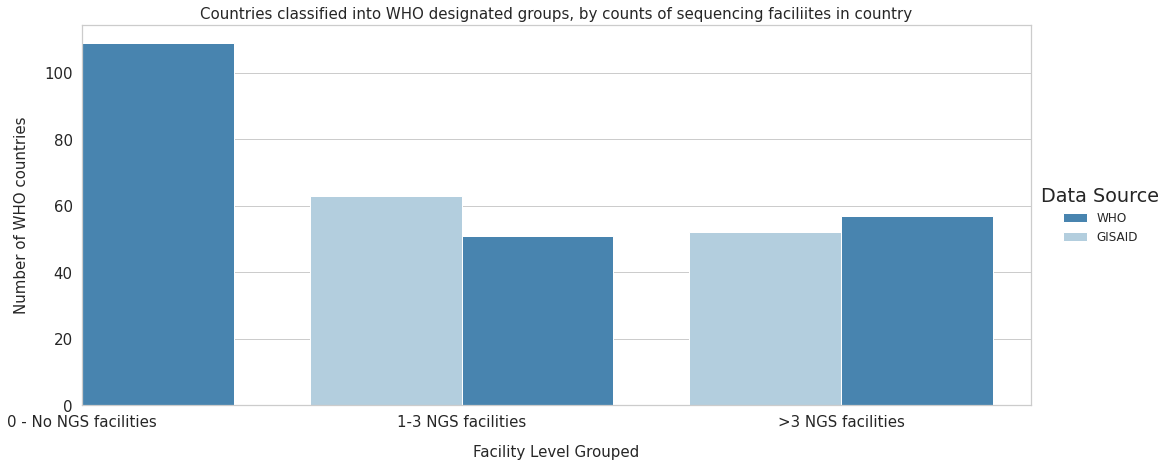

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "Countries classified into WHO designated groups, by counts of sequencing faciliites in country"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(17, 7))

#plotting inaccesible hospitals
sns.barplot(x="Lab_level_Data", 
            y="n_WHO_countries", hue = 'data', ci = None,
            data=WHO_GISAID, palette = 'Blues')


#Make the legend outside of the chart, and the legend centered
handles, labels = ax.get_legend_handles_labels()

ax.legend(reversed(handles), reversed(labels), loc='center left', bbox_to_anchor=(1.0, 0.5), frameon=False
          , title="Data Source", prop={"size":12})


 
plt.title(title, size = 15)
plt.xlabel("Facility Level Grouped", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Number of WHO countries", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

WHO_GISAID.head(10)

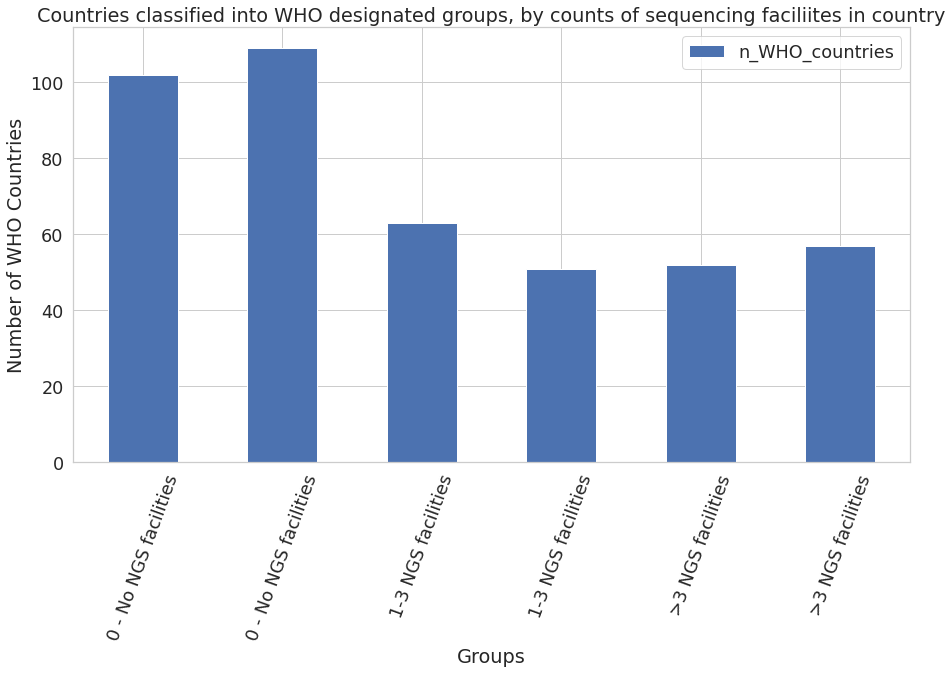

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
width = 0.2

  
WHO_GISAID.plot(x="Lab_level_Data", kind = 'bar', stacked = False, rot=70)

plt.xlabel("Groups")
plt.ylabel("Number of WHO Countries")
plt.title("Countries classified into WHO designated groups, by counts of sequencing faciliites in country")
plt.legend()

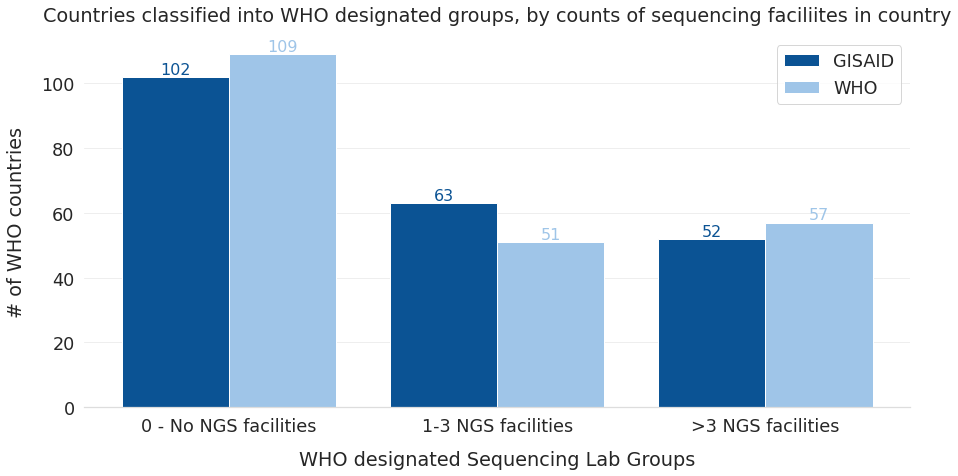

In [ ]:
fig, ax = plt.subplots(figsize=(14, 7))
x = np.arange(len(WHO_GISAID.Lab_level_Data.unique()))

# Define bar width. We'll use this to offset the second bar.
bar_width = 0.4

# Note we add the `width` parameter now which sets the width of each bar.
b1 = ax.bar(x, WHO_GISAID.loc[WHO_GISAID['data'] == 'GISAID', 'n_WHO_countries'],
            width=bar_width, label = 'GISAID', color = '#0b5394')
# Same thing, but offset the x by the width of the bar.
b2 = ax.bar(x + bar_width, WHO_GISAID.loc[WHO_GISAID['data'] == 'WHO', 'n_WHO_countries'],
            width=bar_width, label = 'WHO', color = '#9fc5e8')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(WHO_GISAID.Lab_level_Data.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('WHO designated Sequencing Lab Groups', labelpad=15)
ax.set_ylabel('# of WHO countries', labelpad=15)
ax.set_title('Countries classified into WHO designated groups, by counts of sequencing faciliites in country', pad=15)

fig.tight_layout()

# For each bar in the chart, add a text label.
for bar in ax.patches:
  # The text annotation for each bar should be its height.
  bar_value = bar.get_height()
  # Format the text with commas to separate thousands. You can do
  # any type of formatting here though.
  text = f'{bar_value:,}'
  # This will give the middle of each bar on the x-axis.
  text_x = bar.get_x() + bar.get_width() / 2
  # get_y() is where the bar starts so we add the height to it.
  text_y = bar.get_y() + bar_value
  # If we want the text to be the same color as the bar, we can
  # get the color like so:
  bar_color = bar.get_facecolor()
  # If you want a consistent color, you can just set it as a constant, e.g. #222222
  ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=16)

,Lab_level_Data,n_WHO_countries,data,sort
0,0 - No NGS facilities,102,GISAID,0
3,0 - No NGS facilities,109,WHO,0
1,1-3 NGS facilities,63,GISAID,1
4,1-3 NGS facilities,51,WHO,1
2,>3 NGS facilities,52,GISAID,2


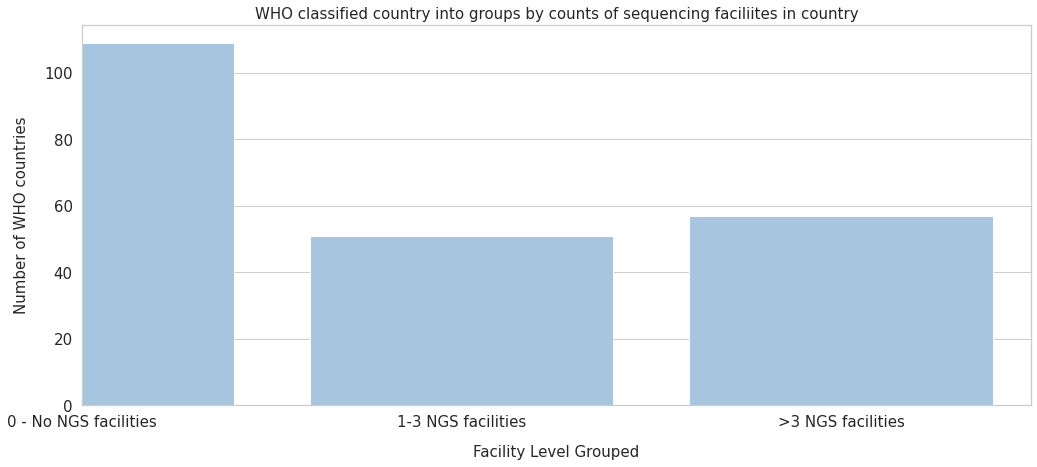

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "WHO classified country into groups by counts of sequencing faciliites in country"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(17, 7))

#plotting inaccesible hospitals
sns.barplot(x="Lab_level_Data", 
            y="n_WHO_countries",ci = None,
            data=df_WHO, color = '#9fc5e8')

 
plt.title(title, size = 15)
plt.xlabel("Facility Level Grouped", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Number of WHO countries", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

WHO_GISAID.head()

,Lab_level_Data,n_WHO_countries,data,sort
0,0 - No NGS facilities,102,GISAID,0
3,0 - No NGS facilities,109,WHO,0
1,1-3 NGS facilities,63,GISAID,1
4,1-3 NGS facilities,51,WHO,1
2,>3 NGS facilities,52,GISAID,2


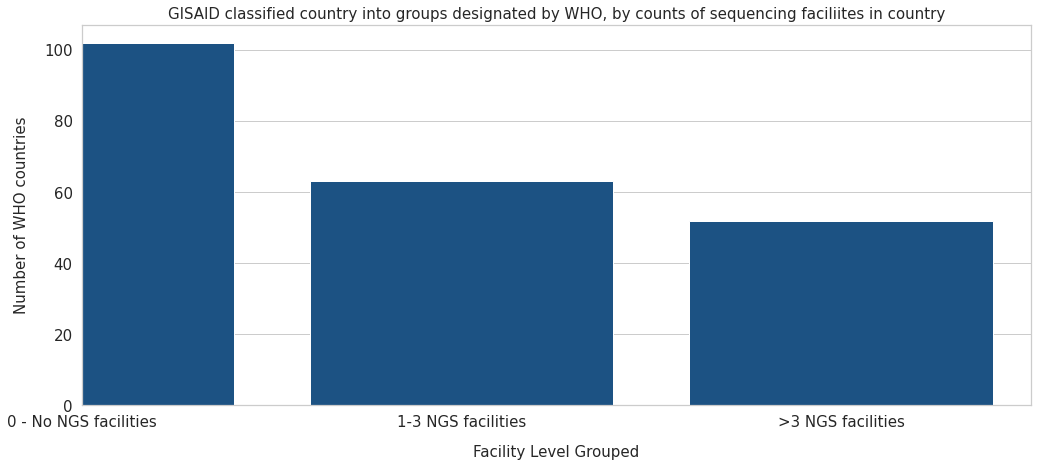

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "GISAID classified country into groups designated by WHO, by counts of sequencing faciliites in country"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(17, 7))

#plotting inaccesible hospitals
sns.barplot(x="Lab_level_Data", 
            y="n_WHO_countries",ci = None,
            data=df_GISAID, color = '#0b5394')

 
plt.title(title, size = 15)
plt.xlabel("Facility Level Grouped", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Number of WHO countries", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

WHO_GISAID.head()

,Lab_level_Data,n_WHO_countries,data,sort
0,0 - No NGS facilities,102,GISAID,0
3,0 - No NGS facilities,109,WHO,0
1,1-3 NGS facilities,63,GISAID,1
4,1-3 NGS facilities,51,WHO,1
2,>3 NGS facilities,52,GISAID,2


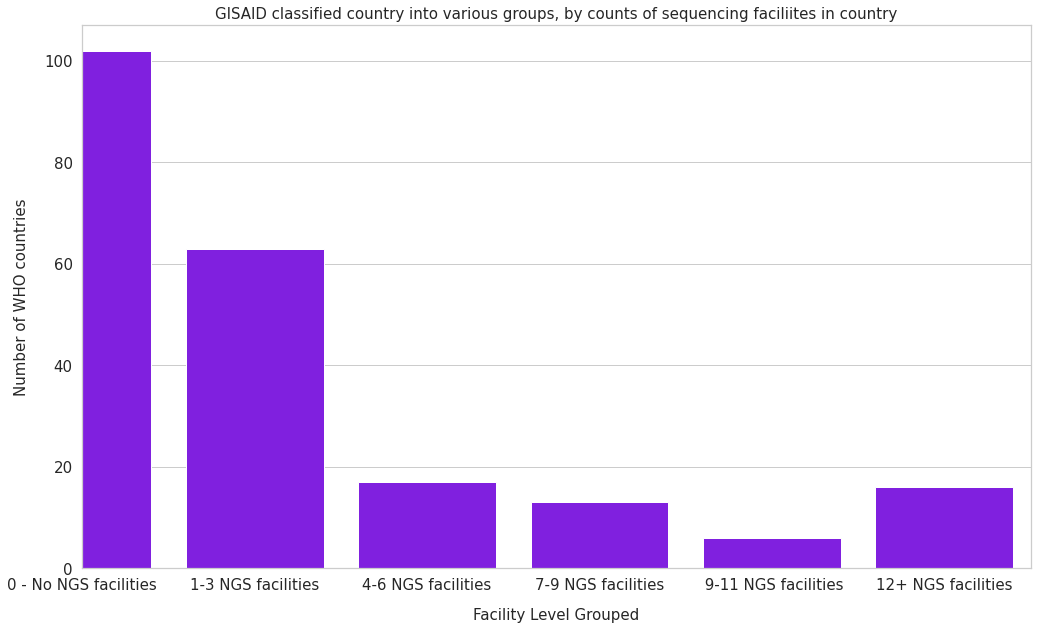

In [ ]:
#*********************************************************************
# Figure: Percent of Cases Sequenced vs. Cumulative Number of Sequencing
#*********************************************************************

from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import calendar
import matplotlib.ticker as ticker

#title and formatting
title = "GISAID classified country into various groups, by counts of sequencing faciliites in country"
sns.set_style("whitegrid")
fig, ax = plt.subplots(1,figsize=(17, 10))

#plotting inaccesible hospitals
sns.barplot(x="GISAID_Lab_Groups", 
            y="n_WHO_countries",ci = None,
            data=df_GISAID_Various_Groups, color = '#8000ff')

 
plt.title(title, size = 15)
plt.xlabel("Facility Level Grouped", 
           size = 15, labelpad = axis_pad )
plt.ylabel("Number of WHO countries", 
           size = 15, labelpad = axis_pad )

#ax.set_yscale('log')

plt.ylim((0, None))
plt.xlim((0, None))

plt.xticks(size = 15)
plt.yticks(size = 15)

WHO_GISAID.head()

In [ ]:
WHO_GISAID_data.head()

,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat
0,Algeria,1.0,Algeria,DZA,Africa,0 - No NGS facilities,1-3 NGS facilities,1-3 NGS facilities,0 - No NGS facilities
1,NaN,0.0,Equatorial Guinea,GNQ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
2,NaN,0.0,Eritrea,ERI,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
3,NaN,0.0,Eswatini,SWZ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities
4,NaN,0.0,Ethiopia,ETH,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities


In [ ]:
#subset data by NGS facility group
Group_1 = WHO_GISAID_data.loc[(WHO_GISAID_data['WHO_Lab_cat'] == '0 - No NGS facilities')]

#subset data by NGS facility group
Group_2 = WHO_GISAID_data.loc[(WHO_GISAID_data['WHO_Lab_cat'] == '1-3 NGS facilities')]

#subset data by NGS facility group
Group_3 = WHO_GISAID_data.loc[(WHO_GISAID_data['WHO_Lab_cat'] == '>3 NGS facilities')]
Group_3.head()

,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat
160,Argentina,12.0,Argentina,ARG,Americas,2 - >3 NGS facilities or equivalent,>3 NGS facilities,9-11 NGS facilities,>3 NGS facilities
161,Australia,12.0,Australia,AUS,Western Pacific,2 - >3 NGS facilities or equivalent,>3 NGS facilities,9-11 NGS facilities,>3 NGS facilities
162,France,32.0,France,FRA,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities
163,Finland,3.0,Finland,FIN,Europe,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,>3 NGS facilities
164,Germany,32.0,Germany,DEU,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities


In [ ]:
Group_2.describe()

,subm_lab_count
count,51.000000
mean,2.352941
std,2.152427
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == 0.0 :
        return '0' 
    elif 0.0 < x < 3:
        return '1'
    elif x >= 3:
        return '2'
  
Group_1['lab_zeros'] = Group_1['subm_lab_count'].apply(lambda x : num (x))
Group_1.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat,lab_zeros
0,Algeria,1.0,Algeria,DZA,Africa,0 - No NGS facilities,1-3 NGS facilities,1-3 NGS facilities,0 - No NGS facilities,1
1,NaN,0.0,Equatorial Guinea,GNQ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
2,NaN,0.0,Eritrea,ERI,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
3,NaN,0.0,Eswatini,SWZ,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
4,NaN,0.0,Ethiopia,ETH,Africa,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
5,NaN,0.0,Fiji,FJI,Western Pacific,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
6,NaN,0.0,French Polynesia,PYF,Western Pacific,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
7,NaN,0.0,Gibraltar,GIB,Europe,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
8,NaN,0.0,Greenland,GRL,Europe,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0
9,NaN,0.0,Grenada,GRD,Americas,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0 - No NGS facilities,0


In [ ]:
print (Group_1['lab_zeros'].value_counts())

print (Group_1['lab_zeros'].value_counts(normalize=True) * 100)

0    96
1    13
Name: lab_zeros, dtype: int64
0    88.073394
1    11.926606
Name: lab_zeros, dtype: float64


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == 0.0 :
        return '0' 
    elif 0.0 < x < 3:
        return '1'
    elif x >= 3:
        return '2'
  
Group_2['lab_zeros'] = Group_2['subm_lab_count'].apply(lambda x : num (x))
Group_2.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat,lab_zeros
109,NaN,0.0,Guatemala,GTM,Americas,1 - 1-3 NGS facilities or equivalent,0 - No NGS facilities,0 - No NGS facilities,1-3 NGS facilities,0
110,Madagascar,1.0,Madagascar,MDG,Africa,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,1
111,Malaysia,6.0,Malaysia,MYS,Western Pacific,1 - 1-3 NGS facilities or equivalent,>3 NGS facilities,4-6 NGS facilities,1-3 NGS facilities,2
112,Kuwait,3.0,Kuwait,KWT,Eastern Mediterranean,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,2
113,Nepal,2.0,Nepal,NPL,South-East Asia,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,1
114,Croatia,4.0,Croatia,HRV,Europe,1 - 1-3 NGS facilities or equivalent,>3 NGS facilities,4-6 NGS facilities,1-3 NGS facilities,2
115,NaN,0.0,Dominican Republic,DOM,Americas,1 - 1-3 NGS facilities or equivalent,0 - No NGS facilities,0 - No NGS facilities,1-3 NGS facilities,0
116,Costa Rica,2.0,Costa Rica,CRI,Americas,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,1
117,Cyprus,1.0,Cyprus,CYP,Europe,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,1
118,Myanmar,2.0,Myanmar,MMR,South-East Asia,1 - 1-3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,1-3 NGS facilities,1


In [ ]:
print (Group_2['lab_zeros'].value_counts())

print (Group_2['lab_zeros'].value_counts(normalize=True) * 100)

1    26
2    19
0     6
Name: lab_zeros, dtype: int64
1    50.980392
2    37.254902
0    11.764706
Name: lab_zeros, dtype: float64


In [ ]:
#Catgorize subm_lab_count data & chart, then compare to NGS_Capacity Data charted

def num (x):
    if x == 0.0 :
        return '0' 
    elif 0.0 < x < 3:
        return '1'
    elif x >= 3:
        return '2'
  
Group_3['lab_zeros'] = Group_3['subm_lab_count'].apply(lambda x : num (x))
Group_3.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,GISAID_country,subm_lab_count,WHO_country,WHO_country_code,WHO_region,NGS_capacity,GISAID_Lab_cat,GISAID_Lab_Groups,WHO_Lab_cat,lab_zeros
160,Argentina,12.0,Argentina,ARG,Americas,2 - >3 NGS facilities or equivalent,>3 NGS facilities,9-11 NGS facilities,>3 NGS facilities,2
161,Australia,12.0,Australia,AUS,Western Pacific,2 - >3 NGS facilities or equivalent,>3 NGS facilities,9-11 NGS facilities,>3 NGS facilities,2
162,France,32.0,France,FRA,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities,2
163,Finland,3.0,Finland,FIN,Europe,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,>3 NGS facilities,2
164,Germany,32.0,Germany,DEU,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities,2
165,Bangladesh,17.0,Bangladesh,BGD,South-East Asia,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities,2
166,Bahrain,1.0,Bahrain,BHR,Eastern Mediterranean,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,>3 NGS facilities,1
167,Denmark,3.0,Denmark,DNK,Europe,2 - >3 NGS facilities or equivalent,1-3 NGS facilities,1-3 NGS facilities,>3 NGS facilities,2
168,Chile,5.0,Chile,CHL,Americas,2 - >3 NGS facilities or equivalent,>3 NGS facilities,4-6 NGS facilities,>3 NGS facilities,2
169,Belgium,24.0,Belgium,BEL,Europe,2 - >3 NGS facilities or equivalent,>3 NGS facilities,12+ NGS facilities,>3 NGS facilities,2


In [ ]:
print (Group_3['lab_zeros'].value_counts())

print (Group_3['lab_zeros'].value_counts(normalize=True) * 100)

2    48
1     9
Name: lab_zeros, dtype: int64
2    84.210526
1    15.789474
Name: lab_zeros, dtype: float64


In [ ]:
#Melt large dataframe

melt_Group_1 = pd.melt(Group_1, value_vars=['subm_lab_count'],
                   id_vars=['WHO_country'])
melt_Group_1 ['group'] = '0 NGS Facilities'

melt_Group_2 = pd.melt(Group_2, value_vars=['subm_lab_count'],
                   id_vars=['WHO_country'])
melt_Group_2 ['group'] = '1 - 3 NGS Facilities'

melt_Group_3 = pd.melt(Group_3, value_vars=['subm_lab_count'],
                   id_vars=['WHO_country'])
melt_Group_3 ['group'] = '>3 NGS Facilities'

print (melt_Group_1.variable.unique())
melt_Group_1.head()


['subm_lab_count']


,WHO_country,variable,value,group
0,Algeria,subm_lab_count,1.0,0 NGS Facilities
1,Equatorial Guinea,subm_lab_count,0.0,0 NGS Facilities
2,Eritrea,subm_lab_count,0.0,0 NGS Facilities
3,Eswatini,subm_lab_count,0.0,0 NGS Facilities
4,Ethiopia,subm_lab_count,0.0,0 NGS Facilities


In [ ]:
melt_grouped = melt_Group_1.append(melt_Group_2).reset_index(drop=True)
melt_final = melt_grouped.append(melt_Group_3).reset_index(drop=True)
melt_final.tail(10)
melt_final.shape

(217, 4)

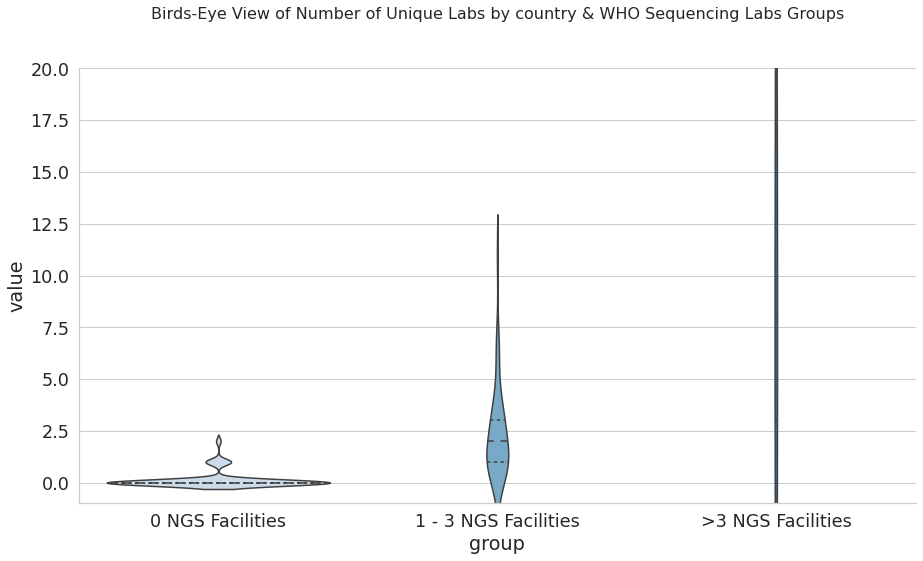

In [ ]:
#Quartile Plot
title = "Birds-Eye View of Number of Unique Labs by country & WHO Sequencing Labs Groups"

sns.violinplot(x = 'group', y = "value", 
               palette = 'Blues', 
               order=["0 NGS Facilities", "1 - 3 NGS Facilities", ">3 NGS Facilities"],
               data = melt_final, inner="quartile")

# display
plt.title(title, size = 16, y=1.1)
plt.ylim((-1, 20))
sns.despine()
plt.show()



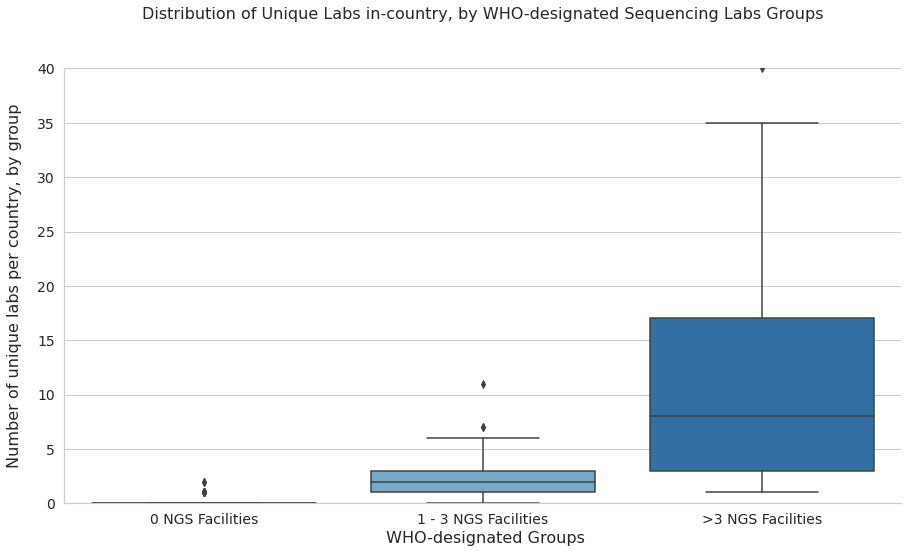

In [ ]:
title = "Distribution of Unique Labs in-country, by WHO-designated Sequencing Labs Groups"

sns.boxplot(x='group', y='value', 
            data=melt_final, palette = 'Blues', order=["0 NGS Facilities", "1 - 3 NGS Facilities", ">3 NGS Facilities"])

plt.ylim((0, 40))
ax.set_yscale('log')

plt.title(title, size = 16, y=1.1)

plt.xlabel(" WHO-designated Groups", 
           size = 16)
plt.ylabel("Number of unique labs per country, by group",
           size = 16,
          labelpad = axis_pad )

plt.xticks(size = 14)
plt.yticks(size = 14)

sns.despine()